In [1]:
#Milestone 1 - ANN
"""Epoch 45: Train err: 2.3768524369178254, Train loss: 9.565495610237122 |Validation err: 2.4339216453787125, Validation loss: 10.037699146270752"""
#Milestone 2 - Surrounding ANN
"""Epoch 28: Train err: 2.209493298325543, Train loss: 8.441690085685416 |Validation err: 2.305450635777982, Validation loss: 8.75162491431603"""
#Milestone 2 - Focused RNN
"""Epoch 45: Train err: 2.4221065864825215, Train loss: 9.995889015819715 |Validation err: 2.4251071704415033, Validation loss: 9.692658022830361"""
#Milestone 3 - Surrounding RNN
"""Epoch 44: Train err: 2.3512696408416187, Train loss: 9.290438038029082 |Validation err: 2.544152707211132, Validation loss: 11.564151604970297"""
#Milestone 3 - Surrounding GRU
"""Epoch 40: Train err: 2.298863480285685, Train loss: 8.73277427725596 |Validation err: 2.4770519715447668, Validation loss: 10.617209951082865"""
#Milestone 3 - Surrounding LTSM:
"""Epoch 28: Train err: 2.342810915274806, Train loss: 9.048288182036517 |Validation err: 2.488783025575083, Validation loss: 10.927148024241129"""
#Milestone 3 - Surrounding LSTM, more complex ANN:
"""Epoch 45: Train err: 2.226198731197156, Train loss: 8.230105080016672 |Validation err: 2.3986548753923542, Validation loss: 10.326567649841309"""

'Epoch 45: Train err: 2.226198731197156, Train loss: 8.230105080016672 |Validation err: 2.3986548753923542, Validation loss: 10.326567649841309'

In [11]:
######## >>>>>>>>>>> For the google colab to be able to access the meta files you must add the APS360 team shared folder to your drive by right clicking on it <<<<<<<<<<< ##############
#mount googledrive
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# DATASET

## Library

### File manager

In [0]:
import pandas as pd
# Prints how many nulls there are in max and min temp
def test_null_csv_daily(dir, station, start_year, end_year, out_name =  None):
    """
      Args:
          station (string): eg. "ON_6158355"
          start_year (int): Starting year
          end_year (int)  : Ending year
          start_date (int): start_date = 0 is day 1 of starting year (Where we want the sampling to start)
          out_name (optional string) : change the name of the output file
    """
    if out_name == None:
      out_name = station + '_' + str(start_year) + '-' + str(end_year)
    master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' + dir
    src_path = master_path + 'datasets/'
    newdf = pd.read_csv(src_path + out_name + ".csv")
    print("Max temp nulls: " + str(newdf['Max Temp (°C)'].isnull().sum()))
    print("Min temp nulls: " + str(newdf['Min Temp (°C)'].isnull().sum()))
    print("Total Precip (mm) nulls: " + str(newdf['Total Precip (mm)'].isnull().sum()))
    #print("Tot precip nans: " + str(pd.isna(newdf['Total Precip (mm)']).sum()))
    

In [0]:
import pandas as pd
# Interpolates null values in min and max temp cols
def inter_nulls_csv_daily(dir, station, start_year, end_year, out_name =  None):
    """
      Args:
          station (string): eg. "ON_6158355"
          start_year (int): Starting year
          end_year (int)  : Ending year
          start_date (int): start_date = 0 is day 1 of starting year (Where we want the sampling to start)
          out_name (optional string) : change the name of the output file
    """
    if out_name == None:
      out_name = station + '_' + str(start_year) + '-' + str(end_year)
    master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' + dir
    src_path = master_path + 'datasets/'
    newdf = pd.read_csv(src_path + out_name + ".csv")
    newdf['Max Temp (°C)'] = newdf['Max Temp (°C)'].interpolate()
    newdf['Min Temp (°C)']= newdf['Min Temp (°C)'].interpolate()
    newdf['Total Precip (mm)']= newdf['Total Precip (mm)'].interpolate()
    
    newdf.to_csv( src_path +  out_name + ".csv")

In [0]:
#Raw csv downloaded must be place in /raw folder
#Merged csv will be stored at /datasets folder
# Also interpolates the null max and min temp
def make_csv_daily(dir, station, start_year, end_year, out_name =  None):
  """
    Args:
        station (string): eg. "ON_6158355"
        start_year (int): Starting year
        end_year (int)  : Ending year
        start_date (int): start_date = 0 is day 1 of starting year (Where we want the sampling to start)
        out_name (optional string) : change the name of the output file
    """
  if out_name == None:
    out_name = station + '_' + str(start_year) + '-' + str(end_year)
  master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' + dir
  src_path = master_path
  dest_path = master_path + 'datasets/'
  fout = open(dest_path + out_name + ".csv","w+")
  in_base = "en_climate_daily_" + station + '_' #eg: 'en_climate_daily_ON_6158355_'
  in_end = '_P1D.csv'
  # first file:
  for line in open(src_path + in_base + str(start_year) + in_end):
      fout.write(line)
  # now the rest:    
  for num in range(start_year + 1, end_year + 1):
      f = open(src_path + in_base + str(num) + in_end)
      f.__next__() # skip the header
      for line in f:
          fout.write(line)
      f.close() # not really needed
  fout.close()
  inter_nulls_csv_daily(dir, station, start_year, end_year, out_name)

In [0]:
def getDayAttrLabels(days_ahead, set_label_attributes):
  dayAttrLabels ={}
  i=0
  for day in range(1,days_ahead+1):
     for attr in set_label_attributes:
       dayAttrLabels[i] = 'Day{} {}'.format(day,attr)
       i+=1
  return dayAttrLabels
      

### Set creators

In [0]:
###Hyper parameters of data sets

####### Set #######
set_start_day = 0
set_num_days = 7
set_days_ahead = 1 #predict 5 days ahead
set_data_attributes = ['Max Temp (°C)', 'Min Temp (°C)','Total Precip (mm)']
set_label_attributes = ['Max Temp (°C)', 'Min aTemp (°C)','Total Precip (mm)']
#set_attributes = ['Max Temp (°C)', 'Min Temp (°C)']

stationSrc = "ON_6158355"
dirSrc =  "data/Target A/target/"
dirSurr = "data/Target A/surr/"
stationSurr = ["ON_615S001", "ON_6158751", "ON_615HMAK"]

start_season_day = 50
num_seasons = 4

####### Training Set #######
start_year_train = 2008
end_year_train = 2013 
# Must be the same as training because of season syncing
start_date_train = set_start_day 
end_date_train = None

####### Validation Set #######
start_year_val = 2014
end_year_val = 2014
# Must be the same as training because of season syncing
start_date_val = set_start_day 
end_date_val = None

####### Testing Set #######
start_year_test = 2007
end_year_test = 2007
# Must be the same as training because of season syncing
start_date_test = set_start_day 
end_date_test = None

####### Global variables #######
set_num_stations = 1 + len(stationSurr)
glob_dayAttr_labels = getDayAttrLabels(set_days_ahead, set_label_attributes) #make labels for day-attribute combinations
#glob_inp_size = set_num_stations * len(set_data_attributes)
RNN_percell_days = 2
glob_inp_size = set_num_stations * len(set_data_attributes)*RNN_percell_days
glob_out_size = len(set_label_attributes)*set_days_ahead
master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/'

In [0]:
import pandas as pd
import numpy as np
import math
from torch.utils.data import Dataset, DataLoader
class WeatherSurroundingDataset(Dataset):
    """Weather dataset."""

    def __init__(self, dirSrc, dirSurr, stationSrc, stationSurr, start_year, end_year, days_ahead =1, start_date = 0, end_date = None, num_days = 7, data_attributes = ['Max Temp (°C)', 'Min Temp (°C)'], label_attributes = ['Max Temp (°C)', 'Min Temp (°C)'], make_csv = False, out_name = None):
        """
        Args:
            dirSrc (string) =  "data/Target A/target/" relative directory of target station
            dirSurr (string) = "data/Target A/surr/" relative directory of surrounding stations
            stationSrc (string): eg. "ON_6158355"
            stationSurr (list of strings)
            start_year (int): Starting year
            end_year (int)  : Ending year
            days_ahead (int): number of days to be predicted
            start_date (int): start_date = 0 is day 1 of starting year (Where we want the sampling to start)
            end_date (optional int) : end_date = 7 is day 8 of starting year(min = 7 because of LABEL!). If provided changes the end date from last day of last year.
            num_days (optional int) : num_days is the interval of days before the label.
            make_csv (optional bool): If true it will call make_csv_daily function to create the csv from /raw datasets into /datasets
            out_name (optional string) : change the name of the output file which it reads from
        """
        self.data_attributes = data_attributes
        self.label_attributes = label_attributes
        self.days_ahead = days_ahead 
        self.num_days = num_days
        if(out_name == None):
          self.out_name = stationSrc + '_' + str(start_year) + '-' + str(end_year)
        else:
          self.out_name = out_name
        master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' +  dirSrc
        dest_path = master_path + 'datasets/'
        if (make_csv):
          make_csv_daily(dirSrc, stationSrc, start_year, end_year, out_name = out_name)

        self.src_csv = pd.read_csv(dest_path + self.out_name +'.csv')

        self.sur_csvs = []

        master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' +  dirSurr
        dest_path = master_path + 'datasets/'
        for station_surr in stationSurr:
          file_name = station_surr + '_' + str(start_year) + '-' + str(end_year)
          if (make_csv):
            make_csv_daily(dirSurr, station_surr, start_year, end_year, out_name = file_name)
          print(dest_path + file_name +'.csv')
          self.sur_csvs.append(pd.read_csv(dest_path + file_name +'.csv'))

        self.start_date = start_date
        if( end_date == None):
          self.end_date = len(self.src_csv) - 1
        else:
          self.end_date = end_date

        # Just making sure files are of the same size
        for i, cur_sur_csv in enumerate(self.sur_csvs):
          if(len(self.src_csv) != len(cur_sur_csv)):
            if(len(self.src_csv) > len(cur_sur_csv)):
              assert(0) # Surrounding stations don't have sufficient days to fill the dataset
            print("Caution: Traget station has {trg_days} days while surr station idx {idx} has {sur_days} days".format(len(self.src_csv), i, len(cur_sur_csv)))

    def __len__(self):
        return self.end_date - self.start_date +1 - self.num_days - self.days_ahead if self.end_date - self.start_date +1 - self.num_days - self.days_ahead >= 0 else 0

    def __getitem__(self, idx):
        data = self.src_csv.loc[ idx + self.start_date : idx + self.start_date + self.num_days - 1 , self.data_attributes ]
        
        for cur_csv in self.sur_csvs:
          new_data = cur_csv.loc[ idx + self.start_date : idx + self.start_date + self.num_days - 1 , self.data_attributes ]
          data = np.concatenate([data, new_data], axis= 1)

        start_days_ahead =  idx + self.start_date + self.num_days
        end_days_ahead = start_days_ahead + self.days_ahead - 1  
        
        #label = self.src_csv.loc[ idx + self.start_date + self.num_days, ['Max Temp (°C)', 'Min Temp (°C)'] ]
        
        label = self.src_csv.loc[start_days_ahead:end_days_ahead, self.label_attributes ] 
        label = np.asarray(label).flatten()
        label = label.astype('float')

        data = data.flatten()

        #print('Data: {}'.format(data))
        #print('Data shape: {}'.format(data.shape))
        #print('Labels shape: {}'.format(label.shape))
        #print('Labels: {}'.format(label[:2]))
        sample = [data, label]

        return sample

    def giveSeasonalSets(self, start_season_day = 0, num_seasons = 4):
        """num_seasons > 1 or meaningless and unknown behaviour"""
        seasonalSets = [None] * num_seasons

        #seasonIntervals = math.ceil(365.25 / num_seasons)
        seasonIntervals = math.floor((self.end_date - self.start_date) / (math.floor((self.end_date - self.start_date + 1) / 365) * num_seasons))

        if(start_season_day > seasonIntervals):
          start_season_day = start_season_day % seasonIntervals
          print("Truncated start_season_day to {}. Accepts values between 0 ~ {}".format(start_season_day, seasonIntervals-1))
        if(start_season_day > 0):
          seasonalSets[-1] = SeasonalDataset(self, 0, start_season_day - 1)
        curLastDay = seasonIntervals + start_season_day - 1
        seasonalSets[0] = SeasonalDataset(self, start_season_day - self.num_days, curLastDay) # start date can include days from previous season to predict current season days

        curStartDay = curLastDay + 1 
        curLastDay = seasonIntervals + curStartDay - 1
        i = 1
        while(curLastDay < self.end_date): # Do not add the last interval
          #print("giveSeasonalSets: " + str(i) + " " + str(curStartDay) + " " + str(curLastDay))
          if(seasonalSets[i] == None ):
            seasonalSets[i] = SeasonalDataset(self, curStartDay - self.num_days, curLastDay)
          else:
            seasonalSets[i] = seasonalSets[i] + SeasonalDataset(self, curStartDay - self.num_days, curLastDay)
          curStartDay = curLastDay + 1
          curLastDay = seasonIntervals + curStartDay - 1
          i += 1
          i %= num_seasons

        # Now add the last set
        curLastDay = self.end_date
        if(seasonalSets[i] == None ):
            seasonalSets[i] = SeasonalDataset(self, curStartDay - self.num_days, curLastDay)
        else:
            seasonalSets[i] = seasonalSets[i] + SeasonalDataset(self, curStartDay - self.num_days, curLastDay)

        return seasonalSets


class SeasonalDataset(WeatherSurroundingDataset):
    """Seasonal dataset. Inherited from WSDataset. Only used in helper function -giveSeasonalSets-"""

    def __init__(self, weathersurroundingDataset, start_date, end_date):
        """
        Args:
            weathersurroundingDataset: Must previously loaded all the years and stations in a WeatherSurroundingDataset
        """
        self.data_attributes = weathersurroundingDataset.data_attributes
        self.label_attributes = weathersurroundingDataset.label_attributes
        self.days_ahead = weathersurroundingDataset.days_ahead
        self.num_days = weathersurroundingDataset.num_days
        self.out_name = weathersurroundingDataset.out_name
        self.src_csv = weathersurroundingDataset.src_csv
        self.sur_csvs = weathersurroundingDataset.sur_csvs
        self.start_date = start_date if start_date >= 0 else 0
        self.end_date = end_date

In [24]:
# start_year_train = 2008
# end_year_train = 2013 #changed from 2019 because in our proposal we said 07-16 is train
# start_date_train = 0
# end_date_train = None
# num_days_train = set_num_days
# stationSrc = "ON_6158355"
# dirSrc =  "data/Target A/target/"
# dirSurr = "data/Target A/surr/"
trainingSet = WeatherSurroundingDataset(dirSrc, dirSurr, stationSrc, stationSurr, start_year_train, end_year_train, set_days_ahead, start_date_train, end_date_train, num_days=set_num_days, data_attributes = set_data_attributes, label_attributes = set_label_attributes, make_csv = False)

/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615S001_2008-2013.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_6158751_2008-2013.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615HMAK_2008-2013.csv


In [0]:
train_seasonal_sets = trainingSet.giveSeasonalSets(start_season_day= start_season_day, num_seasons= num_seasons)

In [0]:
# start_year_val = 2014
# end_year_val = 2014
# start_date_val = 0
# end_date_val = None
# num_days_val = set_num_days
# station stays the same
validationSet = WeatherSurroundingDataset(dirSrc, dirSurr, stationSrc, stationSurr, start_year_val, end_year_val, set_days_ahead, start_date_train, end_date_train, num_days=set_num_days, data_attributes = set_data_attributes, label_attributes = set_label_attributes, make_csv = False)

/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615S001_2014-2014.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_6158751_2014-2014.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615HMAK_2014-2014.csv


In [0]:
val_seasonal_sets = validationSet.giveSeasonalSets(start_season_day= start_season_day, num_seasons= num_seasons)

In [0]:
#
#
#
#
testingSet = WeatherSurroundingDataset(dirSrc, dirSurr, stationSrc, stationSurr, start_year_test, end_year_test, set_days_ahead, start_date_train, end_date_train, num_days=set_num_days, data_attributes = set_data_attributes, label_attributes = set_label_attributes, make_csv = False)

/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615S001_2007-2007.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_6158751_2007-2007.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615HMAK_2007-2007.csv


In [0]:
test_seasonal_sets = testingSet.giveSeasonalSets(start_season_day= start_season_day, num_seasons= num_seasons)

## Library 2

### File manager

In [0]:
import pandas as pd
# Prints how many nulls there are in max and min temp
def test_null_csv_daily(dir, station, start_year, end_year, out_name =  None):
    """
      Args:
          station (string): eg. "ON_6158355"
          start_year (int): Starting year
          end_year (int)  : Ending year
          start_date (int): start_date = 0 is day 1 of starting year (Where we want the sampling to start)
          out_name (optional string) : change the name of the output file
    """
    if out_name == None:
      out_name = station + '_' + str(start_year) + '-' + str(end_year)
    master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' + dir
    src_path = master_path + 'datasets/'
    newdf = pd.read_csv(src_path + out_name + ".csv")
    print("Max temp nulls: " + str(newdf['Max Temp (°C)'].isnull().sum()))
    print("Min temp nulls: " + str(newdf['Min Temp (°C)'].isnull().sum()))
    print("Total Precip (mm) nulls: " + str(newdf['Total Precip (mm)'].isnull().sum()))
    #print("Tot precip nans: " + str(pd.isna(newdf['Total Precip (mm)']).sum()))
    

In [0]:
import pandas as pd
# Interpolates null values in min and max temp cols
def inter_nulls_csv_daily(dir, station, start_year, end_year, out_name =  None):
    """
      Args:
          station (string): eg. "ON_6158355"
          start_year (int): Starting year
          end_year (int)  : Ending year
          start_date (int): start_date = 0 is day 1 of starting year (Where we want the sampling to start)
          out_name (optional string) : change the name of the output file
    """
    if out_name == None:
      out_name = station + '_' + str(start_year) + '-' + str(end_year)
    master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' + dir
    src_path = master_path + 'datasets/'
    newdf = pd.read_csv(src_path + out_name + ".csv")
    newdf['Max Temp (°C)'] = newdf['Max Temp (°C)'].interpolate()
    newdf['Min Temp (°C)']= newdf['Min Temp (°C)'].interpolate()
    newdf['Total Precip (mm)']= newdf['Total Precip (mm)'].interpolate()
    
    newdf.to_csv( src_path +  out_name + ".csv")

In [0]:
#Raw csv downloaded must be place in /raw folder
#Merged csv will be stored at /datasets folder
# Also interpolates the null max and min temp
def make_csv_daily(dir, station, start_year, end_year, out_name =  None):
  """
    Args:
        station (string): eg. "ON_6158355"
        start_year (int): Starting year
        end_year (int)  : Ending year
        start_date (int): start_date = 0 is day 1 of starting year (Where we want the sampling to start)
        out_name (optional string) : change the name of the output file
    """
  if out_name == None:
    out_name = station + '_' + str(start_year) + '-' + str(end_year)
  master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' + dir
  src_path = master_path
  dest_path = master_path + 'datasets/'
  fout = open(dest_path + out_name + ".csv","w+")
  in_base = "en_climate_daily_" + station + '_' #eg: 'en_climate_daily_ON_6158355_'
  in_end = '_P1D.csv'
  # first file:
  for line in open(src_path + in_base + str(start_year) + in_end):
      fout.write(line)
  # now the rest:    
  for num in range(start_year + 1, end_year + 1):
      f = open(src_path + in_base + str(num) + in_end)
      f.__next__() # skip the header
      for line in f:
          fout.write(line)
      f.close() # not really needed
  fout.close()
  inter_nulls_csv_daily(dir, station, start_year, end_year, out_name)

In [0]:
def getDayAttrLabels(days_ahead, set_label_attributes):
  dayAttrLabels ={}
  i=0
  for day in range(1,days_ahead+1):
     for attr in set_label_attributes:
       dayAttrLabels[i] = 'Day{} {}'.format(day,attr)
       i+=1
  return dayAttrLabels
      

### Set creators

In [0]:
###Hyper parameters of data sets

####### Set #######
set_start_day = 0
set_num_days = 8
set_days_ahead = 1 #predict 5 days ahead
set_data_attributes = ['Max Temp (°C)', 'Min Temp (°C)','Total Precip (mm)']
set_label_attributes = ['Max Temp (°C)', 'Min Temp (°C)']
#set_attributes = ['Max Temp (°C)', 'Min Temp (°C)']

stationSrc = "ON_6158355"
dirSrc =  "data/Target A/target/"
dirSurr = "data/Target A/surr/"
stationSurr = ["ON_615S001", "ON_6158751", "ON_615HMAK"]

start_season_day = 0
num_seasons = 12

####### Training Set #######
start_year_train = 2008
end_year_train = 2013 
# Must be the same as training because of season syncing
start_date_train = set_start_day 
end_date_train = None

####### Validation Set #######
start_year_val = 2014
end_year_val = 2014
# Must be the same as training because of season syncing
start_date_val = set_start_day 
end_date_val = None

####### Testing Set #######
start_year_test = 2007
end_year_test = 2007
# Must be the same as training because of season syncing
start_date_test = set_start_day 
end_date_test = None

####### Global variables #######
set_num_stations = 1 + len(stationSurr)
glob_dayAttr_labels = getDayAttrLabels(set_days_ahead, set_label_attributes) #make labels for day-attribute combinations
#glob_inp_size = set_num_stations * len(set_data_attributes)
RNN_percell_days = 2
glob_inp_size = set_num_stations * len(set_data_attributes)*RNN_percell_days
glob_out_size = len(set_label_attributes)*set_days_ahead
master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/'

In [0]:
import pandas as pd
import numpy as np
import math
from torch.utils.data import Dataset, DataLoader
class WeatherSurroundingDataset(Dataset):
    """Weather dataset."""

    def __init__(self, dirSrc, dirSurr, stationSrc, stationSurr, start_year, end_year, days_ahead =1, start_date = 0, end_date = None, num_days = 7, data_attributes = ['Max Temp (°C)', 'Min Temp (°C)'], label_attributes = ['Max Temp (°C)', 'Min Temp (°C)'], make_csv = False, out_name = None):
        """
        Args:
            dirSrc (string) =  "data/Target A/target/" relative directory of target station
            dirSurr (string) = "data/Target A/surr/" relative directory of surrounding stations
            stationSrc (string): eg. "ON_6158355"
            stationSurr (list of strings)
            start_year (int): Starting year
            end_year (int)  : Ending year
            days_ahead (int): number of days to be predicted
            start_date (int): start_date = 0 is day 1 of starting year (Where we want the sampling to start)
            end_date (optional int) : end_date = 7 is day 8 of starting year(min = 7 because of LABEL!). If provided changes the end date from last day of last year.
            num_days (optional int) : num_days is the interval of days before the label.
            make_csv (optional bool): If true it will call make_csv_daily function to create the csv from /raw datasets into /datasets
            out_name (optional string) : change the name of the output file which it reads from
        """
        self.data_attributes = data_attributes
        self.label_attributes = label_attributes
        self.days_ahead = days_ahead 
        self.num_days = num_days
        if(out_name == None):
          self.out_name = stationSrc + '_' + str(start_year) + '-' + str(end_year)
        else:
          self.out_name = out_name
        master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' +  dirSrc
        dest_path = master_path + 'datasets/'
        if (make_csv):
          make_csv_daily(dirSrc, stationSrc, start_year, end_year, out_name = out_name)

        self.src_csv = pd.read_csv(dest_path + self.out_name +'.csv')

        self.sur_csvs = []

        master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' +  dirSurr
        dest_path = master_path + 'datasets/'
        for station_surr in stationSurr:
          file_name = station_surr + '_' + str(start_year) + '-' + str(end_year)
          if (make_csv):
            make_csv_daily(dirSurr, station_surr, start_year, end_year, out_name = file_name)
          print(dest_path + file_name +'.csv')
          self.sur_csvs.append(pd.read_csv(dest_path + file_name +'.csv'))

        self.start_date = start_date
        if( end_date == None):
          self.end_date = len(self.src_csv) - 1
        else:
          self.end_date = end_date

        # Just making sure files are of the same size
        for i, cur_sur_csv in enumerate(self.sur_csvs):
          if(len(self.src_csv) != len(cur_sur_csv)):
            if(len(self.src_csv) > len(cur_sur_csv)):
              assert(0) # Surrounding stations don't have sufficient days to fill the dataset
            print("Caution: Traget station has {trg_days} days while surr station idx {idx} has {sur_days} days".format(len(self.src_csv), i, len(cur_sur_csv)))

    def __len__(self):
        return self.end_date - self.start_date +1 - self.num_days - self.days_ahead if self.end_date - self.start_date +1 - self.num_days - self.days_ahead >= 0 else 0

    def __getitem__(self, idx):
        data = self.src_csv.loc[ idx + self.start_date : idx + self.start_date + self.num_days - 1 , self.data_attributes ]
        
        for cur_csv in self.sur_csvs:
          new_data = cur_csv.loc[ idx + self.start_date : idx + self.start_date + self.num_days - 1 , self.data_attributes ]
          data = np.concatenate([data, new_data], axis= 1)

        start_days_ahead =  idx + self.start_date + self.num_days
        end_days_ahead = start_days_ahead + self.days_ahead - 1  
        
        #label = self.src_csv.loc[ idx + self.start_date + self.num_days, ['Max Temp (°C)', 'Min Temp (°C)'] ]
        
        label = self.src_csv.loc[start_days_ahead:end_days_ahead, self.label_attributes ] 
        label = np.asarray(label)
        for i in range(int(self.num_days / RNN_percell_days) - 1):
            i += 1 # Sorry for this nasty code
            new_label = self.src_csv.loc[idx + self.start_date + RNN_percell_days * i, self.label_attributes ]
            new_label = np.asarray(new_label)
            label = np.concatenate([label, new_label], axis= None)

        label = np.asarray(label).flatten()
        label = label.astype('float')

        data = data.flatten()

        #print('Data: {}'.format(data))
        #print('Data shape: {}'.format(data.shape))
        #print('Labels shape: {}'.format(label.shape))
        #print('Labels: {}'.format(label[:2]))
        sample = [data, label]

        return sample

    def giveSeasonalSets(self, start_season_day = 0, num_seasons = 4):
        """num_seasons > 1 or meaningless and unknown behaviour"""
        seasonalSets = [None] * num_seasons

        #seasonIntervals = math.ceil(365.25 / num_seasons)
        seasonIntervals = math.floor((self.end_date - self.start_date) / (math.floor((self.end_date - self.start_date + 1) / 365) * num_seasons))

        if(start_season_day > seasonIntervals):
          start_season_day = start_season_day % seasonIntervals
          print("Truncated start_season_day to {}. Accepts values between 0 ~ {}".format(start_season_day, seasonIntervals-1))
        if(start_season_day > 0):
          seasonalSets[-1] = SeasonalDataset(self, 0, start_season_day - 1)
        curLastDay = seasonIntervals + start_season_day - 1
        seasonalSets[0] = SeasonalDataset(self, start_season_day - self.num_days, curLastDay) # start date can include days from previous season to predict current season days

        curStartDay = curLastDay + 1 
        curLastDay = seasonIntervals + curStartDay - 1
        i = 1
        while(curLastDay < self.end_date): # Do not add the last interval
          #print("giveSeasonalSets: " + str(i) + " " + str(curStartDay) + " " + str(curLastDay))
          if(seasonalSets[i] == None ):
            seasonalSets[i] = SeasonalDataset(self, curStartDay - self.num_days, curLastDay)
          else:
            seasonalSets[i] = seasonalSets[i] + SeasonalDataset(self, curStartDay - self.num_days, curLastDay)
          curStartDay = curLastDay + 1
          curLastDay = seasonIntervals + curStartDay - 1
          i += 1
          i %= num_seasons

        # Now add the last set
        curLastDay = self.end_date
        if(seasonalSets[i] == None ):
            seasonalSets[i] = SeasonalDataset(self, curStartDay - self.num_days, curLastDay)
        else:
            seasonalSets[i] = seasonalSets[i] + SeasonalDataset(self, curStartDay - self.num_days, curLastDay)

        return seasonalSets


class SeasonalDataset(WeatherSurroundingDataset):
    """Seasonal dataset. Inherited from WSDataset. Only used in helper function -giveSeasonalSets-"""

    def __init__(self, weathersurroundingDataset, start_date, end_date):
        """
        Args:
            weathersurroundingDataset: Must previously loaded all the years and stations in a WeatherSurroundingDataset
        """
        self.data_attributes = weathersurroundingDataset.data_attributes
        self.label_attributes = weathersurroundingDataset.label_attributes
        self.days_ahead = weathersurroundingDataset.days_ahead
        self.num_days = weathersurroundingDataset.num_days
        self.out_name = weathersurroundingDataset.out_name
        self.src_csv = weathersurroundingDataset.src_csv
        self.sur_csvs = weathersurroundingDataset.sur_csvs
        self.start_date = start_date if start_date >= 0 else 0
        self.end_date = end_date

In [0]:
# start_year_train = 2008
# end_year_train = 2013 #changed from 2019 because in our proposal we said 07-16 is train
# start_date_train = 0
# end_date_train = None
# num_days_train = set_num_days
# stationSrc = "ON_6158355"
# dirSrc =  "data/Target A/target/"
# dirSurr = "data/Target A/surr/"
trainingSet = WeatherSurroundingDataset(dirSrc, dirSurr, stationSrc, stationSurr, start_year_train, end_year_train, set_days_ahead, start_date_train, end_date_train, num_days=set_num_days, data_attributes = set_data_attributes, label_attributes = set_label_attributes, make_csv = False)

/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615S001_2008-2013.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_6158751_2008-2013.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615HMAK_2008-2013.csv


In [0]:
train_seasonal_sets = trainingSet.giveSeasonalSets(start_season_day= start_season_day, num_seasons= num_seasons)

In [0]:
# start_year_val = 2014
# end_year_val = 2014
# start_date_val = 0
# end_date_val = None
# num_days_val = set_num_days
# station stays the same
validationSet = WeatherSurroundingDataset(dirSrc, dirSurr, stationSrc, stationSurr, start_year_val, end_year_val, set_days_ahead, start_date_train, end_date_train, num_days=set_num_days, data_attributes = set_data_attributes, label_attributes = set_label_attributes, make_csv = False)

/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615S001_2014-2014.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_6158751_2014-2014.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615HMAK_2014-2014.csv


In [0]:
val_seasonal_sets = validationSet.giveSeasonalSets(start_season_day= start_season_day, num_seasons= num_seasons)

In [0]:
#
#
#
#
testingSet = WeatherSurroundingDataset(dirSrc, dirSurr, stationSrc, stationSurr, start_year_test, end_year_test, set_days_ahead, start_date_train, end_date_train, num_days=set_num_days, data_attributes = set_data_attributes, label_attributes = set_label_attributes, make_csv = False)

/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615S001_2007-2007.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_6158751_2007-2007.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615HMAK_2007-2007.csv


In [0]:
test_seasonal_sets = testingSet.giveSeasonalSets(start_season_day= start_season_day, num_seasons= num_seasons)

## Testers

### File manager tests

In [0]:
stationSurr = ["ON_615S001", "ON_6158751", "ON_615HMAK"]

In [0]:
##### run once #######
make_csv_daily(dir = "data/Target A/target/", station = "ON_6158355", start_year = 2008, end_year = 2014) # run once
make_csv_daily(dir = "data/Target A/surr/", station = stationSurr[0], start_year = 2008, end_year = 2014) # run once
make_csv_daily(dir = "data/Target A/surr/", station = stationSurr[1], start_year = 2008, end_year = 2014) # run once
make_csv_daily(dir = "data/Target A/surr/", station = stationSurr[2], start_year = 2008, end_year = 2014) # run once

In [20]:
test_null_csv_daily(dir = "data/Target A/target/", station = "ON_6158355", start_year = 2008, end_year = 2014) # run once
test_null_csv_daily(dir = "data/Target A/surr/", station = stationSurr[0], start_year = 2008, end_year = 2014) # run once
test_null_csv_daily(dir = "data/Target A/surr/", station = stationSurr[1], start_year = 2008, end_year = 2014) # run once
test_null_csv_daily(dir = "data/Target A/surr/", station = stationSurr[2], start_year = 2008, end_year = 2014) # run once

Max temp nulls: 0
Min temp nulls: 0
Total Precip (mm) nulls: 0
Max temp nulls: 0
Min temp nulls: 0
Total Precip (mm) nulls: 0
Max temp nulls: 0
Min temp nulls: 0
Total Precip (mm) nulls: 0
Max temp nulls: 0
Min temp nulls: 0
Total Precip (mm) nulls: 0


### Set creators tests

In [0]:
len(trainingSet[5][0]) 

96

In [26]:
trainingSet[0]

KeyError: ignored

In [0]:
testingSet[0]

[array([10.1,  2.6,  0. ,  9.5,  2. ,  0.4,  9.2,  1.2,  0. ,  9.6,  1.1,
         0. ,  6.4,  0.7,  0. ,  6.5, -1.5,  0. ,  5.8, -2.5,  0. ,  6.3,
        -1.5,  0. ,  8.1,  2.4,  0. ,  9. , -2. ,  0. ,  8. ,  0. ,  0. ,
         7.7, -1.6,  0. , 10.1,  4.8,  3.2, 11.5,  3. ,  6. , 11.9,  4.4,
         2.8, 11.3,  3.8,  5.4, 11.9,  7.7,  6.4, 12. ,  7.5,  5.7, 11.1,
         7.4,  6. , 11. ,  7.3,  9. , 10. ,  4.1,  5. ,  9. ,  2. ,  2.6,
         9. ,  1.1,  3.4,  8.8,  2.5,  5.2,  4.8,  3.3,  0.8,  5. ,  2. ,
         4.4,  4.7,  1.4,  0.8,  4.6,  1.8,  1. ,  5.4,  0.5,  1.8,  4.5,
         2. ,  0.4,  4.1, -2. ,  3.2,  4.7, -0.5,  4.8]),
 array([ 2.5, -3.7,  8.1,  2.4, 11.9,  7.7,  4.8,  3.3])]

In [0]:
train_seasonal_sets[-1][5]

[array([ 8.3,  3. ,  1.5,  9.5,  1. ,  1.6, 10.5,  2. ,  2.2,  7.2,  1.9,
         2.2, 13.1,  8. ,  1.9, 14. ,  4.5,  4.4, 14.5,  5. ,  3.4, 13.4,
         6.3,  2.6, 13.9, 10.1,  2.8, 15. , 10. , 15.8, 15.5, 10.5, 13.6,
        14.9,  9.5,  7. , 12.5,  2. , 11.1,  6. ,  3.5,  0. ,  6.5,  4.5,
         0. , 11.5,  0. ,  8.8,  4.1,  0.6,  1.2,  4. , -3. ,  3.8,  4. ,
        -1. ,  6. ,  3.1, -2.2,  0. ,  7.9,  2.9,  4.1,  8. ,  1. ,  0. ,
         8. ,  2. ,  0.8,  7.4,  1.5,  5.6,  4.8,  2.6,  0. ,  5.5,  1. ,
         0. ,  5. ,  2.5,  0. ,  3.9, -2.2,  0. ,  3.1,  1.1,  0.9,  2. ,
        -3.5,  4.8,  2.5, -1. ,  3.2,  1.2, -3.4,  2. ]),
 array([ 4.4,  0.1, 13.9, 10.1,  4.1,  0.6,  4.8,  2.6])]

In [0]:
validationSet[2]

[array([ -7.1, -22.3,   0.2,  -6. , -25. ,   0. , -10. , -23. ,   0. ,
         -9.2, -25.3,   0. ,   0.3,  -7.2,   0. ,   0. , -15.5,   3. ,
          0. , -14. ,   2.4,  -0.9,  -9.4,   1.4,   1.4,  -1.7,  11.8,
          1. ,  -3.5,  16.2,   1.5,  -2. ,  14.2,   0.2,  -3.2,  11.6,
          2.4, -15.8,   6.4,  -5. ,  -9.5,   0. ,  -4. ,  -8. ,   0.2,
          0.6, -16.4,   4.8, -15.8, -22.2,   0.4, -14. , -24.5,   0. ,
        -15. , -22.5,   0. , -16.3, -23.5,   0. ,  -7.7, -16.2,   0. ,
         -8. , -18.5,   0. ,  -7.5, -17. ,   0. ,  -8.8, -17.7,   0.2,
         -2.9, -11.8,   0. ,  -2. , -16.5,   2.4,  -5. , -12.5,   3. ,
         -6.5, -15.4,   0. ,   4.1,  -4. ,   2. ,   2. , -12. ,   7. ,
          3. ,  -8. ,   8.4,   1.9,  -9. ,   3.4]),
 array([  7.3,   2.9,   1.4,  -1.7, -15.8, -22.2,  -2.9, -11.8])]

In [0]:
val_seasonal_sets[-1][2]

[array([ -7.1, -22.3,   0.2,  -6. , -25. ,   0. , -10. , -23. ,   0. ,
         -9.2, -25.3,   0. ,   0.3,  -7.2,   0. ,   0. , -15.5,   3. ,
          0. , -14. ,   2.4,  -0.9,  -9.4,   1.4,   1.4,  -1.7,  11.8,
          1. ,  -3.5,  16.2,   1.5,  -2. ,  14.2,   0.2,  -3.2,  11.6,
          2.4, -15.8,   6.4,  -5. ,  -9.5,   0. ,  -4. ,  -8. ,   0.2,
          0.6, -16.4,   4.8, -15.8, -22.2,   0.4, -14. , -24.5,   0. ,
        -15. , -22.5,   0. , -16.3, -23.5,   0. ,  -7.7, -16.2,   0. ,
         -8. , -18.5,   0. ,  -7.5, -17. ,   0. ,  -8.8, -17.7,   0.2,
         -2.9, -11.8,   0. ,  -2. , -16.5,   2.4,  -5. , -12.5,   3. ,
         -6.5, -15.4,   0. ,   4.1,  -4. ,   2. ,   2. , -12. ,   7. ,
          3. ,  -8. ,   8.4,   1.9,  -9. ,   3.4]),
 array([  7.3,   2.9,   1.4,  -1.7, -15.8, -22.2,  -2.9, -11.8])]

In [0]:
'''
import torch
#torch.manual_seed(777)
train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=2, 
                                            num_workers=1, shuffle=True)
for i, data in enumerate(train_loader, 0):
  input, label = data
  print("input:")
  print(input)
  print("label:")
  print(label)
  if(i ==30):
    break
'''

'\nimport torch\n#torch.manual_seed(777)\ntrain_loader = torch.utils.data.DataLoader(trainingSet, batch_size=2, \n                                            num_workers=1, shuffle=True)\nfor i, data in enumerate(train_loader, 0):\n  input, label = data\n  print("input:")\n  print(input)\n  print("label:")\n  print(label)\n  if(i ==30):\n    break\n'

# MODEL

In [0]:
import os 
from torch.utils.data.sampler import SubsetRandomSampler 
from torchvision import datasets, models, transforms 
import torch.optim as optim
import numpy as np 
import matplotlib.pyplot as plt
import time 
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim 
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms 

### Helper functions

In [0]:
use_cuda = True

In [0]:
def get_model_name(name, batch_size, learning_rate, epoch, ID = None):
    if(ID == None):
      path = "{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                              batch_size,
                                              learning_rate,
                                              epoch)
    else:
      path = "{0}_bs{1}_lr{2}_epoch{3}_{4}".format(name,
                                              batch_size,
                                              learning_rate,
                                              epoch,
                                              ID)
    return path

In [0]:
def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

In [0]:
def plot_dayAttr_curve(path, att_list):
    """ Plots given attributes for all days_ahead

    Args:
        path: The base path of the csv files produced during training
        att_list: names of attributes you want to compare
    """
    import matplotlib.pyplot as plt
    
    plt.title("Attribute Error vs Days Ahead")
    n = set_days_ahead
    import matplotlib.pyplot as plt

    for i in range(len(att_list)): #for each attribute
      att_err=[]
      att=att_list[i]
      for day in range(1, n+1): #for each day
        temp_err = np.loadtxt("{p}_val_err_Day{d}_{att}.csv".format(p=path, d=day, att=att))
        att_err.append(temp_err)
      plt.plot(range(1,n+1), att_err, label=att)

    plt.xlabel("Days Ahead")
    plt.ylabel("MAD")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [0]:
#tester
#master_path = "/content/gdrive/My Drive/APS360 Team/milestone 3/"
#p = master_path + "Checkpoints/weatherSurrRNN_bs30_lr0.01_epoch1"
#plot_dayAttr_curve(p,set_label_attributes)


In [0]:
def savePrintDayAtrib(model_path, m_day_err, printbool =True):
  '''save into csv or print day-attribute combos
  '''
  #print(m_day_err)
  num_epochs =[]
  for i in range(len(m_day_err)): #for each attribute
  
    transp =[]
    for epoch in range(len(m_day_err[0])):
      transp.append(m_day_err[i][epoch])
      if i==0:
        num_epochs.append(epoch + 1)
    #for th last epoch, save values
    day=glob_dayAttr_labels[i].split(maxsplit=1)[0]
    att_name = glob_dayAttr_labels[i].split(maxsplit=1)[1]
    np.savetxt("{p}_val_err_{x}_{attribute}.csv".format(p=model_path, x = day, attribute = att_name), m_day_err[i])
    
    if(printbool):
      #label2 = 'Attribute {}'.format(i)
      label2 = '{}'.format(glob_dayAttr_labels[i])
      plt.plot(num_epochs,transp, label = label2)
      plt.xlabel('Epochs')
      plt.ylabel('MAD')
      plt.title('MAD of Attributes')
      plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

      #plt.legend()




### Architecture

In [0]:
class weatherSurrRNN(nn.Module):
    """ Input is no longer default value
        To be able to change hyperparameters easily please manually input the values everytime """
    """ Copy Paste:"""                """VV any number VV"""
    #weatherSurrRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
    def __init__(self, hidden_size, input_size, output_size, n_layers = 1): #,dropout=DROPOUT
        super(weatherSurrRNN, self).__init__()
        self.name = "weatherSurrRNN"
        self.hidden_size = hidden_size
        self.n_layers = n_layers
        self.rnn = nn.RNN(input_size, hidden_size, n_layers, batch_first=True) # there is RNN, GRU, LSTM
        self.decoder = nn.Linear(hidden_size, output_size)

    def forward(self, inp,  hidden = None):
        #print("Hi")
        #print(inp.shape)
        if(hidden == None):
          h0 = torch.zeros(self.n_layers, inp.size(0), self.hidden_size)
          if(use_cuda):
            h0 = h0.cuda()
          out, _ = self.rnn(inp, h0)
        else:
          out, _ = self.rnn(inp, hidden)
        #print(out)
        # print(inp.size(0))
        # print(out[:, -1, :].shape)
        # print(out.shape)
        out = self.decoder(out[:, -1, :])
        return out

In [0]:
# class weatherSurrRNN(nn.Module):
#     """ Input is no longer default value
#         To be able to change hyperparameters easily please manually input the values everytime """
#     """ Copy Paste:"""                """VV any number VV"""
#     #weatherSurrRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
#     def __init__(self, hidden_size, input_size, output_size, n_layers = 1): #,dropout=DROPOUT
#         super(weatherSurrRNN, self).__init__()
#         self.name = "weatherSurrRNN"
#         self.hidden_size = hidden_size
#         self.n_layers = n_layers
#         self.rnn = nn.RNN(input_size, hidden_size, n_layers, batch_first=True) # there is RNN, GRU, LSTM
#         self.decoder = nn.Linear(hidden_size, output_size)

#     def forward(self, inp,  hidden = None):
#         #print("Hi")
#         #print(inp.shape)
#         if(hidden == None):
#           h0 = torch.zeros(self.n_layers, inp.size(0), self.hidden_size)
#           if(use_cuda):
#             h0 = h0.cuda()
#           out, aaaa = self.rnn(inp, h0)
#         else:
#           out, aaaa = self.rnn(inp, hidden)
#         #print(out)
#         print(inp.size(0))
#         print(out[:, -1, :].shape)
#         print(out.shape)
#         print(aaaa.shape)
#         out = self.decoder(out[:, -1, :])
#         return out

In [0]:
class weatherSurrGRU(nn.Module):
    """ Input is no longer default value
        To be able to change hyperparameters easily please manually input the values everytime """
    """ Copy Paste:"""        """VV any number VV"""
    #weatherSurrGRU(hidden_size = glob_inp_size(), input_size = glob_inp_size, output_size = glob_out_size
    def __init__(self, hidden_size, input_size, output_size, n_layers = 1): #,dropout=DROPOUT
        super(weatherSurrGRU, self).__init__()
        self.name = "weatherSurrGRU"
        self.rnn = nn.GRU(input_size, hidden_size, n_layers, batch_first=True) # there is RNN, GRU, LSTM
        self.decoder = nn.Linear(hidden_size, output_size)

    def forward(self, inp,  hidden = None):
        if(hidden == None):
          out, _ = self.rnn(inp)
        else:
          out, _ = self.rnn(inp, hidden)
        out = self.decoder(out[:, -1, :])
        return out

In [0]:
set_num_attributes = 15 # MUST CHANGE THIS - either 2,6 or 15 depending on what ur training rip
class weatherSurrComplexLSTM(nn.Module):

    def __init__(self, hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size, n_layers = 3): #,dropout=DROPOUT
        super(weatherSurrComplexLSTM, self).__init__()
        self.name = "weatherSurrComplexLSTM"
        self.rnn = nn.LSTM(input_size, hidden_size, n_layers, batch_first=True) # there is RNN, GRU, LSTM # dropout is NOT helpful in the LSTM
        self.fc1 = nn.Linear(hidden_size, hidden_size*50)
        self.fc2 = nn.Linear(hidden_size*50,  output_size)

    def forward(self, inp,  hidden = None):
        if(hidden == None):
          out, _ = self.rnn(inp)
        else:
          out, _ = self.rnn(inp, hidden)
        out = self.fc1(out[:, -1, :])
        out = F.leaky_relu(out) 
        out = self.fc2(out)
        return out

In [0]:
class weatherSurrRNN_complex(nn.Module):
    """ Input is no longer default value
        To be able to change hyperparameters easily please manually input the values everytime """
    """ Copy Paste:"""                """VV any number VV"""
    #weatherSurrRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
    def __init__(self, hidden_size, input_size, output_size, n_layers = 3): #,dropout=DROPOUT
        super(weatherSurrRNN_complex, self).__init__()
        self.name = "weatherSurrRNN_complex"
        self.rnn = nn.RNN(input_size, hidden_size, n_layers, batch_first=True) # there is RNN, GRU, LSTM
        self.fc1 = nn.Linear(hidden_size, hidden_size*50)
        self.fc2 = nn.Linear(hidden_size*50,  output_size)

    def forward(self, inp,  hidden = None):
        if(hidden == None):
          out, _ = self.rnn(inp)
        else:
          out, _ = self.rnn(inp, hidden)
        #print(out)
        out = self.fc1(out[:, -1, :])
        out = F.leaky_relu(out) 
        out = self.fc2(out)
        return out

In [0]:
class fullyConnectedRNN(nn.Module):
    """ Input is no longer default value
        To be able to change hyperparameters easily please manually input the values everytime """
    """ Copy Paste:"""                """VV any number VV"""
    #fullyConnectedRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size + len(set_label_attributes) * int(set_num_days / RNN_percell_days - 1), num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
    def __init__(self, hidden_size, input_size, output_size, num_RNNS, n_layers = 1): #,dropout=DROPOUT
        super(fullyConnectedRNN, self).__init__()
        self.name = "fullyConnectedRNN"
        self.hidden_size = hidden_size
        self.num_RNNS = num_RNNS
        self.n_layers = n_layers
        self.rnn = nn.RNN(input_size, hidden_size, n_layers, batch_first=True) # there is RNN, GRU, LSTM
        self.fc1 = nn.Linear(hidden_size * num_RNNS, hidden_size * 2)
        self.fc2 = nn.Linear(hidden_size * 2,  int(hidden_size * 0.75))
        self.fc3 = nn.Linear(int(hidden_size * 0.75),  output_size)

    def forward(self, inp,  hidden = None):
        if(hidden == None):
          h0 = torch.zeros(self.n_layers, inp.size(0), self.hidden_size)
          if(use_cuda):
            h0 = h0.cuda()
          out, h_last = self.rnn(inp, h0)
        else:
          out, h_last = self.rnn(inp, hidden)
        out = out.reshape(out.shape[0], out.shape[1] * out.shape[2])
        out = self.fc1(out)
        out = F.leaky_relu(out) 
        out = self.fc2(out)
        out = F.leaky_relu(out)
        out = self.fc3(out)
        return out, h_last

In [0]:
class fullyConnectedRNN2(nn.Module):
    """ Input is no longer default value
        To be able to change hyperparameters easily please manually input the values everytime """
    """ Copy Paste:"""                """VV any number VV"""
    #fullyConnectedRNN2(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size + len(set_label_attributes) * int(set_num_days / RNN_percell_days - 1), num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
    def __init__(self, hidden_size, input_size, output_size, num_RNNS, n_layers = 1): #,dropout=DROPOUT
        super(fullyConnectedRNN2, self).__init__()
        self.name = "fullyConnectedRNN2"
        self.hidden_size = hidden_size
        self.num_RNNS = num_RNNS
        self.n_layers = n_layers
        self.rnn = nn.RNN(input_size, hidden_size, n_layers, batch_first=True) # there is RNN, GRU, LSTM
        self.fc1 = nn.Linear(hidden_size, hidden_size * 2)
        self.fc2 = nn.Linear(hidden_size * 2,  int(hidden_size * 0.75))
        self.fc3 = nn.Linear(int(hidden_size * 0.75),  output_size)

    def forward(self, inp,  hidden = None):
        if(hidden == None):
          h0 = torch.zeros(self.n_layers, inp.size(0), self.hidden_size)
          if(use_cuda):
            h0 = h0.cuda()
          out, h_last = self.rnn(inp, h0)
        else:
          out, h_last = self.rnn(inp, hidden)
        #out = out.reshape(out.shape[0], out.shape[1] * out.shape[2])
        out = self.fc1(out[:, -1, :])
        out = F.leaky_relu(out) 
        out = self.fc2(out)
        out = F.leaky_relu(out)
        out = self.fc3(out)
        return out, h_last

In [0]:
class fullyConnectedRNN3(nn.Module):
    """ Input is no longer default value
        To be able to change hyperparameters easily please manually input the values everytime """
    """ Copy Paste:"""                """VV any number VV"""
    #fullyConnectedRNN3(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size + len(set_label_attributes) * int(set_num_days / RNN_percell_days - 1), num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
    def __init__(self, hidden_size, input_size, output_size, num_RNNS, n_layers = 1): #,dropout=DROPOUT
        super(fullyConnectedRNN3, self).__init__()
        self.name = "fullyConnectedRNN3"
        self.hidden_size = hidden_size
        self.num_RNNS = num_RNNS
        self.n_layers = n_layers
        self.percell_out = int(output_size / num_RNNS)
        self.output_size = output_size
        self.rnn = nn.RNN(input_size, hidden_size, n_layers, batch_first=True) # there is RNN, GRU, LSTM
        self.fc1 = nn.Linear(hidden_size, hidden_size * 2)
        self.fc2 = nn.Linear(hidden_size * 2,  int(hidden_size * 0.75))
        self.fc3 = nn.Linear(int(hidden_size * 0.75),  self.percell_out)

    def forward(self, inp,  hidden = None):
        if(hidden == None):
          h0 = torch.zeros(self.n_layers, inp.size(0), self.hidden_size)
          if(use_cuda):
            h0 = h0.cuda()
          out, h_last = self.rnn(inp, h0)
        else:
          out, h_last = self.rnn(inp, hidden)
        #out = out.reshape(out.shape[0], out.shape[1] * out.shape[2])
        ret = torch.empty(out.shape[0], self.output_size, dtype=out.dtype, device=out.device)
        # if self.num_RNNS != out.shape[1]:
        #   assert(0)
        curLen = self.percell_out
        for i in range(out.shape[1]): # Every RNN output
            j = out.shape[1] - 1 - i
            temp = self.fc1(out[:, i, :])
            temp = F.leaky_relu(temp) 
            temp = self.fc2(temp)
            temp = F.leaky_relu(temp)
            temp = self.fc3(temp)
            ret[ : , j * curLen : j * curLen + curLen] = temp
        
        return ret, h_last

### Training

####Original

In [0]:
#this can do multiple attributes and multiple days, and keeps error for each day_attribute total absolute deviation
def compute_error(outputs, labels):
  '''
day_attrib_err = List of total aboslerror calculated for each label in order

ex: 
[min1, max1, min2, max2] => [err(min1), err(max1), err(min2), err(max2)]

ex output:
[11, 1, 2, 3]
Interpretation: Day 1 minimum temperature has total error of 11... Day2 max temp has total error of 1

  '''
  #day_attrib_err = {}
  day_attrib_err = np.zeros(len(labels[0]))
  err =0.0
  number_items =0
  for i in range(len(labels[0])): #for each day_attribute combo
    day_attrib_err[i] = 0
    for j, out in enumerate(outputs, 0): #for all outputs (Throughout the batch)
      day_attrib_err[i] = day_attrib_err[i] + abs(labels[j][i] - out[i])
      err += abs(labels[j][i] - out[i])
      
  number_items = len(labels[0])*len(outputs) #total number of comparisons 
  return day_attrib_err, err, number_items
    


In [0]:
def get_accuracy(net, loader, criterion):

    total_loss = 0.0
    total_err = 0.0
    number_items = 0

    for i, data in enumerate(loader, 0):
      inputs, labels = data
      inputs = inputs.view(inputs.shape[0], int(inputs.shape[1]/glob_inp_size), glob_inp_size)
      #############################################
      #To Enable GPU Usage
      if use_cuda and torch.cuda.is_available():
        inputs = inputs.cuda()
        labels = labels.cuda()
      #############################################
      outputs = net(inputs.float())
      loss = criterion(outputs, labels.float()) 
      total_loss += loss.item()
      
      #cur_err, cur_num = compute_error(outputs, labels)
      cur_days_ahead_err, cur_err, cur_num = compute_error(outputs, labels)
      
      if i==0: #need to intialize
        tot_days_ahead_err=cur_days_ahead_err
      else:
        tot_days_ahead_err += cur_days_ahead_err
      total_err += cur_err
      number_items += cur_num
      
    mean_days_ahead_err = tot_days_ahead_err / number_items * glob_out_size
    #print('get acc: mean_days_ahead_err: ', mean_days_ahead_err)
    err = float(total_err) / number_items
    loss = float(total_loss) / (i + 1)
    return mean_days_ahead_err, err, loss
    #return err, loss

In [0]:
#this can do multiple attributes and multiple days, and keeps error for each day_attribute total absolute deviation
def compute_dev_error(outputs, labels):
  '''
day_attrib_err = List of total aboslerror calculated for each label in order

ex: 
[min1, max1, min2, max2] => [err(min1), err(max1), err(min2), err(max2)]

ex output:
[11, 1, 2, 3]
Interpretation: Day 1 minimum temperature has total error of 11... Day2 max temp has total error of 1

  '''
  #day_attrib_err = {}
  day_attrib_err = np.zeros(len(labels[0]))
  err =0.0
  number_items =0
  for i in range(len(labels[0])): #for each day_attribute combo
    day_attrib_err[i] = 0.0
    for j, out in enumerate(outputs, 0): #for all outputs (Throughout the batch)
      day_attrib_err[i] += (abs(labels[j][i] - out[i]) > 3)
      err += (abs(labels[j][i] - out[i]) > 3)
      
  number_items = len(labels[0])*len(outputs) #total number of comparisons 
  return day_attrib_err, err, number_items

In [0]:
def train(net, trainingSet, validationSet, batch_size, num_epochs, learning_rate, master_path, ID = None, do_save = True):
    torch.manual_seed(777)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)

    train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=batch_size, 
                                            num_workers=1, shuffle=True)
    val_loader = torch.utils.data.DataLoader(validationSet, batch_size=batch_size, 
                                            num_workers=1, shuffle=True)

    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    mean_day_attr_err = np.zeros([len(trainingSet[0][1]), num_epochs])
    #mean_day_attr_err = {}
    ########################################################################
    start_time = time.time()
    print ("Training Started...")
    for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_train_err = 0.0
        number_items = 0
        for i, data in enumerate(train_loader, 0): # Itterate through each batch
            #print("Training", i, "out of", len(train_loader))
            inputs, labels = data
            inputs = inputs.view(inputs.shape[0], int(inputs.shape[1]/glob_inp_size), glob_inp_size)
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              inputs = inputs.cuda()
              labels = labels.cuda()
            #############################################
            
              
            outputs = net(inputs.float())             # forward pass
            loss = criterion(outputs, labels.float()) # compute the total loss
            loss.backward()                           # backward pass (compute parameter updates)
            optimizer.step()                          # make the updates for each parameter
            optimizer.zero_grad()                     # a clean up step for PyTorch

            # Calculate the statistics
            total_train_loss += loss.item()
            day_attr_dict, cur_err, cur_num = compute_error(outputs, labels) 
            total_train_err += cur_err
            number_items += cur_num
             
          
        train_err[epoch] = float(total_train_err) / number_items
        train_loss[epoch] = float(total_train_loss) / (i+1)

        mean_day_attr_err[:, epoch] ,val_err[epoch], val_loss[epoch] = get_accuracy(net, val_loader, criterion) 
        #mean_day_attr_err[:, epoch] = [ [mean errors for epoch 0 for attribute 1, mean errors for epoch1 for attribute 1,...] [mean erros for attribute 2 for epoch 0, ..] ]

        
        # Save the state of model at current epoch
        if(do_save):
          torch.save(net.state_dict(), master_path + "Saved states/" + get_model_name(net.name, batch_size, learning_rate, epoch + 1, ID))
        
        print(("Epoch {}: Train err: {}, Train loss: {} |"
              + "Validation err: {}, Validation loss: {}"
                ).format(
                    epoch + 1,
                    train_err[epoch],
                    train_loss[epoch],
                    val_err[epoch],
                    val_loss[epoch]))
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    # Write the train/test loss/err into CSV file for plotting later
    model_path = master_path + "Checkpoints/" + get_model_name(net.name, batch_size, learning_rate, epoch + 1, ID)
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)
    savePrintDayAtrib(model_path, mean_day_attr_err, printbool=True) #print and save attributes
    

#### Fully connected

In [0]:
def get_accuracy_FULLYCONNECTEDRNN(net, loader, criterion):

    total_loss = 0.0
    total_err = 0.0
    number_items = 0

    for i, data in enumerate(loader, 0):
      inputs, labels = data
      inputs = inputs.view(inputs.shape[0], int(inputs.shape[1]/glob_inp_size), glob_inp_size)
      #############################################
      #To Enable GPU Usage
      if use_cuda and torch.cuda.is_available():
        inputs = inputs.cuda()
        labels = labels.cuda()
      #############################################
      outputs, _ = net(inputs.float())
      loss = criterion(outputs, labels.float()) 
      total_loss += loss.item()
      
      #cur_err, cur_num = compute_error(outputs, labels)
      cur_days_ahead_err, cur_err, cur_num = compute_error(outputs, labels)
      
      if i==0: #need to intialize
        tot_days_ahead_err=cur_days_ahead_err
      else:
        tot_days_ahead_err += cur_days_ahead_err
      total_err += cur_err
      number_items += cur_num
      
    mean_days_ahead_err = tot_days_ahead_err / number_items * glob_out_size
    #print('get acc: mean_days_ahead_err: ', mean_days_ahead_err)
    err = float(total_err) / number_items
    loss = float(total_loss) / (i + 1)
    return mean_days_ahead_err, err, loss
    #return err, loss

In [0]:
def get_final_accuracy_FULLYCONNECTEDRNN(net, loader, criterion):

    total_loss = 0.0
    total_err = 0.0
    number_items = 0

    for i, data in enumerate(loader, 0):
      inputs, labels = data
      inputs = inputs.view(inputs.shape[0], int(inputs.shape[1]/glob_inp_size), glob_inp_size)
      #############################################
      #To Enable GPU Usage
      if use_cuda and torch.cuda.is_available():
        inputs = inputs.cuda()
        labels = labels.cuda()
      #############################################
      outputs, _ = net(inputs.float())
      loss = criterion(outputs[:, :glob_out_size], labels[:, :glob_out_size].float()) 
      total_loss += loss.item()
      
      #cur_err, cur_num = compute_error(outputs, labels)
      cur_days_ahead_err, cur_err, cur_num = compute_error(outputs[:, :glob_out_size], labels[:, :glob_out_size])
      
      if i==0: #need to intialize
        tot_days_ahead_err=cur_days_ahead_err
      else:
        tot_days_ahead_err += cur_days_ahead_err
      total_err += cur_err
      number_items += cur_num
      
    mean_days_ahead_err = tot_days_ahead_err / number_items * glob_out_size
    #print('get acc: mean_days_ahead_err: ', mean_days_ahead_err)
    err = float(total_err) / number_items
    loss = float(total_loss) / (i + 1)
    return mean_days_ahead_err, err, loss
    #return err, loss

In [0]:
def get_final_accuracy_dev_FULLYCONNECTEDRNN(net, loader, criterion):

    total_loss = 0.0
    total_err = 0.0
    number_items = 0

    for i, data in enumerate(loader, 0):
      inputs, labels = data
      inputs = inputs.view(inputs.shape[0], int(inputs.shape[1]/glob_inp_size), glob_inp_size)
      #############################################
      #To Enable GPU Usage
      if use_cuda and torch.cuda.is_available():
        inputs = inputs.cuda()
        labels = labels.cuda()
      #############################################
      outputs, _ = net(inputs.float())
      loss = criterion(outputs[:, :glob_out_size], labels[:, :glob_out_size].float()) 
      total_loss += loss.item()
      
      #cur_err, cur_num = compute_error(outputs, labels)
      cur_days_ahead_err, cur_err, cur_num = compute_dev_error(outputs[:, :glob_out_size], labels[:, :glob_out_size])
      
      if i==0: #need to intialize
        tot_days_ahead_err=cur_days_ahead_err
      else:
        tot_days_ahead_err += cur_days_ahead_err
      total_err += cur_err
      number_items += cur_num
      
    mean_days_ahead_err = tot_days_ahead_err / number_items * glob_out_size
    #print('get acc: mean_days_ahead_err: ', mean_days_ahead_err)
    err = float(total_err) / number_items
    loss = float(total_loss) / (i + 1)
    return mean_days_ahead_err, err, loss
    #return err, loss

In [0]:
def trainFULLYCONNECTEDRNN(net, trainingSet, validationSet, batch_size, num_epochs, learning_rate, master_path, ID = None, do_save = True):
    torch.manual_seed(777)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)

    train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=batch_size, 
                                            num_workers=1, shuffle=False)
    val_loader = torch.utils.data.DataLoader(validationSet, batch_size=batch_size, 
                                            num_workers=1, shuffle=False)

    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    mean_day_attr_err = np.zeros([len(trainingSet[0][1]), num_epochs])
    #mean_day_attr_err = {}
    ########################################################################
    start_time = time.time()
    print ("Training Started...")
    h_last = torch.zeros(net.n_layers, batch_size, net.hidden_size)
    for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_train_err = 0.0
        number_items = 0
        for i, data in enumerate(train_loader, 0): # Itterate through each batch
            #print("Training", i, "out of", len(train_loader))
            inputs, labels = data
            if(inputs.shape[0] != batch_size):
              continue
            inputs = inputs.view(inputs.shape[0], int(inputs.shape[1]/glob_inp_size), glob_inp_size)
            
            
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              inputs = inputs.cuda()
              labels = labels.cuda()
              h_last = h_last.cuda()
            #############################################
            
              
            outputs, h_last = net(inputs.float(), h_last)             # forward pass
            loss = criterion(outputs, labels.float()) # compute the total loss
            loss.backward(retain_graph=True)                           # backward pass (compute parameter updates)
            optimizer.step()                          # make the updates for each parameter
            optimizer.zero_grad()                     # a clean up step for PyTorch

            # Calculate the statistics
            total_train_loss += loss.item()
            day_attr_dict, cur_err, cur_num = compute_error(outputs, labels) 
            total_train_err += cur_err
            number_items += cur_num
             
          
        train_err[epoch] = float(total_train_err) / number_items
        train_loss[epoch] = float(total_train_loss) / (i+1)

        mean_day_attr_err[:, epoch] ,val_err[epoch], val_loss[epoch] = get_accuracy_FULLYCONNECTEDRNN(net, val_loader, criterion) 
        #mean_day_attr_err[:, epoch] = [ [mean errors for epoch 0 for attribute 1, mean errors for epoch1 for attribute 1,...] [mean erros for attribute 2 for epoch 0, ..] ]

        
        # Save the state of model at current epoch
        if(do_save):
          torch.save(net.state_dict(), master_path + "Saved states/" + get_model_name(net.name, batch_size, learning_rate, epoch + 1, ID))
        
        print(("Epoch {}: Train err: {}, Train loss: {} |"
              + "Validation err: {}, Validation loss: {}"
                ).format(
                    epoch + 1,
                    train_err[epoch],
                    train_loss[epoch],
                    val_err[epoch],
                    val_loss[epoch]))
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    # Write the train/test loss/err into CSV file for plotting later
    model_path = master_path + "Checkpoints/" + get_model_name(net.name, batch_size, learning_rate, epoch + 1, ID)
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)
    savePrintDayAtrib(model_path, mean_day_attr_err[:glob_out_size, :], printbool=True) #print and save attributes
    

In [0]:
def trainFULLYCONNECTEDRNN_Last(net, trainingSet, validationSet, batch_size, num_epochs, learning_rate, master_path, ID = None, do_save = True):
    torch.manual_seed(777)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)

    train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=batch_size, 
                                            num_workers=1, shuffle=False)
    val_loader = torch.utils.data.DataLoader(validationSet, batch_size=batch_size, 
                                            num_workers=1, shuffle=False)

    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    mean_day_attr_err = np.zeros([glob_out_size, num_epochs])
    #mean_day_attr_err = {}
    ########################################################################
    start_time = time.time()
    print ("Training Started...")
    h_last = torch.zeros(net.n_layers, batch_size, net.hidden_size)
    for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_train_err = 0.0
        number_items = 0
        for i, data in enumerate(train_loader, 0): # Itterate through each batch
            #print("Training", i, "out of", len(train_loader))
            inputs, labels = data
            if(inputs.shape[0] != batch_size):
              continue
            inputs = inputs.view(inputs.shape[0], int(inputs.shape[1]/glob_inp_size), glob_inp_size)
            
            
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              inputs = inputs.cuda()
              labels = labels.cuda()
              h_last = h_last.cuda()
            #############################################
            
              
            outputs, h_last = net(inputs.float(), h_last)             # forward pass
            loss = criterion(outputs[:, :glob_out_size], labels[:, :glob_out_size].float()) # compute the total loss
            loss.backward(retain_graph=True)                           # backward pass (compute parameter updates)
            optimizer.step()                          # make the updates for each parameter
            optimizer.zero_grad()                     # a clean up step for PyTorch

            # Calculate the statistics
            total_train_loss += loss.item()
            day_attr_dict, cur_err, cur_num = compute_error(outputs[:, :glob_out_size], labels[:, :glob_out_size]) 
            total_train_err += cur_err
            number_items += cur_num
             
          
        train_err[epoch] = float(total_train_err) / number_items
        train_loss[epoch] = float(total_train_loss) / (i+1)

        mean_day_attr_err[:, epoch] ,val_err[epoch], val_loss[epoch] = get_final_accuracy_FULLYCONNECTEDRNN(net, val_loader, criterion) 
        #mean_day_attr_err[:, epoch] = [ [mean errors for epoch 0 for attribute 1, mean errors for epoch1 for attribute 1,...] [mean erros for attribute 2 for epoch 0, ..] ]

        
        # Save the state of model at current epoch
        if(do_save):
          torch.save(net.state_dict(), master_path + "Saved states/" + get_model_name(net.name, batch_size, learning_rate, epoch + 1, ID))
        
        print(("Epoch {}: Train err: {}, Train loss: {} |"
              + "Validation err: {}, Validation loss: {}"
                ).format(
                    epoch + 1,
                    train_err[epoch],
                    train_loss[epoch],
                    val_err[epoch],
                    val_loss[epoch]))
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    # Write the train/test loss/err into CSV file for plotting later
    model_path = master_path + "Checkpoints/" + get_model_name(net.name, batch_size, learning_rate, epoch + 1, ID)
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)
    savePrintDayAtrib(model_path, mean_day_attr_err[:glob_out_size, :], printbool=True) #print and save attributes

In [0]:
def trainFULLYCONNECTEDRNN_Last2(net, trainingSet, validationSet, batch_size, num_epochs, learning_rate, master_path, ID = None, do_save = True):
    torch.manual_seed(777)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)

    train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=batch_size, 
                                            num_workers=1, shuffle=False)
    val_loader = torch.utils.data.DataLoader(validationSet, batch_size=batch_size, 
                                            num_workers=1, shuffle=False)

    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    mean_day_attr_err = np.zeros([glob_out_size, num_epochs])
    #mean_day_attr_err = {}
    ########################################################################
    start_time = time.time()
    print ("Training Started...")
    h_last = torch.zeros(net.n_layers, batch_size, net.hidden_size)
    for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_train_err = 0.0
        number_items = 0
        for i, data in enumerate(train_loader, 0): # Itterate through each batch
            #print("Training", i, "out of", len(train_loader))
            inputs, labels = data
            if(inputs.shape[0] != batch_size):
              continue
            inputs = inputs.view(inputs.shape[0], int(inputs.shape[1]/glob_inp_size), glob_inp_size)
            
            
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              inputs = inputs.cuda()
              labels = labels.cuda()
              h_last = h_last.cuda()
            #############################################
            
              
            outputs, h_last = net(inputs.float(), h_last)             # forward pass
            if(i % 5 == 0):
              loss = criterion(outputs, labels.float())
            else:
              loss = criterion(outputs[:, :glob_out_size], labels[:, :glob_out_size].float()) # compute the total loss
            loss.backward(retain_graph=True)                           # backward pass (compute parameter updates)
            optimizer.step()                          # make the updates for each parameter
            optimizer.zero_grad()                     # a clean up step for PyTorch

            # Calculate the statistics
            total_train_loss += loss.item()
            day_attr_dict, cur_err, cur_num = compute_error(outputs[:, :glob_out_size], labels[:, :glob_out_size]) 
            total_train_err += cur_err
            number_items += cur_num
             
          
        train_err[epoch] = float(total_train_err) / number_items
        train_loss[epoch] = float(total_train_loss) / (i+1)

        mean_day_attr_err[:, epoch] ,val_err[epoch], val_loss[epoch] = get_final_accuracy_FULLYCONNECTEDRNN(net, val_loader, criterion) 
        #mean_day_attr_err[:, epoch] = [ [mean errors for epoch 0 for attribute 1, mean errors for epoch1 for attribute 1,...] [mean erros for attribute 2 for epoch 0, ..] ]

        
        # Save the state of model at current epoch
        if(do_save):
          torch.save(net.state_dict(), master_path + "Saved states/" + get_model_name(net.name, batch_size, learning_rate, epoch + 1, ID))
        
        print(("Epoch {}: Train err: {}, Train loss: {} |"
              + "Validation err: {}, Validation loss: {}"
                ).format(
                    epoch + 1,
                    train_err[epoch],
                    train_loss[epoch],
                    val_err[epoch],
                    val_loss[epoch]))
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    # Write the train/test loss/err into CSV file for plotting later
    model_path = master_path + "Checkpoints/" + get_model_name(net.name, batch_size, learning_rate, epoch + 1, ID)
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)
    savePrintDayAtrib(model_path, mean_day_attr_err[:glob_out_size, :], printbool=True) #print and save attributes

# TRAINING

In [0]:
######## Useful code ########
#Saving
torch.save(saved_MODEL.state_dict(), master_path + "Saved states/first_surr_rnn")
#Loading
loaded_MODEL = MODEL(MODEL IN)
if(use_cuda):
  loaded_MODEL = MODEL.cuda()
loaded_MODEL.load_state_dict(torch.load(master_path + "Saved states/filename"))

SyntaxError: ignored

## "Your" training session

## "Your" training session

## Sahar's training session

In [0]:
weatherSurrComplexLSTM = weatherSurrComplexLSTM(hidden_size=glob_inp_size)
if(use_cuda):
  weatherSurrComplexLSTM = weatherSurrComplexLSTM.cuda()
train(weatherSurrComplexLSTM, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.01, num_epochs=45, master_path=master_path)

In [0]:
#modification of janelle - 2 days ahead, (max, min) inputs
master_path = "/content/gdrive/My Drive/APS360 Team/milestone 3/"
#weather_surr_RNN = weatherSurrRNN(hidden_size=glob_inp_size, output_size=4) #number of attributes * days_ahead = 2 attributes per day * 2 days
days_ahead = 2
#weatherSurrRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
weather_surr_RNN_complex = weatherSurrRNN_complex(hidden_size=glob_inp_size,input_size = glob_inp_size, output_size= days_ahead * len(set_attributes)) #number of attributes * days_ahead = 2 attributes per day * 2 days

if(use_cuda):
  weather_surr_RNN_complex = weather_surr_RNN_complex.cuda()
train(weather_surr_RNN_complex, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.01, num_epochs=30, master_path = master_path)


## Ali's training session

In [0]:
fullyConnectedRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size * int(set_num_days / RNN_percell_days), num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)

In [0]:
limit_breaker = fullyConnectedRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size, num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
### OUTPUT_SIZE DIFFERENT USE WITH LIBRARY 1
if(use_cuda):
  limit_breaker = limit_breaker.cuda()
trainFULLYCONNECTEDRNN(limit_breaker, trainingSet=trainingSet, validationSet=validationSet, batch_size=35, learning_rate=0.001, num_epochs=100, master_path = master_path, ID = "lib1")


Training Started...
Epoch 1: Train err: 10.529998455664947, Train loss: 167.30125963120233 |Validation err: 7.216122483265366, Validation loss: 72.1358309659091
Epoch 2: Train err: 4.944414494024238, Train loss: 36.210261193532794 |Validation err: 3.893382118680001, Validation loss: 24.661246299743652
Epoch 3: Train err: 3.482369791334309, Train loss: 18.764952826121498 |Validation err: 3.463939062076227, Validation loss: 19.554779269478537
Epoch 4: Train err: 3.210047777367672, Train loss: 16.127493964301216 |Validation err: 3.272696169193011, Validation loss: 17.051204031163994
Epoch 5: Train err: 3.0234885628175805, Train loss: 14.413713250841413 |Validation err: 3.0285731596781518, Validation loss: 14.459959030151367
Epoch 6: Train err: 2.902315883804484, Train loss: 13.386103660341293 |Validation err: 2.9157637373694265, Validation loss: 13.644375454295766
Epoch 7: Train err: 2.845523063169074, Train loss: 12.868974080161443 |Validation err: 2.842312257656695, Validation loss: 13.

KeyboardInterrupt: ignored

In [0]:
val_loader = torch.utils.data.DataLoader(validationSet, batch_size=35, 
                                            num_workers=1, shuffle=True)
get_final_accuracy_FULLYCONNECTEDRNN(limit_breaker, val_loader, nn.MSELoss())

(array([2.80038026, 2.07766361]), 2.2723435617306014, 7.951723012057218)

In [0]:
val_loader = torch.utils.data.DataLoader(validationSet, batch_size=30, 
                                            num_workers=1, shuffle=True)
get_final_accuracy_FULLYCONNECTEDRNN(limit_breaker, val_loader, nn.MSELoss())

(array([2.85475127, 2.4656886 ]), 2.4497757420227653, 10.118074178695679)

Training Started...
Epoch 1: Train err: 10.891097081708464, Train loss: 178.1105741621956 |Validation err: 8.15161699092021, Validation loss: 92.318790695884
Epoch 2: Train err: 5.397446740153705, Train loss: 45.42412909250411 |Validation err: 3.9683960742171944, Validation loss: 24.463270794261586
Epoch 3: Train err: 3.3306786482544055, Train loss: 17.328164918082102 |Validation err: 3.431022338434001, Validation loss: 18.73057859594172
Epoch 4: Train err: 3.079024361426039, Train loss: 15.063167428213452 |Validation err: 3.2845221422819564, Validation loss: 17.000878247347746
Epoch 5: Train err: 2.946295318157337, Train loss: 13.916004400404672 |Validation err: 3.1549671332501856, Validation loss: 15.67420855435458
Epoch 6: Train err: 2.8430797069241462, Train loss: 13.046373760889447 |Validation err: 3.037136604019732, Validation loss: 14.469269102269953
Epoch 7: Train err: 2.709802011400528, Train loss: 11.977148396628243 |Validation err: 2.9152945941443162, Validation loss: 13.297

KeyError: ignored

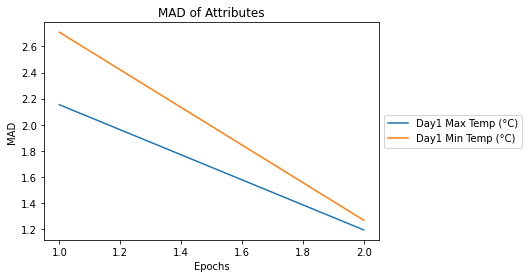

In [0]:
limit_breaker = fullyConnectedRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size + len(set_label_attributes) * int(set_num_days / RNN_percell_days - 1), num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
### OUTPUT_SIZE DIFFERENT USE WITH LIBRARY 2
if(use_cuda):
  limit_breaker = limit_breaker.cuda()
trainFULLYCONNECTEDRNN(limit_breaker, trainingSet=trainingSet, validationSet=validationSet, batch_size=35, learning_rate=0.001, num_epochs=50, master_path = master_path)


###Try 1

In [0]:
new_best_lb_RNN = fullyConnectedRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size * int(set_num_days / RNN_percell_days), num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
if(use_cuda):
  new_best_lb_RNN = new_best_lb_RNN.cuda()
new_best_lb_RNN.load_state_dict(torch.load(master_path + "Saved states/" + get_model_name(new_best_lb_RNN.name, 35, 0.001, 49, None)))

<All keys matched successfully>

In [0]:
train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=30, 
                                            num_workers=1, shuffle=True)
get_final_accuracy_FULLYCONNECTEDRNN(new_best_lb_RNN, train_loader, nn.MSELoss())

(array([2.58394252, 2.06433914]), 2.2919128093610817, 8.723040855094178)

In [0]:
val_loader = torch.utils.data.DataLoader(validationSet, batch_size=35, 
                                            num_workers=1, shuffle=True)
get_final_accuracy_FULLYCONNECTEDRNN(new_best_lb_RNN, val_loader, nn.MSELoss())

(array([2.91891021, 2.45064292]), 2.4543361665325216, 9.948484030636875)

In [0]:
trainFULLYCONNECTEDRNN_Last(new_best_lb_RNN, trainingSet=trainingSet, validationSet=validationSet, batch_size=35, learning_rate=0.0002, num_epochs=50, master_path = master_path)

Training Started...
Epoch 1: Train err: 2.15414457797193, Train loss: 7.553548986949618 |Validation err: 2.4024614483808264, Validation loss: 9.92153076692061
Epoch 2: Train err: 2.129757021859734, Train loss: 7.413879731344799 |Validation err: 2.3801358039965255, Validation loss: 9.777992898767645
Epoch 3: Train err: 2.118911955781744, Train loss: 7.351105156398955 |Validation err: 2.3715704996655047, Validation loss: 9.706717534498734
Epoch 4: Train err: 2.1121596233577424, Train loss: 7.309226565890842 |Validation err: 2.3664209819548807, Validation loss: 9.663216894323176
Epoch 5: Train err: 2.1058008948629, Train loss: 7.270487550705198 |Validation err: 2.3624783323746357, Validation loss: 9.633773196827281
Epoch 6: Train err: 2.100350207863741, Train loss: 7.236317850294567 |Validation err: 2.3603962794253217, Validation loss: 9.618316997181285
Epoch 7: Train err: 2.096089778182887, Train loss: 7.209502651577904 |Validation err: 2.357201887329531, Validation loss: 9.5958765636790

KeyboardInterrupt: ignored

In [0]:
best_lb_RNN = fullyConnectedRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size * int(set_num_days / RNN_percell_days), num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
if(use_cuda):
  best_lb_RNN = best_lb_RNN.cuda()
best_lb_RNN.load_state_dict(torch.load(master_path + "Saved states/BEST_LIMITBREAKER")) #master_path + "Saved states/BEST_LIMITBREAKER"))

ERROR! Session/line number was not unique in database. History logging moved to new session 59


<All keys matched successfully>

In [0]:
train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=30, 
                                            num_workers=1, shuffle=True)
get_final_accuracy_FULLYCONNECTEDRNN(best_lb_RNN, train_loader, nn.MSELoss())

(array([2.56716064, 2.02914819]), 2.270022634915885, 8.570291845765832)

In [0]:
val_loader = torch.utils.data.DataLoader(validationSet, batch_size=35, 
                                            num_workers=1, shuffle=True)
get_final_accuracy_FULLYCONNECTEDRNN(best_lb_RNN, val_loader, nn.MSELoss())

(array([2.89633621, 2.52470485]), 2.4470177357916962, 10.711212635040283)

In [0]:
torch.save(best_lb_RNN.state_dict(), master_path + "Saved states/BEST_LIMITBREAKER")

### Try 2

In [0]:
new_best_lb_RNN = fullyConnectedRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size * int(set_num_days / RNN_percell_days), num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
if(use_cuda):
  new_best_lb_RNN = new_best_lb_RNN.cuda()
new_best_lb_RNN.load_state_dict(torch.load(master_path + "Saved states/" + get_model_name(new_best_lb_RNN.name, 35, 0.001, 13, None)))

<All keys matched successfully>

In [0]:
train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=len(trainingSet), 
                                            num_workers=1, shuffle=True)
get_final_accuracy_FULLYCONNECTEDRNN(new_best_lb_RNN, train_loader, nn.MSELoss())

(array([2.95436457, 2.46465255]), 0.3625744388456253, 12.00858211517334)

In [0]:
val_loader = torch.utils.data.DataLoader(validationSet, batch_size=len(validationSet), 
                                            num_workers=1, shuffle=True)
get_final_accuracy_FULLYCONNECTEDRNN(new_best_lb_RNN, val_loader, nn.MSELoss())

(array([3.09601631, 2.82449809]), 0.4241573033707865, 13.809725761413574)

In [0]:
# Shuffeling and no hidden layer propogation
trainFULLYCONNECTEDRNN_Last(new_best_lb_RNN, trainingSet=trainingSet, validationSet=validationSet, batch_size=35, learning_rate=0.0006, num_epochs=50, master_path = master_path, ID = 'Last changed')

Training Started...
Epoch 1: Train err: 0.3640552995391705, Train loss: 11.754627114250546 |Validation err: 0.4002808988764045, Validation loss: 12.729888395829635
Epoch 2: Train err: 0.33940092165898617, Train loss: 10.740665594736734 |Validation err: 0.37219101123595505, Validation loss: 11.974081733010031
Epoch 3: Train err: 0.3336405529953917, Train loss: 10.290855271475655 |Validation err: 0.3637640449438202, Validation loss: 11.34431435845115
Epoch 4: Train err: 0.32119815668202767, Train loss: 9.822605155763172 |Validation err: 0.3609550561797753, Validation loss: 11.616495349190451
Epoch 5: Train err: 0.3108294930875576, Train loss: 9.568434018937369 |Validation err: 0.351123595505618, Validation loss: 13.123118704015559
Epoch 6: Train err: 0.3052995391705069, Train loss: 9.158450194767543 |Validation err: 0.35674157303370785, Validation loss: 11.159432671286844
Epoch 7: Train err: 0.2947004608294931, Train loss: 9.028902470119416 |Validation err: 0.3342696629213483, Validation

KeyboardInterrupt: ignored

Training Started...
Epoch 1: Train err: 2.7377472505975704, Train loss: 12.0027437210083 |Validation err: 2.865405003344884, Validation loss: 13.373404546217484
Epoch 2: Train err: 2.6356583764091335, Train loss: 11.160743191128685 |Validation err: 2.766340319912057, Validation loss: 12.551136060194535
Epoch 3: Train err: 2.6033328628739754, Train loss: 10.89020185621958 |Validation err: 2.72562624016665, Validation loss: 12.16917896270752
Epoch 4: Train err: 2.5622560138089843, Train loss: 10.582125799996513 |Validation err: 2.6823051380923135, Validation loss: 11.780350641770797
Epoch 5: Train err: 2.5417890436470816, Train loss: 10.418084591154068 |Validation err: 2.6534189516776117, Validation loss: 11.530813043767756
Epoch 6: Train err: 2.505565168485046, Train loss: 10.139249347505116 |Validation err: 2.6240352533813494, Validation loss: 11.263854590329258
Epoch 7: Train err: 2.482646312429722, Train loss: 9.967040084657215 |Validation err: 2.6055093279467676, Validation loss: 11

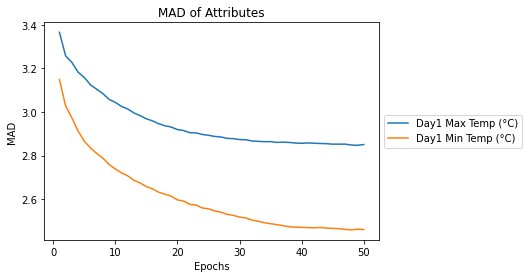

In [0]:
trainFULLYCONNECTEDRNN_Last(new_best_lb_RNN, trainingSet=trainingSet, validationSet=validationSet, batch_size=35, learning_rate=0.0006, num_epochs=50, master_path = master_path)

In [0]:
new_best_lb_RNN = fullyConnectedRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size * int(set_num_days / RNN_percell_days), num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
if(use_cuda):
  new_best_lb_RNN = new_best_lb_RNN.cuda()
new_best_lb_RNN.load_state_dict(torch.load(master_path + "Saved states/" + get_model_name(new_best_lb_RNN.name, 35, 0.0006, 49, None)))

<All keys matched successfully>

In [0]:
train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=len(trainingSet), 
                                            num_workers=1, shuffle=True)
print(get_final_accuracy_FULLYCONNECTEDRNN(new_best_lb_RNN, train_loader, nn.MSELoss()))

(array([2.31534888, 1.7841501 ]), 2.0497494889816297, 7.033927917480469)


In [0]:
val_loader = torch.utils.data.DataLoader(validationSet, batch_size=len(validationSet), 
                                            num_workers=1, shuffle=True)
print(get_final_accuracy_FULLYCONNECTEDRNN(new_best_lb_RNN, val_loader, nn.MSELoss()))

(array([2.58197478, 2.14059196]), 2.361283370589119, 9.522042274475098)


In [0]:
train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=len(trainingSet), 
                                            num_workers=1, shuffle=True)
print(get_final_accuracy_dev_FULLYCONNECTEDRNN(new_best_lb_RNN, train_loader, nn.MSELoss()))

(array([0.29454879, 0.17453046]), 0.23453962437013284, 7.033927917480469)


In [0]:
val_loader = torch.utils.data.DataLoader(validationSet, batch_size=len(validationSet), 
                                            num_workers=1, shuffle=True)
print(get_final_accuracy_dev_FULLYCONNECTEDRNN(new_best_lb_RNN, val_loader, nn.MSELoss()))

(array([0.37921348, 0.26123596]), 0.3202247191011236, 9.530333518981934)


In [0]:
# >5 dev
train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=len(trainingSet), 
                                            num_workers=1, shuffle=True)
get_final_accuracy_dev_FULLYCONNECTEDRNN(new_best_lb_RNN, train_loader, nn.MSELoss())

(array([0.09207513, 0.03618873]), 0.0641319285387082, 7.033928394317627)

In [0]:
val_loader = torch.utils.data.DataLoader(validationSet, batch_size=len(validationSet), 
                                            num_workers=1, shuffle=True)
get_final_accuracy_dev_FULLYCONNECTEDRNN(new_best_lb_RNN, val_loader, nn.MSELoss())

(array([0.12359551, 0.08426966]), 0.10393258426966293, 9.530333518981934)

In [0]:
test_loader = torch.utils.data.DataLoader(testingSet, batch_size=len(testingSet), 
                                            num_workers=1, shuffle=True)
get_final_accuracy_FULLYCONNECTEDRNN(new_best_lb_RNN, test_loader, nn.MSELoss())

(array([2.96194161, 2.25719506]), 2.6095683347235, 11.302743911743164)

In [0]:
test_loader = torch.utils.data.DataLoader(testingSet, batch_size=len(testingSet), 
                                            num_workers=1, shuffle=True)
get_final_accuracy_dev_FULLYCONNECTEDRNN(new_best_lb_RNN, test_loader, nn.MSELoss())

(array([0.3988764, 0.25     ]), 0.324438202247191, 11.302743911743164)

In [0]:
test_loader = torch.utils.data.DataLoader(testingSet, batch_size=len(testingSet), 
                                            num_workers=1, shuffle=True)
get_final_accuracy_dev_FULLYCONNECTEDRNN(new_best_lb_RNN, test_loader, nn.MSELoss())

(array([0.19101124, 0.08426966]), 0.13764044943820225, 11.302743911743164)

In [0]:
model_path = master_path + "Checkpoints/" + get_model_name(new_best_lb_RNN.name, 35, 0.0006, 50, None)
for i, curSet in enumerate(train_seasonal_sets):
  val_loader = torch.utils.data.DataLoader(curSet, batch_size=len(curSet), num_workers=1, shuffle=False)
  errs ,err, loss =get_final_accuracy_dev_FULLYCONNECTEDRNN(new_best_lb_RNN, val_loader, nn.MSELoss())
  print(1 - err)

0.7589743589743589
0.6942857142857143
0.7528735632183908
0.735632183908046
0.7701149425287357
0.7614942528735632
0.8132183908045977
0.8189655172413793
0.7902298850574713
0.7557471264367817
0.7557471264367817
0.7614942528735632


In [0]:
model_path = master_path + "Checkpoints/" + get_model_name(new_best_lb_RNN.name, 35, 0.0006, 50, None)
for i, curSet in enumerate(train_seasonal_sets):
  val_loader = torch.utils.data.DataLoader(curSet, batch_size=len(curSet), num_workers=1, shuffle=False)
  print(get_final_accuracy_FULLYCONNECTEDRNN(new_best_lb_RNN, val_loader, nn.MSELoss()))
  # errs ,err, loss =get_final_accuracy_FULLYCONNECTEDRNN(new_best_lb_RNN, val_loader, nn.MSELoss())
  # np.savetxt("{p}_month{m}_val_errs.csv".format(p=model_path, m = i + 1), errs)
  # np.savetxt("{p}_month{m}_val_meanerr.csv".format(p=model_path, m = i + 1), [err])
  # np.savetxt("{p}_month{m}_val_mse.csv".format(p=model_path, m = i + 1), [loss])

(array([2.15116193, 2.00375382]), 2.0774578759838365, 6.826961040496826)
(array([2.30713327, 2.33411313]), 2.3206231998034874, 8.90701961517334)
(array([2.04540406, 2.151372  ]), 2.098388029998917, 7.175100803375244)
(array([2.60643175, 1.73022448]), 2.1683281147916773, 8.544264793395996)
(array([2.7015964 , 1.50897501]), 2.105285702136228, 7.68033504486084)
(array([2.59195415, 1.64179556]), 2.1168748559622923, 7.83765983581543)
(array([2.25984394, 1.4063561 ]), 1.833100020200358, 5.730310916900635)
(array([2.02125449, 1.58285794]), 1.8020562155493363, 5.178857326507568)
(array([2.25796772, 1.53677457]), 1.8973711449524446, 5.89874267578125)
(array([2.38703957, 1.8301656 ]), 2.1086025811474913, 7.336911201477051)
(array([2.39850357, 1.62662989]), 2.0125667313335036, 6.825859069824219)
(array([2.00769701, 2.00851462]), 2.008105816507991, 6.022699356079102)


### Try 3

In [0]:
new_best_lb_RNN = fullyConnectedRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size * int(set_num_days / RNN_percell_days), num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
if(use_cuda):
  new_best_lb_RNN = new_best_lb_RNN.cuda()
new_best_lb_RNN.load_state_dict(torch.load(master_path + "Saved states/" + get_model_name(new_best_lb_RNN.name, 35, 0.001, 6, None)))

<All keys matched successfully>

In [0]:
train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=30, 
                                            num_workers=1, shuffle=True)
get_final_accuracy_FULLYCONNECTEDRNN(new_best_lb_RNN, train_loader, nn.MSELoss())

(array([3.53462434, 2.93376927]), 3.1924500220662986, 16.525296485587344)

In [0]:
val_loader = torch.utils.data.DataLoader(validationSet, batch_size=35, 
                                            num_workers=1, shuffle=True)
get_final_accuracy_FULLYCONNECTEDRNN(new_best_lb_RNN, val_loader, nn.MSELoss())

(array([3.9601086 , 3.55298247]), 3.476668287272485, 17.980624372308906)

Training Started...
Epoch 1: Train err: 3.1440343027123574, Train loss: 15.740594129713754 |Validation err: 3.281978714245647, Validation loss: 17.6166315945712
Epoch 2: Train err: 2.9701704063305705, Train loss: 14.090392559293717 |Validation err: 3.121813171415517, Validation loss: 15.9862041906877
Epoch 3: Train err: 2.85899702499416, Train loss: 13.071780923813108 |Validation err: 2.988885393202975, Validation loss: 14.513382911682129
Epoch 4: Train err: 2.793325923829125, Train loss: 12.477112550584097 |Validation err: 2.897978966846393, Validation loss: 13.468571662902832
Epoch 5: Train err: 2.7294929785328343, Train loss: 11.925429003579277 |Validation err: 2.8363447463516605, Validation loss: 12.88563533262773
Epoch 6: Train err: 2.6864354887026742, Train loss: 11.557438547649081 |Validation err: 2.782628889766972, Validation loss: 12.395150964910334
Epoch 7: Train err: 2.6493277931030255, Train loss: 11.265079793475923 |Validation err: 2.76789736344029, Validation loss: 12.185

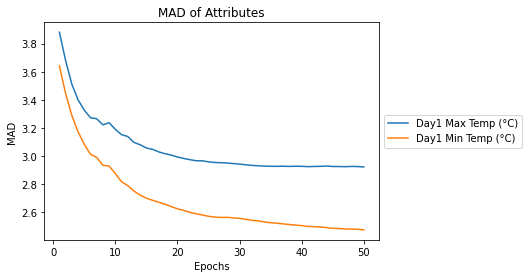

In [0]:
trainFULLYCONNECTEDRNN_Last(new_best_lb_RNN, trainingSet=trainingSet, validationSet=validationSet, batch_size=35, learning_rate=0.0007, num_epochs=50, master_path = master_path)

###Try 4

Training Started...
Epoch 1: Train err: 10.760466337077258, Train loss: 177.4586701166062 |Validation err: 8.157075041706225, Validation loss: 89.84824145923962
Epoch 2: Train err: 5.662793821330755, Train loss: 61.837972822643465 |Validation err: 4.385936554757815, Validation loss: 30.802644209428266
Epoch 3: Train err: 3.706400434590001, Train loss: 31.440563459244984 |Validation err: 3.8198064321163714, Validation loss: 23.806758880615234
Epoch 4: Train err: 3.243140380798614, Train loss: 22.12358202253069 |Validation err: 3.44712534214227, Validation loss: 19.201763239773836
Epoch 5: Train err: 3.059171589321276, Train loss: 17.474191302344913 |Validation err: 3.2059289124783845, Validation loss: 16.275015700947154
Epoch 6: Train err: 2.961600523177885, Train loss: 15.261886573973156 |Validation err: 3.0515139288514894, Validation loss: 14.590493635697799
Epoch 7: Train err: 2.898862498546944, Train loss: 14.23160689974588 |Validation err: 2.982332013426035, Validation loss: 13.845

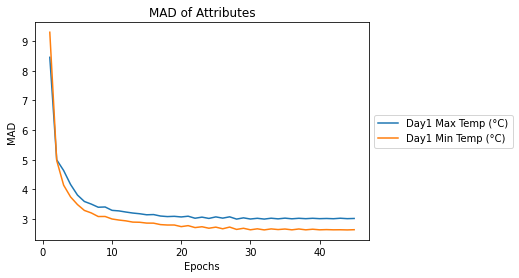

In [0]:
lb_last2 = fullyConnectedRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size + len(set_label_attributes) * int(set_num_days / RNN_percell_days - 1), num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
if(use_cuda):
  lb_last2 = lb_last2.cuda()
trainFULLYCONNECTEDRNN_Last2(lb_last2, trainingSet=trainingSet, validationSet=validationSet, batch_size=35, learning_rate=0.001, num_epochs=45, master_path = master_path, ID = 'Last2')

### Try 5

In [0]:
limit_breaker = fullyConnectedRNN2(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size + len(set_label_attributes) * int(set_num_days / RNN_percell_days - 1), num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
### OUTPUT_SIZE DIFFERENT USE WITH LIBRARY 2
### fullyConnectedRNN2
if(use_cuda):
  limit_breaker = limit_breaker.cuda()
trainFULLYCONNECTEDRNN(limit_breaker, trainingSet=trainingSet, validationSet=validationSet, batch_size=35, learning_rate=0.001, num_epochs=50, master_path = master_path)


Training Started...
Epoch 1: Train err: 0.8174539170506913, Train loss: 197.91879968794566 |Validation err: 0.8065308988764045, Validation loss: 149.07696550542659
Epoch 2: Train err: 0.7349654377880185, Train loss: 93.83244063362243 |Validation err: 0.6776685393258427, Validation loss: 46.66493727944114
Epoch 3: Train err: 0.5604838709677419, Train loss: 28.01203241802397 |Validation err: 0.5129915730337079, Validation loss: 27.57329325242476
Epoch 4: Train err: 0.4725230414746544, Train loss: 19.45024173221891 |Validation err: 0.47331460674157305, Validation loss: 22.698761853304777
Epoch 5: Train err: 0.4501728110599078, Train loss: 17.61794978853256 |Validation err: 0.46629213483146065, Validation loss: 20.825304204767402
Epoch 6: Train err: 0.4300115207373272, Train loss: 16.272741037701802 |Validation err: 0.4652387640449438, Validation loss: 19.612811175259676
Epoch 7: Train err: 0.4189516129032258, Train loss: 15.475934149726989 |Validation err: 0.4589185393258427, Validation l

Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


KeyboardInterrupt: ignored

In [0]:
new_best_lb_RNN = fullyConnectedRNN2(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size * int(set_num_days / RNN_percell_days), num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
### fullyConnectedRNN2
if(use_cuda):
  new_best_lb_RNN = new_best_lb_RNN.cuda()
new_best_lb_RNN.load_state_dict(torch.load(master_path + "Saved states/" + get_model_name(new_best_lb_RNN.name, 35, 0.001, 3, None)))

<All keys matched successfully>

Training Started...
Epoch 1: Train err: 0.5, Train loss: 20.899125734965008 |Validation err: 0.4747191011235955, Validation loss: 22.963448784568094
Epoch 2: Train err: 0.47119815668202764, Train loss: 18.215535398513552 |Validation err: 0.46207865168539325, Validation loss: 20.14574467052113
Epoch 3: Train err: 0.44078341013824884, Train loss: 16.316825685046968 |Validation err: 0.4438202247191011, Validation loss: 17.588558023626153
Epoch 4: Train err: 0.4142857142857143, Train loss: 14.88677432045104 |Validation err: 0.42275280898876405, Validation loss: 16.221669327129018
Epoch 5: Train err: 0.3912442396313364, Train loss: 13.929524784996396 |Validation err: 0.40730337078651685, Validation loss: 15.192178769545121
Epoch 6: Train err: 0.3778801843317972, Train loss: 13.168805864122179 |Validation err: 0.3946629213483146, Validation loss: 14.327826499938965
Epoch 7: Train err: 0.3709677419354839, Train loss: 12.566098205626957 |Validation err: 0.38202247191011235, Validation loss: 13

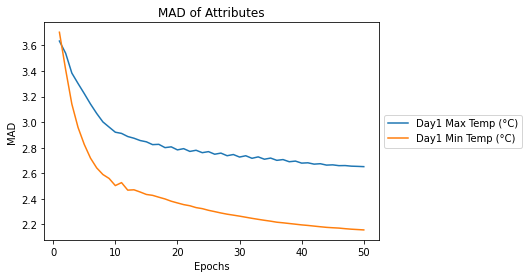

In [0]:
trainFULLYCONNECTEDRNN_Last(new_best_lb_RNN, trainingSet=trainingSet, validationSet=validationSet, batch_size=35, learning_rate=0.0006, num_epochs=50, master_path = master_path, ID = 'fcRNN2')

### Try 6

In [0]:
lb3 = fullyConnectedRNN3(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size + len(set_label_attributes) * int(set_num_days / RNN_percell_days - 1), num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
### OUTPUT_SIZE DIFFERENT USE WITH LIBRARY 2
### fullyConnectedRNN3
if(use_cuda):
  lb3 = lb3.cuda()
trainFULLYCONNECTEDRNN(lb3, trainingSet=trainingSet, validationSet=validationSet, batch_size=35, learning_rate=0.001, num_epochs=50, master_path = master_path)


Training Started...


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/l

Epoch 1: Train err: 0.8112903225806452, Train loss: 189.45943217807346 |Validation err: 0.7882724719101124, Validation loss: 129.39327465404165


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/l

Epoch 2: Train err: 0.7111751152073733, Train loss: 74.3902066851419 |Validation err: 0.6436095505617978, Validation loss: 36.76729731126265


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/l

Epoch 3: Train err: 0.5468894009216589, Train loss: 25.207791790129647 |Validation err: 0.543188202247191, Validation loss: 30.029085549441252


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/l

Epoch 4: Train err: 0.4984447004608295, Train loss: 21.5692243954492 |Validation err: 0.5410814606741573, Validation loss: 28.809032353487883


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/l

Epoch 5: Train err: 0.48715437788018434, Train loss: 20.566358452751523 |Validation err: 0.5291432584269663, Validation loss: 27.74341444535689


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/l

Epoch 6: Train err: 0.4774193548387097, Train loss: 19.87339993885585 |Validation err: 0.5256320224719101, Validation loss: 27.35915253379128


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/l

Epoch 7: Train err: 0.46733870967741936, Train loss: 19.126575469970703 |Validation err: 0.5214185393258427, Validation loss: 26.624427622014824


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/l

Epoch 8: Train err: 0.4582373271889401, Train loss: 18.662113280523393 |Validation err: 0.516502808988764, Validation loss: 25.992568536238238


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/l

Epoch 9: Train err: 0.4552995391705069, Train loss: 18.340044521150134 |Validation err: 0.5084269662921348, Validation loss: 25.890633583068848


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/l

Epoch 10: Train err: 0.4547811059907834, Train loss: 18.179739293597994 |Validation err: 0.5108848314606742, Validation loss: 25.850798866965555


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
Traceback (most recent call last):
    self._shutdown_workers()
  File "/usr/local/l

Epoch 11: Train err: 0.4444124423963134, Train loss: 17.59984208667089 |Validation err: 0.5024578651685393, Validation loss: 25.369905038313433


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/l

Epoch 12: Train err: 0.442741935483871, Train loss: 17.40814987061516 |Validation err: 0.4961376404494382, Validation loss: 25.265377391468395


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/l

Epoch 13: Train err: 0.4418778801843318, Train loss: 17.224924935234917 |Validation err: 0.48735955056179775, Validation loss: 25.038813070817426


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/l

Epoch 14: Train err: 0.4377880184331797, Train loss: 16.919274163624596 |Validation err: 0.48946629213483145, Validation loss: 24.989795338023793


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/l

Epoch 15: Train err: 0.43496543778801844, Train loss: 16.731855256216868 |Validation err: 0.4866573033707865, Validation loss: 24.947436246004973


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/l

Epoch 16: Train err: 0.4330069124423963, Train loss: 16.590271601601252 |Validation err: 0.4824438202247191, Validation loss: 24.890335429798473


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/l

Epoch 17: Train err: 0.4305875576036866, Train loss: 16.44030227358379 |Validation err: 0.4827949438202247, Validation loss: 25.198561408303


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/l

Epoch 18: Train err: 0.4305875576036866, Train loss: 16.421381541660853 |Validation err: 0.48314606741573035, Validation loss: 25.125046036460184


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/l

Epoch 19: Train err: 0.42932027649769583, Train loss: 16.22207790707785 |Validation err: 0.48139044943820225, Validation loss: 25.17942680012096


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/l

Epoch 20: Train err: 0.4284562211981567, Train loss: 16.122358049665177 |Validation err: 0.4863061797752809, Validation loss: 25.208527478304777


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/l

Epoch 21: Train err: 0.42805299539170505, Train loss: 16.06715816921658 |Validation err: 0.48525280898876405, Validation loss: 25.435430093245074


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fd5f043dc18>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process


KeyboardInterrupt: ignored

In [0]:
lb3 = fullyConnectedRNN3(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size * int(set_num_days / RNN_percell_days), num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
### fullyConnectedRNN3
if(use_cuda):
  lb3 = lb3.cuda()
lb3.load_state_dict(torch.load(master_path + "Saved states/" + get_model_name(lb3.name, 35, 0.001, 3, None)))

<All keys matched successfully>

In [0]:
train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=len(trainingSet), 
                                            num_workers=1, shuffle=True)
get_final_accuracy_FULLYCONNECTEDRNN(lb3, train_loader, nn.MSELoss())

(array([3.59389017, 3.16954742]), 0.4651855245075584, 18.690994262695312)

In [0]:
val_loader = torch.utils.data.DataLoader(validationSet, batch_size=len(validationSet), 
                                            num_workers=1, shuffle=True)
get_final_accuracy_FULLYCONNECTEDRNN(lb3, val_loader, nn.MSELoss())

(array([3.93845425, 3.76310425]), 0.5252808988764045, 24.12879180908203)

Training Started...
Epoch 1: Train err: 0.6066820276497696, Train loss: 36.47704648214673 |Validation err: 0.5421348314606742, Validation loss: 20.410750649192117
Epoch 2: Train err: 0.5447004608294931, Train loss: 28.74603702151586 |Validation err: 0.5252808988764045, Validation loss: 20.215316772460938
Epoch 3: Train err: 0.5306451612903226, Train loss: 28.680107684362504 |Validation err: 0.48314606741573035, Validation loss: 17.007091782309793
Epoch 4: Train err: 0.5345622119815668, Train loss: 28.63139397757394 |Validation err: 0.4452247191011236, Validation loss: 16.89905426718972
Epoch 5: Train err: 0.5064516129032258, Train loss: 23.06179811084081 |Validation err: 0.4901685393258427, Validation loss: 18.637682741338555
Epoch 6: Train err: 0.5407834101382488, Train loss: 27.865779619368297 |Validation err: 0.44241573033707865, Validation loss: 16.2500581741333
Epoch 7: Train err: 0.5140552995391705, Train loss: 25.01127134050642 |Validation err: 0.45646067415730335, Validation lo

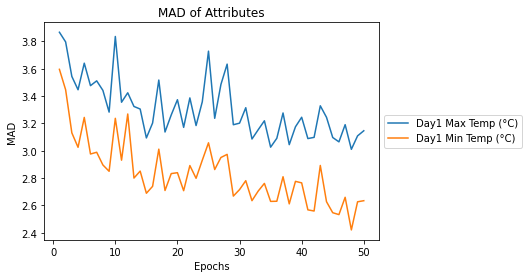

In [0]:
trainFULLYCONNECTEDRNN_Last2(lb3, trainingSet=trainingSet, validationSet=validationSet, batch_size=35, learning_rate=0.008, num_epochs=50, master_path = master_path)

# ais's tunning parameter


In [0]:
limit_breaker = fullyConnectedRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size * int(set_num_days / RNN_percell_days), num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
if(use_cuda):
  limit_breaker = limit_breaker.cuda()
trainFULLYCONNECTEDRNN(limit_breaker, trainingSet=trainingSet, validationSet=validationSet, batch_size=35, learning_rate=0.001, num_epochs=45, master_path = master_path)


Training Started...
Epoch 1: Train err: 9.182001387259817, Train loss: 136.1207830350693 |Validation err: 7.531498045139433, Validation loss: 88.36316013336182
Epoch 2: Train err: 6.436018791231633, Train loss: 70.58051702421005 |Validation err: 5.521132934934805, Validation loss: 48.13496398925781
Epoch 3: Train err: 4.876441766210622, Train loss: 40.70572936698182 |Validation err: 4.307527779545007, Validation loss: 29.765361150105793
Epoch 4: Train err: 3.945830298856907, Train loss: 26.478127727769827 |Validation err: 3.546199328130048, Validation loss: 20.279169241587322
Epoch 5: Train err: 3.3794033315297227, Train loss: 19.079152159494896 |Validation err: 3.155878275406829, Validation loss: 16.044313669204712
Epoch 6: Train err: 3.025834057742102, Train loss: 15.14266270154143 |Validation err: 2.881371538354998, Validation loss: 13.613422314325968
Epoch 7: Train err: 2.8452384482084536, Train loss: 13.248218333884461 |Validation err: 2.8173894622952633, Validation loss: 13.20679

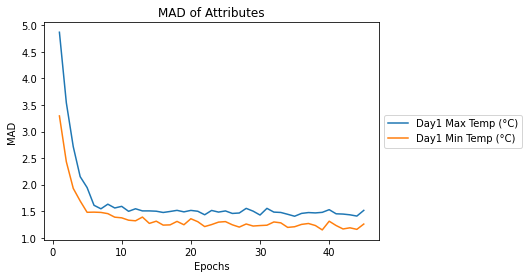

In [0]:
weather_surr_RNN = weatherSurrRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_surr_RNN = weather_surr_RNN.cuda()
train(weather_surr_RNN, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.0035, num_epochs=45, master_path = master_path)


In [0]:
best_RNN = weatherSurrRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  best_RNN = best_RNN.cuda()
best_RNN.load_state_dict(torch.load(master_path + "Saved states/" + get_model_name(best_RNN.name, 30, 0.0035, 44, None)))

<All keys matched successfully>

In [0]:

val_loader = torch.utils.data.DataLoader(validationSet, batch_size=30, 
                                            num_workers=1, shuffle=True)
get_accuracy(best_RNN, val_loader, criterion = nn.MSELoss())

(array([1.42005363, 1.15446434]), 2.379639290281561, 9.77849555015564)

In [0]:
train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=30, 
                                            num_workers=1, shuffle=True)
get_accuracy(best_RNN, train_loader, criterion = nn.MSELoss())

(array([1.1885549 , 0.92386442]), 2.081354840082292, 7.3832092089195775)

In [0]:
torch.save(best_RNN.state_dict(), master_path + "Saved states/best_surr_rnn")

In [0]:
weather_surr_RNN = weatherSurrRNN(hidden_size=glob_inp_size)
if(use_cuda):
  weather_surr_RNN = weather_surr_RNN.cuda()
weather_surr_RNN.load_state_dict(torch.load(master_path + "Saved states/first_surr_rnn"))

In [0]:
master_path = "/content/gdrive/My Drive/APS360 Team/milestone 3/"
weather_surr_GRU = weatherSurrGRU(hidden_size=glob_inp_size)
if(use_cuda):
  weather_surr_GRU = weather_surr_GRU.cuda()
train(weather_surr_GRU, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.01, num_epochs=45, master_path = master_path)

In [0]:
master_path = "/content/gdrive/My Drive/APS360 Team/milestone 3/"
torch.save(weather_surr_GRU.state_dict(), master_path + "Saved states/first_surr_gru")

In [0]:
weather_surr_GRU = weatherSurrGRU(hidden_size=glob_inp_size)
if(use_cuda):
  weather_surr_GRU = weather_surr_GRU.cuda()
weather_surr_GRU.load_state_dict(torch.load(master_path + "Saved states/first_surr_gru"))

In [0]:
load_path = master_path + "Saved states/"
weather_surr_GRU_test = weatherSurrGRU(hidden_size=glob_inp_size) # weatherSurrGRU_bs30_lr0.01_epoch40
weather_surr_GRU_test.load_state_dict(torch.load(load_path + get_model_name(weather_surr_GRU_test.name, 30, 0.01, 40)))

## Seasonal training

In [0]:
seasonsal_RNNS = [None] * num_seasons
for i, curRNN in enumerate(seasonsal_RNNS):  
  seasonsal_RNNS[i] = weather_surr_RNN(hidden_size=glob_inp_size)
  if(use_cuda):
    seasonsal_RNNS[i] = seasonsal_RNNS[i].cuda()
  train(seasonsal_RNNS[i], trainingSet=train_seasonal_sets[i], validationSet=val_seasonal_sets[i], batch_size=30, learning_rate=0.0100021, num_epochs=45, master_path = master_path)

In [0]:
import copy

seasonsal_RNNS = [None] * num_seasons
for i, curRNN in enumerate(seasonsal_RNNS):  
  seasonsal_RNNS[i] = copy.deepcopy(weather_surr_RNN)
  if(use_cuda):
    seasonsal_RNNS[i] = seasonsal_RNNS[i].cuda()
  train(seasonsal_RNNS[i], trainingSet=train_seasonal_sets[i], validationSet=val_seasonal_sets[i], batch_size=20, learning_rate=0.00100021, num_epochs=45, master_path = master_path, ID = 'seasonal')

In [0]:
import copy

seasonsal_GRUS = [None] * num_seasons
for i, curRNN in enumerate(seasonsal_GRUS):  
  seasonsal_GRUS[i] = copy.deepcopy(weather_surr_GRU)
  if(use_cuda):
    seasonsal_GRUS[i] = seasonsal_GRUS[i].cuda()
  train(seasonsal_GRUS[i], trainingSet=train_seasonal_sets[i], validationSet=val_seasonal_sets[i], batch_size=20, learning_rate=0.00100021, num_epochs=45, master_path = master_path, ID = 'seasonal')

#Days_Ahead Training

In [0]:
np.argwhere(np.isnan(trainingSet))

In [0]:
#check where there are nulls of NaN in the sets
null_index=set()
for i in range(len(trainingSet)):
  if(np.isnan(trainingSet[i][0]).any() or np.isnan(trainingSet[i][1]).any()):
    null_index.add(i)
    

for j in null_index:
  print(trainingSet[j])




In [0]:
model_path = get_model_name(weather_surr_RNN)
# This is how we save right now for total error
np.savetxt("{}_train_err.csv".format(model_path), train_err)
# Let's save the mean_day_attr_err:
np.savetxt("{p}_val_err_day{x}_{attribute}.csv".format(p=model_path, x = 1, attribute = "Total Precip (mm)"), mean_day_attr_err[attribute_idx])


Training Started...
Epoch 1: Train err: 4.7057089474701, Train loss: 45.703809111085654 |Validation err: 3.9107548619586776, Validation loss: 26.356911341349285
Finished Training
Total time elapsed: 21.49 seconds


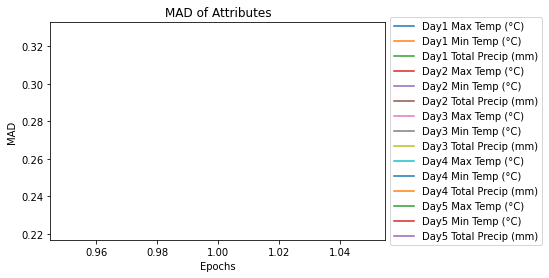

In [0]:
#janelle - 5 days ahead, (max, min) inputs
master_path = "/content/gdrive/My Drive/APS360 Team/milestone 3/"
weather_surr_RNN=weatherSurrRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)

if(use_cuda):
  weather_surr_RNN = weather_surr_RNN.cuda()
train(weather_surr_RNN, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.01, num_epochs=1, master_path = master_path)
#attribute 0 = max temp day1; attr1 = min temp day 1; attr2 = max temp day2; attr3 = min temp day 2

In [0]:
#janelle - 5 days ahead, (max, min) inputs
master_path = "/content/gdrive/My Drive/APS360 Team/milestone 3/"
weather_surr_RNN=weatherSurrRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)

if(use_cuda):
  weather_surr_RNN = weather_surr_RNN.cuda()
train(weather_surr_RNN, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.01, num_epochs=3, master_path = master_path)
#attribute 0 = max temp day1; attr1 = min temp day 1; attr2 = max temp day2; attr3 = min temp day 2

Training Started...
Epoch 1: Train err: 4.7057089474701, Train loss: 45.703809111085654 |Validation err: 3.9107548619586776, Validation loss: 26.356911341349285
Epoch 2: Train err: 3.8614116525834725, Train loss: 29.35738197744709 |Validation err: 3.839203659984575, Validation loss: 25.657785097757976
Epoch 3: Train err: 3.8109135218707073, Train loss: 28.852023399039492 |Validation err: 3.8273186198224947, Validation loss: 25.31646219889323
Epoch 4: Train err: 3.8080804309603677, Train loss: 29.02018625442296 |Validation err: 3.887029040172193, Validation loss: 26.448267618815105
Epoch 5: Train err: 3.84474250058968, Train loss: 29.247258068764047 |Validation err: 3.7749106489651436, Validation loss: 25.593353271484375
Epoch 6: Train err: 3.8368793525282325, Train loss: 29.258470404638004 |Validation err: 3.892979463572993, Validation loss: 26.071850776672363
Epoch 7: Train err: 3.9054070690022544, Train loss: 30.01066260141869 |Validation err: 4.150669731142612, Validation loss: 28.2

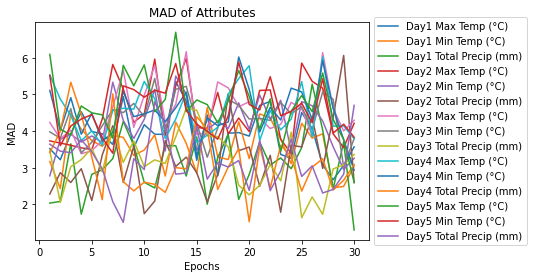

In [0]:
#janelle - 5 days ahead, (max, min) inputs
master_path = "/content/gdrive/My Drive/APS360 Team/milestone 3/"
weather_surr_RNN=weatherSurrRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)

if(use_cuda):
  weather_surr_RNN = weather_surr_RNN.cuda()
train(weather_surr_RNN, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.01, num_epochs=30, master_path = master_path)
#attribute 0 = max temp day1; attr1 = min temp day 1; attr2 = max temp day2; attr3 = min temp day 2

Training Started...
Epoch 1: Train err: 9.905389126112148, Train loss: 154.48942524113068 |Validation err: 8.240536551018446, Validation loss: 103.90557861328125
Epoch 2: Train err: 7.175421054780047, Train loss: 84.03430703568132 |Validation err: 6.298792444420664, Validation loss: 60.587934494018555
Epoch 3: Train err: 5.6320397562927145, Train loss: 51.28972732857482 |Validation err: 5.133387778163626, Validation loss: 40.10409148534139
Epoch 4: Train err: 4.708090188409885, Train loss: 35.30715025287785 |Validation err: 4.458326779640792, Validation loss: 30.623589197794598
Epoch 5: Train err: 4.103086591149616, Train loss: 26.573120535236516 |Validation err: 3.75317544257373, Validation loss: 22.767056624094646
Epoch 6: Train err: 3.6762625101600492, Train loss: 21.48230053627328 |Validation err: 3.4708418163606964, Validation loss: 19.744285424550373
Epoch 7: Train err: 3.3894277827824166, Train loss: 18.520271967535148 |Validation err: 3.2503303022392456, Validation loss: 18.083

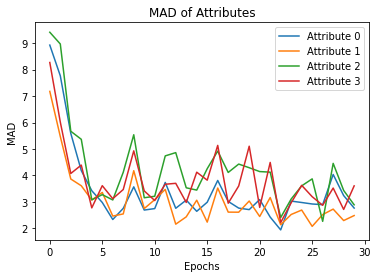

In [0]:
#janelle - 2 days ahead, (max, min) inputs
master_path = "/content/gdrive/My Drive/APS360 Team/milestone 3/"
#weather_surr_RNN = weatherSurrRNN(hidden_size=glob_inp_size, output_size=4) #number of attributes * days_ahead = 2 attributes per day * 2 days
weather_surr_RNN = weatherSurrRNN(hidden_size= glob_inp_size, output_size= set_days_ahead * len(set_attributes)) #number of attributes * days_ahead = 2 attributes per day * 2 days

if(use_cuda):
  weather_surr_RNN = weather_surr_RNN.cuda()
train(weather_surr_RNN, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.01, num_epochs=30, master_path = master_path)
#attribute 0 = max temp day1; attr1 = min temp day 1; attr2 = max temp day2; attr3 = min temp day 2

In [0]:
#janelle - 2 days ahead, (max, min) inputs
master_path = "/content/gdrive/My Drive/APS360 Team/milestone 3/"
#weather_surr_RNN = weatherSurrRNN(hidden_size=glob_inp_size, output_size=4) #number of attributes * days_ahead = 2 attributes per day * 2 days
weather_surr_RNN = weatherSurrRNN(hidden_size=glob_inp_size, output_size= days_ahead * len(set_attributes)) #number of attributes * days_ahead = 2 attributes per day * 2 days

if(use_cuda):
  weather_surr_RNN = weather_surr_RNN.cuda()
train(weather_surr_RNN, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.01, num_epochs=30, master_path = master_path)


Training Started...
Epoch 1: Train err: 9.981539675376654, Train loss: 161.52362468144665 |Validation err: 8.149052263997243, Validation loss: 108.30670166015625
Epoch 2: Train err: 7.055211480097708, Train loss: 88.00901235293036 |Validation err: 6.044932336268129, Validation loss: 62.37069829305013
Epoch 3: Train err: 5.333836135828397, Train loss: 52.84146400347148 |Validation err: 4.6577081443051265, Validation loss: 39.74955129623413
Epoch 4: Train err: 4.252173962830988, Train loss: 35.032442145151634 |Validation err: 3.9242932438013254, Validation loss: 29.279794057210285
Epoch 5: Train err: 3.7089321545324783, Train loss: 26.568391408005805 |Validation err: 3.418710606704267, Validation loss: 23.396044890085857
Epoch 6: Train err: 3.240745750688964, Train loss: 21.21550178527832 |Validation err: 3.1251723349764107, Validation loss: 20.730104207992554
Epoch 7: Train err: 3.0294081284182917, Train loss: 18.960035820529885 |Validation err: 2.938289442178462, Validation loss: 18.95

# M2 surrANN

## Library

### File manager

In [0]:
import pandas as pd
# Prints how many nulls there are in max and min temp
def test_null_csv_daily(dir, station, start_year, end_year, out_name =  None):
    """
      Args:
          station (string): eg. "ON_6158355"
          start_year (int): Starting year
          end_year (int)  : Ending year
          start_date (int): start_date = 0 is day 1 of starting year (Where we want the sampling to start)
          out_name (optional string) : change the name of the output file
    """
    if out_name == None:
      out_name = station + '_' + str(start_year) + '-' + str(end_year)
    master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' + dir
    src_path = master_path + 'datasets/'
    newdf = pd.read_csv(src_path + out_name + ".csv")
    print("Max temp nulls: " + str(newdf['Max Temp (°C)'].isnull().sum()))
    print("Min temp nulls: " + str(newdf['Min Temp (°C)'].isnull().sum()))
    print("Total Precip (mm) nulls: " + str(newdf['Total Precip (mm)'].isnull().sum()))
    #print("Tot precip nans: " + str(pd.isna(newdf['Total Precip (mm)']).sum()))
    

In [0]:
import pandas as pd
# Interpolates null values in min and max temp cols
def inter_nulls_csv_daily(dir, station, start_year, end_year, out_name =  None):
    """
      Args:
          station (string): eg. "ON_6158355"
          start_year (int): Starting year
          end_year (int)  : Ending year
          start_date (int): start_date = 0 is day 1 of starting year (Where we want the sampling to start)
          out_name (optional string) : change the name of the output file
    """
    if out_name == None:
      out_name = station + '_' + str(start_year) + '-' + str(end_year)
    master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' + dir
    src_path = master_path + 'datasets/'
    newdf = pd.read_csv(src_path + out_name + ".csv")
    newdf['Max Temp (°C)'] = newdf['Max Temp (°C)'].interpolate()
    newdf['Min Temp (°C)']= newdf['Min Temp (°C)'].interpolate()
    newdf['Total Precip (mm)']= newdf['Total Precip (mm)'].interpolate()
    
    newdf.to_csv( src_path +  out_name + ".csv")

In [0]:
#Raw csv downloaded must be place in /raw folder
#Merged csv will be stored at /datasets folder
# Also interpolates the null max and min temp
def make_csv_daily(dir, station, start_year, end_year, out_name =  None):
  """
    Args:
        station (string): eg. "ON_6158355"
        start_year (int): Starting year
        end_year (int)  : Ending year
        start_date (int): start_date = 0 is day 1 of starting year (Where we want the sampling to start)
        out_name (optional string) : change the name of the output file
    """
  if out_name == None:
    out_name = station + '_' + str(start_year) + '-' + str(end_year)
  master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' + dir
  src_path = master_path
  dest_path = master_path + 'datasets/'
  fout = open(dest_path + out_name + ".csv","w+")
  in_base = "en_climate_daily_" + station + '_' #eg: 'en_climate_daily_ON_6158355_'
  in_end = '_P1D.csv'
  # first file:
  for line in open(src_path + in_base + str(start_year) + in_end):
      fout.write(line)
  # now the rest:    
  for num in range(start_year + 1, end_year + 1):
      f = open(src_path + in_base + str(num) + in_end)
      f.__next__() # skip the header
      for line in f:
          fout.write(line)
      f.close() # not really needed
  fout.close()
  inter_nulls_csv_daily(dir, station, start_year, end_year, out_name)

In [0]:
def getDayAttrLabels(days_ahead, set_label_attributes):
  dayAttrLabels ={}
  i=0
  for day in range(1,days_ahead+1):
     for attr in set_label_attributes:
       dayAttrLabels[i] = 'Day{} {}'.format(day,attr)
       i+=1
  return dayAttrLabels
      

### Set creators

In [0]:
###Hyper parameters of data sets

####### Set #######
set_start_day = 0
set_num_days = 3
set_days_ahead = 1 #predict 5 days ahead
set_data_attributes = ['Max Temp (°C)', 'Min Temp (°C)']#,'Total Precip (mm)']
set_label_attributes = ['Max Temp (°C)', 'Min Temp (°C)']

stationSrc = "ON_6158355"
dirSrc =  "data/Target A/target/"
dirSurr = "data/Target A/surr/"
stationSurr = ["ON_615S001", "ON_6158751", "ON_615HMAK"]

start_season_day = 0
num_seasons = 12

####### Training Set #######
start_year_train = 2008
end_year_train = 2013 
# Must be the same as training because of season syncing
start_date_train = set_start_day 
end_date_train = None

####### Validation Set #######
start_year_val = 2014
end_year_val = 2014
# Must be the same as training because of season syncing
start_date_val = set_start_day 
end_date_val = None

####### Testing Set #######
start_year_test = 2007
end_year_test = 2007
# Must be the same as training because of season syncing
start_date_test = set_start_day 
end_date_test = None

####### Global variables #######
set_num_stations = 1 + len(stationSurr)
glob_dayAttr_labels = getDayAttrLabels(set_days_ahead, set_label_attributes) #make labels for day-attribute combinations
glob_inp_size = set_num_stations * len(set_data_attributes) * set_num_days
glob_out_size = len(set_label_attributes)*set_days_ahead
master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/'

In [0]:
import pandas as pd
import numpy as np
import math
from torch.utils.data import Dataset, DataLoader
class WeatherSurroundingDataset(Dataset):
    """Weather dataset."""

    def __init__(self, dirSrc, dirSurr, stationSrc, stationSurr, start_year, end_year, days_ahead =1, start_date = 0, end_date = None, num_days = 7, data_attributes = ['Max Temp (°C)', 'Min Temp (°C)'], label_attributes = ['Max Temp (°C)', 'Min Temp (°C)'], make_csv = False, out_name = None):
        """
        Args:
            dirSrc (string) =  "data/Target A/target/" relative directory of target station
            dirSurr (string) = "data/Target A/surr/" relative directory of surrounding stations
            stationSrc (string): eg. "ON_6158355"
            stationSurr (list of strings)
            start_year (int): Starting year
            end_year (int)  : Ending year
            days_ahead (int): number of days to be predicted
            start_date (int): start_date = 0 is day 1 of starting year (Where we want the sampling to start)
            end_date (optional int) : end_date = 7 is day 8 of starting year(min = 7 because of LABEL!). If provided changes the end date from last day of last year.
            num_days (optional int) : num_days is the interval of days before the label.
            make_csv (optional bool): If true it will call make_csv_daily function to create the csv from /raw datasets into /datasets
            out_name (optional string) : change the name of the output file which it reads from
        """
        self.data_attributes = data_attributes
        self.label_attributes = label_attributes
        self.days_ahead = days_ahead 
        self.num_days = num_days
        if(out_name == None):
          self.out_name = stationSrc + '_' + str(start_year) + '-' + str(end_year)
        else:
          self.out_name = out_name
        master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' +  dirSrc
        dest_path = master_path + 'datasets/'
        if (make_csv):
          make_csv_daily(dirSrc, stationSrc, start_year, end_year, out_name = out_name)

        self.src_csv = pd.read_csv(dest_path + self.out_name +'.csv')

        self.sur_csvs = []

        master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' +  dirSurr
        dest_path = master_path + 'datasets/'
        for station_surr in stationSurr:
          file_name = station_surr + '_' + str(start_year) + '-' + str(end_year)
          if (make_csv):
            make_csv_daily(dirSurr, station_surr, start_year, end_year, out_name = file_name)
          print(dest_path + file_name +'.csv')
          self.sur_csvs.append(pd.read_csv(dest_path + file_name +'.csv'))

        self.start_date = start_date
        if( end_date == None):
          self.end_date = len(self.src_csv) - 1
        else:
          self.end_date = end_date

        # Just making sure files are of the same size
        for i, cur_sur_csv in enumerate(self.sur_csvs):
          if(len(self.src_csv) != len(cur_sur_csv)):
            if(len(self.src_csv) > len(cur_sur_csv)):
              assert(0) # Surrounding stations don't have sufficient days to fill the dataset
            print("Caution: Traget station has {trg_days} days while surr station idx {idx} has {sur_days} days".format(len(self.src_csv), i, len(cur_sur_csv)))

    def __len__(self):
        return self.end_date - self.start_date +1 - self.num_days - self.days_ahead if self.end_date - self.start_date +1 - self.num_days - self.days_ahead >= 0 else 0

    def __getitem__(self, idx):
        data = self.src_csv.loc[ idx + self.start_date : idx + self.start_date + self.num_days - 1 , self.data_attributes ]
        
        for cur_csv in self.sur_csvs:
          new_data = cur_csv.loc[ idx + self.start_date : idx + self.start_date + self.num_days - 1 , self.data_attributes ]
          data = np.concatenate([data, new_data], axis= 1)

        start_days_ahead =  idx + self.start_date + self.num_days
        end_days_ahead = start_days_ahead + self.days_ahead - 1  
        
        #label = self.src_csv.loc[ idx + self.start_date + self.num_days, ['Max Temp (°C)', 'Min Temp (°C)'] ]
        
        label = self.src_csv.loc[start_days_ahead:end_days_ahead, self.label_attributes ] 
        label = np.asarray(label).flatten()
        label = label.astype('float')

        data = data.flatten()

        #print('Data: {}'.format(data))
        #print('Data shape: {}'.format(data.shape))
        #print('Labels shape: {}'.format(label.shape))
        #print('Labels: {}'.format(label[:2]))
        sample = [data, label]

        return sample

    def giveSeasonalSets(self, start_season_day = 0, num_seasons = 4):
        """num_seasons > 1 or meaningless and unknown behaviour"""
        seasonalSets = [None] * num_seasons

        #seasonIntervals = math.ceil(365.25 / num_seasons)
        seasonIntervals = math.floor((self.end_date - self.start_date) / (math.floor((self.end_date - self.start_date + 1) / 365) * num_seasons))

        if(start_season_day > seasonIntervals):
          start_season_day = start_season_day % seasonIntervals
          print("Truncated start_season_day to {}. Accepts values between 0 ~ {}".format(start_season_day, seasonIntervals-1))
        if(start_season_day > 0):
          seasonalSets[-1] = SeasonalDataset(self, 0, start_season_day - 1)
        curLastDay = seasonIntervals + start_season_day - 1
        seasonalSets[0] = SeasonalDataset(self, start_season_day - self.num_days, curLastDay) # start date can include days from previous season to predict current season days

        curStartDay = curLastDay + 1 
        curLastDay = seasonIntervals + curStartDay - 1
        i = 1
        while(curLastDay < self.end_date): # Do not add the last interval
          #print("giveSeasonalSets: " + str(i) + " " + str(curStartDay) + " " + str(curLastDay))
          if(seasonalSets[i] == None ):
            seasonalSets[i] = SeasonalDataset(self, curStartDay - self.num_days, curLastDay)
          else:
            seasonalSets[i] = seasonalSets[i] + SeasonalDataset(self, curStartDay - self.num_days, curLastDay)
          curStartDay = curLastDay + 1
          curLastDay = seasonIntervals + curStartDay - 1
          i += 1
          i %= num_seasons

        # Now add the last set
        curLastDay = self.end_date
        if(seasonalSets[i] == None ):
            seasonalSets[i] = SeasonalDataset(self, curStartDay - self.num_days, curLastDay)
        else:
            seasonalSets[i] = seasonalSets[i] + SeasonalDataset(self, curStartDay - self.num_days, curLastDay)

        return seasonalSets


class SeasonalDataset(WeatherSurroundingDataset):
    """Seasonal dataset. Inherited from WSDataset. Only used in helper function -giveSeasonalSets-"""

    def __init__(self, weathersurroundingDataset, start_date, end_date):
        """
        Args:
            weathersurroundingDataset: Must previously loaded all the years and stations in a WeatherSurroundingDataset
        """
        self.data_attributes = weathersurroundingDataset.data_attributes
        self.label_attributes = weathersurroundingDataset.label_attributes
        self.days_ahead = weathersurroundingDataset.days_ahead
        self.num_days = weathersurroundingDataset.num_days
        self.out_name = weathersurroundingDataset.out_name
        self.src_csv = weathersurroundingDataset.src_csv
        self.sur_csvs = weathersurroundingDataset.sur_csvs
        self.start_date = start_date if start_date >= 0 else 0
        self.end_date = end_date

In [0]:
# start_year_train = 2008
# end_year_train = 2013 #changed from 2019 because in our proposal we said 07-16 is train
# start_date_train = 0
# end_date_train = None
# num_days_train = set_num_days
# stationSrc = "ON_6158355"
# dirSrc =  "data/Target A/target/"
# dirSurr = "data/Target A/surr/"
trainingSet = WeatherSurroundingDataset(dirSrc, dirSurr, stationSrc, stationSurr, start_year_train, end_year_train, set_days_ahead, start_date_train, end_date_train, num_days=set_num_days, data_attributes = set_data_attributes, label_attributes = set_label_attributes, make_csv = False)

/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615S001_2008-2013.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_6158751_2008-2013.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615HMAK_2008-2013.csv


In [0]:
train_seasonal_sets = trainingSet.giveSeasonalSets(start_season_day= start_season_day, num_seasons= num_seasons)

In [0]:
# start_year_val = 2014
# end_year_val = 2014
# start_date_val = 0
# end_date_val = None
# num_days_val = set_num_days
# station stays the same
validationSet = WeatherSurroundingDataset(dirSrc, dirSurr, stationSrc, stationSurr, start_year_val, end_year_val, set_days_ahead, start_date_train, end_date_train, num_days=set_num_days, data_attributes = set_data_attributes, label_attributes = set_label_attributes, make_csv = False)

/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615S001_2014-2014.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_6158751_2014-2014.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615HMAK_2014-2014.csv


In [0]:
val_seasonal_sets = validationSet.giveSeasonalSets(start_season_day= start_season_day, num_seasons= num_seasons)

In [0]:
#
#
#
#
testingSet = WeatherSurroundingDataset(dirSrc, dirSurr, stationSrc, stationSurr, start_year_test, end_year_test, set_days_ahead, start_date_train, end_date_train, num_days=set_num_days, data_attributes = set_data_attributes, label_attributes = set_label_attributes, make_csv = False)

/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615S001_2007-2007.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_6158751_2007-2007.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615HMAK_2007-2007.csv


In [0]:
test_seasonal_sets = testingSet.giveSeasonalSets(start_season_day= start_season_day, num_seasons= num_seasons)

## MODEL

In [0]:
import os 
from torch.utils.data.sampler import SubsetRandomSampler 
from torchvision import datasets, models, transforms 
import torch.optim as optim
import numpy as np 
import matplotlib.pyplot as plt
import time 
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim 
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms 

### Helper functions

In [0]:
use_cuda = True

In [0]:
def get_model_name(name, batch_size, learning_rate, epoch, ID = None):
    if(ID == None):
      path = "{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                              batch_size,
                                              learning_rate,
                                              epoch)
    else:
      path = "{0}_bs{1}_lr{2}_epoch{3}_{4}".format(name,
                                              batch_size,
                                              learning_rate,
                                              epoch,
                                              ID)
    return path

In [0]:
def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

In [0]:
def plot_dayAttr_curve(path, att_list):
    """ Plots given attributes for all days_ahead

    Args:
        path: The base path of the csv files produced during training
        att_list: names of attributes you want to compare
    """
    import matplotlib.pyplot as plt
    
    plt.title("Attribute Error vs Days Ahead")
    n = set_days_ahead
    import matplotlib.pyplot as plt

    for i in range(len(att_list)): #for each attribute
      att_err=[]
      att=att_list[i]
      for day in range(1, n+1): #for each day
        temp_err = np.loadtxt("{p}_val_err_Day{d}_{att}.csv".format(p=path, d=day, att=att))
        att_err.append(temp_err)
      plt.plot(range(1,n+1), att_err, label=att)

    plt.xlabel("Days Ahead")
    plt.ylabel("MAD")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [0]:
#tester
#master_path = "/content/gdrive/My Drive/APS360 Team/milestone 3/"
#p = master_path + "Checkpoints/weatherSurrRNN_bs30_lr0.01_epoch1"
#plot_dayAttr_curve(p,set_label_attributes)


In [0]:
def savePrintDayAtrib(model_path, m_day_err, printbool =True):
  '''save into csv or print day-attribute combos
  '''
  #print(m_day_err)
  num_epochs =[]
  for i in range(len(m_day_err)): #for each attribute
  
    transp =[]
    for epoch in range(len(m_day_err[0])):
      transp.append(m_day_err[i][epoch])
      if i==0:
        num_epochs.append(epoch + 1)
    #for th last epoch, save values
    day=glob_dayAttr_labels[i].split(maxsplit=1)[0]
    att_name = glob_dayAttr_labels[i].split(maxsplit=1)[1]
    np.savetxt("{p}_val_err_{x}_{attribute}.csv".format(p=model_path, x = day, attribute = att_name), m_day_err[i])
    
    if(printbool):
      #label2 = 'Attribute {}'.format(i)
      label2 = '{}'.format(glob_dayAttr_labels[i])
      plt.plot(num_epochs,transp, label = label2)
      plt.xlabel('Epochs')
      plt.ylabel('MAD')
      plt.title('MAD of Attributes')
      plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

      #plt.legend()




### Architecture

In [0]:
import os 
from torch.utils.data.sampler import SubsetRandomSampler 
from torchvision import datasets, models, transforms 
import torch.optim as optim
import numpy as np 
import matplotlib.pyplot as plt
import time 
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim 
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms 
class sur_ann(nn.Module):
  def __init__(self):
    super(sur_ann, self).__init__()
    self.name = "surWeatherANN"
    self.layer1 = nn.Linear(glob_inp_size, 50) #input tensor size 14
    self.layer2 = nn.Linear(50, glob_out_size) #output tensor size 2
  def forward(self, x):
    activation1 = self.layer1(x)
    activation1 = F.relu(activation1)
    activation2 = self.layer2(activation1) 
    return activation2

### Training

In [0]:
#this can do multiple attributes and multiple days, and keeps error for each day_attribute total absolute deviation
def compute_error(outputs, labels):
  '''
day_attrib_err = List of total aboslerror calculated for each label in order

ex: 
[min1, max1, min2, max2] => [err(min1), err(max1), err(min2), err(max2)]

ex output:
[11, 1, 2, 3]
Interpretation: Day 1 minimum temperature has total error of 11... Day2 max temp has total error of 1

  '''
  #day_attrib_err = {}
  day_attrib_err = np.zeros(len(labels[0]))
  err =0.0
  number_items =0
  for i in range(len(labels[0])): #for each day_attribute combo
    day_attrib_err[i] = 0
    for j, out in enumerate(outputs, 0): #for all outputs (Throughout the batch)
      day_attrib_err[i] = day_attrib_err[i] + abs(labels[j][i] - out[i])
      err += abs(labels[j][i] - out[i])
      
  number_items = len(labels[0])*len(outputs) #total number of comparisons 
  return day_attrib_err, err, number_items
    


In [0]:
#this can do multiple attributes and multiple days, and keeps error for each day_attribute total absolute deviation
def compute_dev_error(outputs, labels):
  '''
day_attrib_err = List of total aboslerror calculated for each label in order

ex: 
[min1, max1, min2, max2] => [err(min1), err(max1), err(min2), err(max2)]

ex output:
[11, 1, 2, 3]
Interpretation: Day 1 minimum temperature has total error of 11... Day2 max temp has total error of 1

  '''
  #day_attrib_err = {}
  day_attrib_err = np.zeros(len(labels[0]))
  err =0.0
  number_items =0
  for i in range(len(labels[0])): #for each day_attribute combo
    day_attrib_err[i] = 0.0
    for j, out in enumerate(outputs, 0): #for all outputs (Throughout the batch)
      day_attrib_err[i] += (abs(labels[j][i] - out[i]) > 3)
      err += (abs(labels[j][i] - out[i]) > 3)
      
  number_items = len(labels[0])*len(outputs) #total number of comparisons 
  return day_attrib_err, err, number_items

In [0]:
def get_accuracy(net, loader, criterion):

    total_loss = 0.0
    total_err = 0.0
    number_items = 0

    for i, data in enumerate(loader, 0):
      inputs, labels = data
      #############################################
      #To Enable GPU Usage
      if use_cuda and torch.cuda.is_available():
        inputs = inputs.cuda()
        labels = labels.cuda()
      #############################################
      outputs = net(inputs.float())
      loss = criterion(outputs, labels.float()) 
      total_loss += loss.item()
      
      #cur_err, cur_num = compute_error(outputs, labels)
      cur_days_ahead_err, cur_err, cur_num = compute_error(outputs, labels)
      
      if i==0: #need to intialize
        tot_days_ahead_err=cur_days_ahead_err
      else:
        tot_days_ahead_err += cur_days_ahead_err
      total_err += cur_err
      number_items += cur_num
      
    mean_days_ahead_err = tot_days_ahead_err / number_items * glob_out_size
    #print('get acc: mean_days_ahead_err: ', mean_days_ahead_err)
    err = float(total_err) / number_items
    loss = float(total_loss) / (i + 1)
    return mean_days_ahead_err, err, loss
    #return err, loss

In [0]:
def get_dev_accuracy(net, loader, criterion):

    total_loss = 0.0
    total_err = 0.0
    number_items = 0

    for i, data in enumerate(loader, 0):
      inputs, labels = data
      #############################################
      #To Enable GPU Usage
      if use_cuda and torch.cuda.is_available():
        inputs = inputs.cuda()
        labels = labels.cuda()
      #############################################
      outputs = net(inputs.float())
      loss = criterion(outputs, labels.float()) 
      total_loss += loss.item()
      
      #cur_err, cur_num = compute_error(outputs, labels)
      cur_days_ahead_err, cur_err, cur_num = compute_dev_error(outputs, labels)
      
      if i==0: #need to intialize
        tot_days_ahead_err=cur_days_ahead_err
      else:
        tot_days_ahead_err += cur_days_ahead_err
      total_err += cur_err
      number_items += cur_num
      
    mean_days_ahead_err = tot_days_ahead_err / number_items * glob_out_size
    #print('get acc: mean_days_ahead_err: ', mean_days_ahead_err)
    err = float(total_err) / number_items
    loss = float(total_loss) / (i + 1)
    return mean_days_ahead_err, err, loss
    #return err, loss

In [0]:
def train(net, trainingSet, validationSet, batch_size, num_epochs, learning_rate, master_path, ID = None, do_save = True):
    torch.manual_seed(777)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)

    train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=batch_size, 
                                            num_workers=1, shuffle=True)
    val_loader = torch.utils.data.DataLoader(validationSet, batch_size=batch_size, 
                                            num_workers=1, shuffle=True)

    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    mean_day_attr_err = np.zeros([len(trainingSet[0][1]), num_epochs])
    #mean_day_attr_err = {}
    ########################################################################
    start_time = time.time()
    print ("Training Started...")
    for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_train_err = 0.0
        number_items = 0
        for i, data in enumerate(train_loader, 0): # Itterate through each batch
            #print("Training", i, "out of", len(train_loader))
            inputs, labels = data
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              inputs = inputs.cuda()
              labels = labels.cuda()
            #############################################
            
              
            outputs = net(inputs.float())             # forward pass
            loss = criterion(outputs, labels.float()) # compute the total loss
            loss.backward()                           # backward pass (compute parameter updates)
            optimizer.step()                          # make the updates for each parameter
            optimizer.zero_grad()                     # a clean up step for PyTorch

            # Calculate the statistics
            total_train_loss += loss.item()
            day_attr_dict, cur_err, cur_num = compute_error(outputs, labels) 
            total_train_err += cur_err
            number_items += cur_num
             
          
        train_err[epoch] = float(total_train_err) / number_items
        train_loss[epoch] = float(total_train_loss) / (i+1)

        mean_day_attr_err[:, epoch] ,val_err[epoch], val_loss[epoch] = get_accuracy(net, val_loader, criterion) 
        #mean_day_attr_err[:, epoch] = [ [mean errors for epoch 0 for attribute 1, mean errors for epoch1 for attribute 1,...] [mean erros for attribute 2 for epoch 0, ..] ]

        
        # Save the state of model at current epoch
        if(do_save):
          torch.save(net.state_dict(), master_path + "Saved states/" + get_model_name(net.name, batch_size, learning_rate, epoch + 1, ID))
        
        print(("Epoch {}: Train err: {}, Train loss: {} |"
              + "Validation err: {}, Validation loss: {}"
                ).format(
                    epoch + 1,
                    train_err[epoch],
                    train_loss[epoch],
                    val_err[epoch],
                    val_loss[epoch]))
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    # Write the train/test loss/err into CSV file for plotting later
    model_path = master_path + "Checkpoints/" + get_model_name(net.name, batch_size, learning_rate, epoch + 1, ID)
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)
    savePrintDayAtrib(model_path, mean_day_attr_err, printbool=True) #print and save attributes
    

## Testing Grounds

In [0]:
print(trainingSet[0])

NameError: ignored

Training Started...
Epoch 1: Train err: 4.454880211241531, Train loss: 42.07960379613589 |Validation err: 3.0611269657335836, Validation loss: 15.031200152177076
Epoch 2: Train err: 2.7016410815896714, Train loss: 12.213939542639745 |Validation err: 2.7815910042439853, Validation loss: 13.632202441875751
Epoch 3: Train err: 2.475688494193111, Train loss: 10.546415093826921 |Validation err: 2.573573587047811, Validation loss: 10.618684970415556
Epoch 4: Train err: 2.411008905053553, Train loss: 10.004299300990693 |Validation err: 2.5397071800094064, Validation loss: 10.919979168818546
Epoch 5: Train err: 2.331448433625964, Train loss: 9.455251099312143 |Validation err: 2.452568510989293, Validation loss: 9.57678104363955
Epoch 6: Train err: 2.2894333702674965, Train loss: 9.109774282533829 |Validation err: 2.4212032649882773, Validation loss: 9.48552719446329
Epoch 7: Train err: 2.258906415884997, Train loss: 8.885737680409052 |Validation err: 2.411825483773223, Validation loss: 9.77245

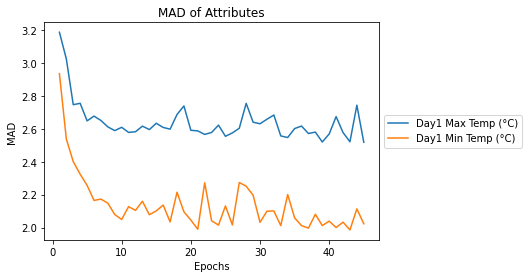

In [0]:
weather_ann = sur_ann()
if(use_cuda):
  weather_ann = weather_ann.cuda()
train(weather_ann, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.00201, num_epochs=45, master_path=master_path, ID='plsaaa')

Training Started...
Epoch 1: Train err: 6.5747186271798315, Train loss: 82.03164894940102 |Validation err: 3.9261339404789797, Validation loss: 24.8582501411438
Epoch 2: Train err: 3.649401096393702, Train loss: 21.713234169842444 |Validation err: 3.7962496405935573, Validation loss: 23.17486588160197
Epoch 3: Train err: 3.566950861290632, Train loss: 20.8278917286494 |Validation err: 3.7132171621568406, Validation loss: 22.60927152633667
Epoch 4: Train err: 3.5163700986247632, Train loss: 20.334374401667347 |Validation err: 3.6536834485832363, Validation loss: 22.183713912963867
Epoch 5: Train err: 3.478462800924631, Train loss: 20.011579356781425 |Validation err: 3.6259574041265497, Validation loss: 21.725242455800373
Epoch 6: Train err: 3.4676598657448765, Train loss: 19.787824473968925 |Validation err: 3.6218958439036815, Validation loss: 21.854010423024494
Epoch 7: Train err: 3.439455752415774, Train loss: 19.560763633414492 |Validation err: 3.6141702300500747, Validation loss: 21

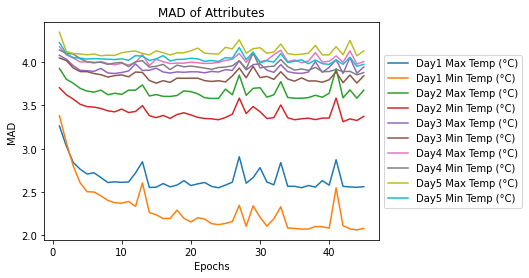

In [0]:
weather_ann = sur_ann()
if(use_cuda):
  weather_ann = weather_ann.cuda()
train(weather_ann, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.00101, num_epochs=45, master_path=master_path, ID='5 days ahead')

In [0]:
weather_ann = sur_ann()
if(use_cuda):
  weather_ann = weather_ann.cuda()train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=len(trainingSet), 
                                            num_workers=1, shuffle=True)
get_dev_accuracy(weather_ann,train_loader, nn.MSELoss())
weather_ann.load_state_dict(torch.load(master_path + "Saved states/" + get_model_name(weather_ann.name, 30, 0.00101, 44, ID= '5 days ahead')))

<All keys matched successfully>

In [0]:
train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=len(trainingSet), 
                                            num_workers=1, shuffle=True)
get_dev_accuracy(weather_ann,train_loader, nn.MSELoss())

(array([0.31135531, 0.1790293 , 0.48214286, 0.38095238, 0.5224359 ,
        0.44001832, 0.54624542, 0.4702381 , 0.54990842, 0.5018315 ]),
 0.4384157509157509,
 17.649272918701172)

In [0]:
val_loader = torch.utils.data.DataLoader(validationSet, batch_size=len(validationSet), 
                                            num_workers=1, shuffle=True)
get_dev_accuracy(weather_ann,val_loader, nn.MSELoss())

(array([0.34453782, 0.232493  , 0.47619048, 0.42577031, 0.54341737,
        0.54341737, 0.58543417, 0.51820728, 0.53781513, 0.53781513]),
 0.4745098039215686,
 20.50005340576172)

In [0]:
train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=len(trainingSet), 
                                            num_workers=1, shuffle=True)
get_dev_accuracy(weather_ann,train_loader, nn.MSELoss())

(array([0.11172161, 0.0503663 , 0.24358974, 0.1717033 , 0.28342491,
        0.21749084, 0.30494505, 0.23717949, 0.32005495, 0.2518315 ]),
 0.21923076923076923,
 17.649272918701172)

In [0]:
val_loader = torch.utils.data.DataLoader(validationSet, batch_size=len(validationSet), 
                                            num_workers=1, shuffle=True)
get_dev_accuracy(weather_ann,val_loader, nn.MSELoss())

(array([0.13445378, 0.08403361, 0.25770308, 0.21568627, 0.27731092,
        0.26890756, 0.29971989, 0.28851541, 0.29971989, 0.28571429]),
 0.2411764705882353,
 20.50005340576172)

In [0]:
test_loader = torch.utils.data.DataLoader(testingSet, batch_size=len(testingSet), 
                                            num_workers=1, shuffle=True)
get_accuracy(weather_ann,test_loader, nn.MSELoss())

(array([2.92904388, 2.06946632, 3.90171246, 3.17159031, 4.30404199,
        3.59099045, 4.52398782, 3.77203281, 4.60926493, 3.88630055]),
 3.675843150722957,
 22.00954246520996)

In [0]:
test_loader = torch.utils.data.DataLoader(testingSet, batch_size=len(testingSet), 
                                            num_workers=1, shuffle=True)
get_dev_accuracy(weather_ann,test_loader, nn.MSELoss())

(array([0.39215686, 0.22689076, 0.54901961, 0.42857143, 0.57422969,
        0.4929972 , 0.61344538, 0.5210084 , 0.61064426, 0.54061625]),
 0.49495798319327733,
 22.00954246520996)

In [0]:
test_loader = torch.utils.data.DataLoader(testingSet, batch_size=len(testingSet), 
                                            num_workers=1, shuffle=True)
get_dev_accuracy(weather_ann,test_loader, nn.MSELoss())

(array([0.19327731, 0.07563025, 0.31652661, 0.21288515, 0.34733894,
        0.2464986 , 0.38095238, 0.29131653, 0.40056022, 0.31932773]),
 0.2784313725490196,
 22.00954246520996)

In [0]:
model_path = master_path + "Checkpoints/" + get_model_name(weather_ann.name, 30, 0.00101, 44, ID= '5 days ahead')
for i, curSet in enumerate(train_seasonal_sets):
  val_loader = torch.utils.data.DataLoader(curSet, batch_size=len(curSet), num_workers=1, shuffle=False)
  errs ,err, loss =get_accuracy(weather_ann, val_loader, nn.MSELoss())
  np.savetxt("{p}_month{m}_val_errs.csv".format(p=model_path, m = i + 1), errs)
  np.savetxt("{p}_month{m}_val_meanerr.csv".format(p=model_path, m = i + 1), [err])
  np.savetxt("{p}_month{m}_val_mse.csv".format(p=model_path, m = i + 1), [loss])

In [0]:
weather_ann = sur_ann()
if(use_cuda):
  weather_ann = weather_ann.cuda()
weather_ann.load_state_dict(torch.load(master_path + "Saved states/" + get_model_name(weather_ann.name, 30, 0.00201, 33, ID= None)))

<All keys matched successfully>

In [0]:
train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=len(trainingSet), 
                                            num_workers=1, shuffle=True)
get_dev_accuracy(weather_ann,train_loader, nn.MSELoss())

(array([0.1023766 , 0.04387569]), 0.07312614259597806, 7.729622840881348)

In [0]:
val_loader = torch.utils.data.DataLoader(validationSet, batch_size=len(validationSet), 
                                            num_workers=1, shuffle=True)
get_dev_accuracy(weather_ann,val_loader, nn.MSELoss())

(array([0.11634349, 0.08033241]), 0.09833795013850416, 8.977066993713379)

In [0]:
train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=len(trainingSet), 
                                            num_workers=1, shuffle=True)
get_dev_accuracy(weather_ann,train_loader, nn.MSELoss())

(array([0.30804388, 0.1750457 ]), 0.24154478976234003, 7.729622840881348)

In [0]:
val_loader = torch.utils.data.DataLoader(validationSet, batch_size=len(validationSet), 
                                            num_workers=1, shuffle=True)
get_dev_accuracy(weather_ann,val_loader, nn.MSELoss())

(array([0.33795014, 0.20221607]), 0.27008310249307477, 8.977066993713379)

In [0]:
test_loader = torch.utils.data.DataLoader(testingSet, batch_size=len(testingSet), 
                                            num_workers=1, shuffle=True)
get_accuracy(weather_ann,test_loader, nn.MSELoss())

(array([2.85181174, 2.05484298]), 2.453327358322135, 10.300334930419922)

In [0]:
test_loader = torch.utils.data.DataLoader(testingSet, batch_size=len(testingSet), 
                                            num_workers=1, shuffle=True)
get_dev_accuracy(weather_ann,test_loader, nn.MSELoss())

(array([0.38781163, 0.23545706]), 0.31163434903047094, 10.300334930419922)

In [0]:
test_loader = torch.utils.data.DataLoader(testingSet, batch_size=len(testingSet), 
                                            num_workers=1, shuffle=True)
get_dev_accuracy(weather_ann,test_loader, nn.MSELoss())

(array([0.18559557, 0.06925208]), 0.12742382271468145, 10.300334930419922)

In [0]:
test_loader = torch.utils.data.DataLoader(testingSet, batch_size=len(testingSet), 
                                            num_workers=1, shuffle=True)
get_dev_accuracy(weather_ann,test_loader, nn.MSELoss())

In [0]:
model_path = master_path + "Checkpoints/" + get_model_name(weather_ann.name, 30, 0.00201, 33, ID= None)
for i, curSet in enumerate(train_seasonal_sets):
  val_loader = torch.utils.data.DataLoader(curSet, batch_size=len(curSet), num_workers=1, shuffle=False)
  errs ,err, loss =get_dev_accuracy(weather_ann, val_loader, nn.MSELoss())
  print(1 - err)

0.7424999999999999
0.7
0.7327586206896552
0.7155172413793103
0.7413793103448276
0.7327586206896552
0.8448275862068966
0.853448275862069
0.8074712643678161
0.764367816091954
0.735632183908046
0.7270114942528736


In [0]:
model_path = master_path + "Checkpoints/" + get_model_name(weather_ann.name, 30, 0.00201, 33, ID= None)
for i, curSet in enumerate(train_seasonal_sets):
  val_loader = torch.utils.data.DataLoader(curSet, batch_size=len(curSet), num_workers=1, shuffle=False)
  errs ,err, loss =get_accuracy(weather_ann, val_loader, nn.MSELoss())
  np.savetxt("{p}_month{m}_val_errs.csv".format(p=model_path, m = i + 1), errs)
  np.savetxt("{p}_month{m}_val_meanerr.csv".format(p=model_path, m = i + 1), [err])
  np.savetxt("{p}_month{m}_val_mse.csv".format(p=model_path, m = i + 1), [loss])

In [0]:
weather_ann = sur_ann()
if(use_cuda):
  weather_ann = weather_ann.cuda()
weather_ann.load_state_dict(torch.load(master_path + "Saved states/" + get_model_name(weather_ann.name, 30, 0.00201, 21, ID='Precip added')))

In [0]:
train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=len(trainingSet), 
                                            num_workers=1, shuffle=True)
get_dev_accuracy(weather_ann,train_loader, nn.MSELoss())

(array([0.30804388, 0.16864717]), 0.238345521023766, 7.4111480712890625)

In [0]:
val_loader = torch.utils.data.DataLoader(validationSet, batch_size=len(validationSet), 
                                            num_workers=1, shuffle=True)
get_dev_accuracy(weather_ann,val_loader, nn.MSELoss())

(array([0.37396122, 0.2132964 ]), 0.29362880886426596, 9.056640625)

#fcRNN

## Library 2

### File manager

In [0]:
import pandas as pd
# Prints how many nulls there are in max and min temp
def test_null_csv_daily(dir, station, start_year, end_year, out_name =  None):
    """
      Args:
          station (string): eg. "ON_6158355"
          start_year (int): Starting year
          end_year (int)  : Ending year
          start_date (int): start_date = 0 is day 1 of starting year (Where we want the sampling to start)
          out_name (optional string) : change the name of the output file
    """
    if out_name == None:
      out_name = station + '_' + str(start_year) + '-' + str(end_year)
    master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' + dir
    src_path = master_path + 'datasets/'
    newdf = pd.read_csv(src_path + out_name + ".csv")
    print("Max temp nulls: " + str(newdf['Max Temp (°C)'].isnull().sum()))
    print("Min temp nulls: " + str(newdf['Min Temp (°C)'].isnull().sum()))
    print("Total Precip (mm) nulls: " + str(newdf['Total Precip (mm)'].isnull().sum()))
    #print("Tot precip nans: " + str(pd.isna(newdf['Total Precip (mm)']).sum()))
    

In [0]:
import pandas as pd
# Interpolates null values in min and max temp cols
def inter_nulls_csv_daily(dir, station, start_year, end_year, out_name =  None):
    """
      Args:
          station (string): eg. "ON_6158355"
          start_year (int): Starting year
          end_year (int)  : Ending year
          start_date (int): start_date = 0 is day 1 of starting year (Where we want the sampling to start)
          out_name (optional string) : change the name of the output file
    """
    if out_name == None:
      out_name = station + '_' + str(start_year) + '-' + str(end_year)
    master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' + dir
    src_path = master_path + 'datasets/'
    newdf = pd.read_csv(src_path + out_name + ".csv")
    newdf['Max Temp (°C)'] = newdf['Max Temp (°C)'].interpolate()
    newdf['Min Temp (°C)']= newdf['Min Temp (°C)'].interpolate()
    newdf['Total Precip (mm)']= newdf['Total Precip (mm)'].interpolate()
    
    newdf.to_csv( src_path +  out_name + ".csv")

In [0]:
#Raw csv downloaded must be place in /raw folder
#Merged csv will be stored at /datasets folder
# Also interpolates the null max and min temp
def make_csv_daily(dir, station, start_year, end_year, out_name =  None):
  """
    Args:
        station (string): eg. "ON_6158355"
        start_year (int): Starting year
        end_year (int)  : Ending year
        start_date (int): start_date = 0 is day 1 of starting year (Where we want the sampling to start)
        out_name (optional string) : change the name of the output file
    """
  if out_name == None:
    out_name = station + '_' + str(start_year) + '-' + str(end_year)
  master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' + dir
  src_path = master_path
  dest_path = master_path + 'datasets/'
  fout = open(dest_path + out_name + ".csv","w+")
  in_base = "en_climate_daily_" + station + '_' #eg: 'en_climate_daily_ON_6158355_'
  in_end = '_P1D.csv'
  # first file:
  for line in open(src_path + in_base + str(start_year) + in_end):
      fout.write(line)
  # now the rest:    
  for num in range(start_year + 1, end_year + 1):
      f = open(src_path + in_base + str(num) + in_end)
      f.__next__() # skip the header
      for line in f:
          fout.write(line)
      f.close() # not really needed
  fout.close()
  inter_nulls_csv_daily(dir, station, start_year, end_year, out_name)

In [0]:
def getDayAttrLabels(days_ahead, set_label_attributes):
  dayAttrLabels ={}
  i=0
  for day in range(1,days_ahead+1):
     for attr in set_label_attributes:
       dayAttrLabels[i] = 'Day{} {}'.format(day,attr)
       i+=1
  return dayAttrLabels
      

### Set creators

In [0]:
###Hyper parameters of data sets

####### Set #######
set_start_day = 0
set_num_days = 3
set_days_ahead = 1 #predict 5 days ahead
set_data_attributes = ['Max Temp (°C)', 'Min Temp (°C)']#,'Total Precip (mm)']
set_label_attributes = ['Max Temp (°C)', 'Min Temp (°C)']
#set_attributes = ['Max Temp (°C)', 'Min Temp (°C)']

stationSrc = "ON_6158355"
dirSrc =  "data/Target A/target/"
dirSurr = "data/Target A/surr/"
stationSurr = ["ON_615S001", "ON_6158751", "ON_615HMAK"]

start_season_day = 50
num_seasons = 4

####### Training Set #######
start_year_train = 2008
end_year_train = 2013 
# Must be the same as training because of season syncing
start_date_train = set_start_day 
end_date_train = None

####### Validation Set #######
start_year_val = 2014
end_year_val = 2014
# Must be the same as training because of season syncing
start_date_val = set_start_day 
end_date_val = None

####### Testing Set #######
start_year_test = 2007
end_year_test = 2007
# Must be the same as training because of season syncing
start_date_test = set_start_day 
end_date_test = None

####### Global variables #######
set_num_stations = 1 + len(stationSurr)
glob_dayAttr_labels = getDayAttrLabels(set_days_ahead, set_label_attributes) #make labels for day-attribute combinations
#glob_inp_size = set_num_stations * len(set_data_attributes)
RNN_percell_days = 1
glob_inp_size = set_num_stations * len(set_data_attributes)*RNN_percell_days
glob_out_size = len(set_label_attributes)*set_days_ahead
master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/'

In [0]:
import pandas as pd
import numpy as np
import math
from torch.utils.data import Dataset, DataLoader
class WeatherSurroundingDataset(Dataset):
    """Weather dataset."""

    def __init__(self, dirSrc, dirSurr, stationSrc, stationSurr, start_year, end_year, days_ahead =1, start_date = 0, end_date = None, num_days = 7, data_attributes = ['Max Temp (°C)', 'Min Temp (°C)'], label_attributes = ['Max Temp (°C)', 'Min Temp (°C)'], make_csv = False, out_name = None):
        """
        Args:
            dirSrc (string) =  "data/Target A/target/" relative directory of target station
            dirSurr (string) = "data/Target A/surr/" relative directory of surrounding stations
            stationSrc (string): eg. "ON_6158355"
            stationSurr (list of strings)
            start_year (int): Starting year
            end_year (int)  : Ending year
            days_ahead (int): number of days to be predicted
            start_date (int): start_date = 0 is day 1 of starting year (Where we want the sampling to start)
            end_date (optional int) : end_date = 7 is day 8 of starting year(min = 7 because of LABEL!). If provided changes the end date from last day of last year.
            num_days (optional int) : num_days is the interval of days before the label.
            make_csv (optional bool): If true it will call make_csv_daily function to create the csv from /raw datasets into /datasets
            out_name (optional string) : change the name of the output file which it reads from
        """
        self.data_attributes = data_attributes
        self.label_attributes = label_attributes
        self.days_ahead = days_ahead 
        self.num_days = num_days
        if(out_name == None):
          self.out_name = stationSrc + '_' + str(start_year) + '-' + str(end_year)
        else:
          self.out_name = out_name
        master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' +  dirSrc
        dest_path = master_path + 'datasets/'
        if (make_csv):
          make_csv_daily(dirSrc, stationSrc, start_year, end_year, out_name = out_name)

        self.src_csv = pd.read_csv(dest_path + self.out_name +'.csv')

        self.sur_csvs = []

        master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' +  dirSurr
        dest_path = master_path + 'datasets/'
        for station_surr in stationSurr:
          file_name = station_surr + '_' + str(start_year) + '-' + str(end_year)
          if (make_csv):
            make_csv_daily(dirSurr, station_surr, start_year, end_year, out_name = file_name)
          print(dest_path + file_name +'.csv')
          self.sur_csvs.append(pd.read_csv(dest_path + file_name +'.csv'))

        self.start_date = start_date
        if( end_date == None):
          self.end_date = len(self.src_csv) - 1
        else:
          self.end_date = end_date

        # Just making sure files are of the same size
        for i, cur_sur_csv in enumerate(self.sur_csvs):
          if(len(self.src_csv) != len(cur_sur_csv)):
            if(len(self.src_csv) > len(cur_sur_csv)):
              assert(0) # Surrounding stations don't have sufficient days to fill the dataset
            print("Caution: Traget station has {trg_days} days while surr station idx {idx} has {sur_days} days".format(len(self.src_csv), i, len(cur_sur_csv)))

    def __len__(self):
        return self.end_date - self.start_date +1 - self.num_days - self.days_ahead if self.end_date - self.start_date +1 - self.num_days - self.days_ahead >= 0 else 0

    def __getitem__(self, idx):
        data = self.src_csv.loc[ idx + self.start_date : idx + self.start_date + self.num_days - 1 , self.data_attributes ]
        
        for cur_csv in self.sur_csvs:
          new_data = cur_csv.loc[ idx + self.start_date : idx + self.start_date + self.num_days - 1 , self.data_attributes ]
          data = np.concatenate([data, new_data], axis= 1)

        start_days_ahead =  idx + self.start_date + self.num_days
        end_days_ahead = start_days_ahead + self.days_ahead - 1  
        
        #label = self.src_csv.loc[ idx + self.start_date + self.num_days, ['Max Temp (°C)', 'Min Temp (°C)'] ]
        
        label = self.src_csv.loc[start_days_ahead:end_days_ahead, self.label_attributes ] 
        label = np.asarray(label)
        for i in range(int(self.num_days / RNN_percell_days) - 1):
            i += 1 # Sorry for this nasty code
            new_label = self.src_csv.loc[idx + self.start_date + RNN_percell_days * i, self.label_attributes ]
            new_label = np.asarray(new_label)
            label = np.concatenate([label, new_label], axis= None)

        label = np.asarray(label).flatten()
        label = label.astype('float')

        data = data.flatten()

        #print('Data: {}'.format(data))
        #print('Data shape: {}'.format(data.shape))
        #print('Labels shape: {}'.format(label.shape))
        #print('Labels: {}'.format(label[:2]))
        sample = [data, label]

        return sample

    def giveSeasonalSets(self, start_season_day = 0, num_seasons = 4):
        """num_seasons > 1 or meaningless and unknown behaviour"""
        seasonalSets = [None] * num_seasons

        #seasonIntervals = math.ceil(365.25 / num_seasons)
        seasonIntervals = math.floor((self.end_date - self.start_date) / (math.floor((self.end_date - self.start_date + 1) / 365) * num_seasons))

        if(start_season_day > seasonIntervals):
          start_season_day = start_season_day % seasonIntervals
          print("Truncated start_season_day to {}. Accepts values between 0 ~ {}".format(start_season_day, seasonIntervals-1))
        if(start_season_day > 0):
          seasonalSets[-1] = SeasonalDataset(self, 0, start_season_day - 1)
        curLastDay = seasonIntervals + start_season_day - 1
        seasonalSets[0] = SeasonalDataset(self, start_season_day - self.num_days, curLastDay) # start date can include days from previous season to predict current season days

        curStartDay = curLastDay + 1 
        curLastDay = seasonIntervals + curStartDay - 1
        i = 1
        while(curLastDay < self.end_date): # Do not add the last interval
          #print("giveSeasonalSets: " + str(i) + " " + str(curStartDay) + " " + str(curLastDay))
          if(seasonalSets[i] == None ):
            seasonalSets[i] = SeasonalDataset(self, curStartDay - self.num_days, curLastDay)
          else:
            seasonalSets[i] = seasonalSets[i] + SeasonalDataset(self, curStartDay - self.num_days, curLastDay)
          curStartDay = curLastDay + 1
          curLastDay = seasonIntervals + curStartDay - 1
          i += 1
          i %= num_seasons

        # Now add the last set
        curLastDay = self.end_date
        if(seasonalSets[i] == None ):
            seasonalSets[i] = SeasonalDataset(self, curStartDay - self.num_days, curLastDay)
        else:
            seasonalSets[i] = seasonalSets[i] + SeasonalDataset(self, curStartDay - self.num_days, curLastDay)

        return seasonalSets


class SeasonalDataset(WeatherSurroundingDataset):
    """Seasonal dataset. Inherited from WSDataset. Only used in helper function -giveSeasonalSets-"""

    def __init__(self, weathersurroundingDataset, start_date, end_date):
        """
        Args:
            weathersurroundingDataset: Must previously loaded all the years and stations in a WeatherSurroundingDataset
        """
        self.data_attributes = weathersurroundingDataset.data_attributes
        self.label_attributes = weathersurroundingDataset.label_attributes
        self.days_ahead = weathersurroundingDataset.days_ahead
        self.num_days = weathersurroundingDataset.num_days
        self.out_name = weathersurroundingDataset.out_name
        self.src_csv = weathersurroundingDataset.src_csv
        self.sur_csvs = weathersurroundingDataset.sur_csvs
        self.start_date = start_date if start_date >= 0 else 0
        self.end_date = end_date

In [0]:
# start_year_train = 2008
# end_year_train = 2013 #changed from 2019 because in our proposal we said 07-16 is train
# start_date_train = 0
# end_date_train = None
# num_days_train = set_num_days
# stationSrc = "ON_6158355"
# dirSrc =  "data/Target A/target/"
# dirSurr = "data/Target A/surr/"
trainingSet = WeatherSurroundingDataset(dirSrc, dirSurr, stationSrc, stationSurr, start_year_train, end_year_train, set_days_ahead, start_date_train, end_date_train, num_days=set_num_days, data_attributes = set_data_attributes, label_attributes = set_label_attributes, make_csv = False)

FileNotFoundError: ignored

In [0]:
train_seasonal_sets = trainingSet.giveSeasonalSets(start_season_day= start_season_day, num_seasons= num_seasons)

In [0]:
# start_year_val = 2014
# end_year_val = 2014
# start_date_val = 0
# end_date_val = None
# num_days_val = set_num_days
# station stays the same
validationSet = WeatherSurroundingDataset(dirSrc, dirSurr, stationSrc, stationSurr, start_year_val, end_year_val, set_days_ahead, start_date_train, end_date_train, num_days=set_num_days, data_attributes = set_data_attributes, label_attributes = set_label_attributes, make_csv = False)

In [0]:
val_seasonal_sets = validationSet.giveSeasonalSets(start_season_day= start_season_day, num_seasons= num_seasons)

In [0]:
#
#
#
#
testingSet = WeatherSurroundingDataset(dirSrc, dirSurr, stationSrc, stationSurr, start_year_test, end_year_test, set_days_ahead, start_date_train, end_date_train, num_days=set_num_days, data_attributes = set_data_attributes, label_attributes = set_label_attributes, make_csv = False)

In [0]:
test_seasonal_sets = testingSet.giveSeasonalSets(start_season_day= start_season_day, num_seasons= num_seasons)

## MODEL

In [0]:
import os 
from torch.utils.data.sampler import SubsetRandomSampler 
from torchvision import datasets, models, transforms 
import torch.optim as optim
import numpy as np 
import matplotlib.pyplot as plt
import time 
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim 
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms 

### Helper functions

In [0]:
use_cuda = True

In [0]:
def get_model_name(name, batch_size, learning_rate, epoch, ID = None):
    if(ID == None):
      path = "{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                              batch_size,
                                              learning_rate,
                                              epoch)
    else:
      path = "{0}_bs{1}_lr{2}_epoch{3}_{4}".format(name,
                                              batch_size,
                                              learning_rate,
                                              epoch,
                                              ID)
    return path

In [0]:
def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

In [0]:
def plot_dayAttr_curve(path, att_list):
    """ Plots given attributes for all days_ahead

    Args:
        path: The base path of the csv files produced during training
        att_list: names of attributes you want to compare
    """
    import matplotlib.pyplot as plt
    
    plt.title("Attribute Error vs Days Ahead")
    n = set_days_ahead
    import matplotlib.pyplot as plt

    for i in range(len(att_list)): #for each attribute
      att_err=[]
      att=att_list[i]
      for day in range(1, n+1): #for each day
        temp_err = np.loadtxt("{p}_val_err_Day{d}_{att}.csv".format(p=path, d=day, att=att))
        att_err.append(temp_err)
      plt.plot(range(1,n+1), att_err, label=att)

    plt.xlabel("Days Ahead")
    plt.ylabel("MAD")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [0]:
#tester
#master_path = "/content/gdrive/My Drive/APS360 Team/milestone 3/"
#p = master_path + "Checkpoints/weatherSurrRNN_bs30_lr0.01_epoch1"
#plot_dayAttr_curve(p,set_label_attributes)


In [0]:
def savePrintDayAtrib(model_path, m_day_err, printbool =True):
  '''save into csv or print day-attribute combos
  '''
  #print(m_day_err)
  num_epochs =[]
  for i in range(len(m_day_err)): #for each attribute
  
    transp =[]
    for epoch in range(len(m_day_err[0])):
      transp.append(m_day_err[i][epoch])
      if i==0:
        num_epochs.append(epoch + 1)
    #for th last epoch, save values
    day=glob_dayAttr_labels[i].split(maxsplit=1)[0]
    att_name = glob_dayAttr_labels[i].split(maxsplit=1)[1]
    np.savetxt("{p}_val_err_{x}_{attribute}.csv".format(p=model_path, x = day, attribute = att_name), m_day_err[i])
    
    if(printbool):
      #label2 = 'Attribute {}'.format(i)
      label2 = '{}'.format(glob_dayAttr_labels[i])
      plt.plot(num_epochs,transp, label = label2)
      plt.xlabel('Epochs')
      plt.ylabel('MAD')
      plt.title('MAD of Attributes')
      plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

      #plt.legend()




### Architecture

In [0]:
class fullyConnectedRNN(nn.Module):
    """ Input is no longer default value
        To be able to change hyperparameters easily please manually input the values everytime """
    """ Copy Paste:"""                """VV any number VV"""
    #fullyConnectedRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size + len(set_label_attributes) * int(set_num_days / RNN_percell_days - 1), num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
    def __init__(self, hidden_size, input_size, output_size, num_RNNS, n_layers = 1): #,dropout=DROPOUT
        super(fullyConnectedRNN, self).__init__()
        self.name = "fullyConnectedRNN"
        self.hidden_size = hidden_size
        self.num_RNNS = num_RNNS
        self.n_layers = n_layers
        self.rnn = nn.RNN(input_size, hidden_size, n_layers, batch_first=True) # there is RNN, GRU, LSTM
        self.fc1 = nn.Linear(hidden_size * num_RNNS, hidden_size * 2)
        self.fc2 = nn.Linear(hidden_size * 2,  int(hidden_size * 0.75))
        self.fc3 = nn.Linear(int(hidden_size * 0.75),  output_size)

    def forward(self, inp,  hidden = None):
        if(hidden == None):
          h0 = torch.zeros(self.n_layers, inp.size(0), self.hidden_size)
          if(use_cuda):
            h0 = h0.cuda()
          out, h_last = self.rnn(inp, h0)
        else:
          out, h_last = self.rnn(inp, hidden)
        out = out.reshape(out.shape[0], out.shape[1] * out.shape[2])
        out = self.fc1(out)
        out = F.leaky_relu(out) 
        out = self.fc2(out)
        out = F.leaky_relu(out)
        out = self.fc3(out)
        return out, h_last

In [0]:
class fullyConnectedRNN2(nn.Module):
    """ Input is no longer default value
        To be able to change hyperparameters easily please manually input the values everytime """
    """ Copy Paste:"""                """VV any number VV"""
    #fullyConnectedRNN2(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size + len(set_label_attributes) * int(set_num_days / RNN_percell_days - 1), num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
    def __init__(self, hidden_size, input_size, output_size, num_RNNS, n_layers = 1): #,dropout=DROPOUT
        super(fullyConnectedRNN2, self).__init__()
        self.name = "fullyConnectedRNN2"
        self.hidden_size = hidden_size
        self.num_RNNS = num_RNNS
        self.n_layers = n_layers
        self.rnn = nn.RNN(input_size, hidden_size, n_layers, batch_first=True) # there is RNN, GRU, LSTM
        self.fc1 = nn.Linear(hidden_size, 50) #input tensor size 14
        self.fc2 = nn.Linear(50, glob_out_size) #output tensor size 2

    def forward(self, inp,  hidden = None):
        if(hidden == None):
          h0 = torch.zeros(self.n_layers, inp.size(0), self.hidden_size)
          if(use_cuda):
            h0 = h0.cuda()
          out, h_last = self.rnn(inp, h0)
        else:
          out, h_last = self.rnn(inp, hidden)
        #out = out.reshape(out.shape[0], out.shape[1] * out.shape[2])
        out = self.fc1(out[:, -1, :])
        out = F.leaky_relu(out) 
        out = self.fc2(out)
        return out, h_last

### Training

In [0]:
#this can do multiple attributes and multiple days, and keeps error for each day_attribute total absolute deviation
def compute_error(outputs, labels):
  '''
day_attrib_err = List of total aboslerror calculated for each label in order

ex: 
[min1, max1, min2, max2] => [err(min1), err(max1), err(min2), err(max2)]

ex output:
[11, 1, 2, 3]
Interpretation: Day 1 minimum temperature has total error of 11... Day2 max temp has total error of 1

  '''
  #day_attrib_err = {}
  day_attrib_err = np.zeros(len(labels[0]))
  err =0.0
  number_items =0
  for i in range(len(labels[0])): #for each day_attribute combo
    day_attrib_err[i] = 0
    for j, out in enumerate(outputs, 0): #for all outputs (Throughout the batch)
      day_attrib_err[i] = day_attrib_err[i] + abs(labels[j][i] - out[i])
      err += abs(labels[j][i] - out[i])
      
  number_items = len(labels[0])*len(outputs) #total number of comparisons 
  return day_attrib_err, err, number_items
    


In [0]:
#this can do multiple attributes and multiple days, and keeps error for each day_attribute total absolute deviation
def compute_dev_error(outputs, labels):
  '''
day_attrib_err = List of total aboslerror calculated for each label in order

ex: 
[min1, max1, min2, max2] => [err(min1), err(max1), err(min2), err(max2)]

ex output:
[11, 1, 2, 3]
Interpretation: Day 1 minimum temperature has total error of 11... Day2 max temp has total error of 1

  '''
  #day_attrib_err = {}
  day_attrib_err = np.zeros(len(labels[0]))
  err =0.0
  number_items =0
  for i in range(len(labels[0])): #for each day_attribute combo
    day_attrib_err[i] = 0.0
    for j, out in enumerate(outputs, 0): #for all outputs (Throughout the batch)
      day_attrib_err[i] += (abs(labels[j][i] - out[i]) > 3)
      err += (abs(labels[j][i] - out[i]) > 3)
      
  number_items = len(labels[0])*len(outputs) #total number of comparisons 
  return day_attrib_err, err, number_items

In [0]:
def get_accuracy_FULLYCONNECTEDRNN(net, loader, criterion):

    total_loss = 0.0
    total_err = 0.0
    number_items = 0

    for i, data in enumerate(loader, 0):
      inputs, labels = data
      inputs = inputs.view(inputs.shape[0], int(inputs.shape[1]/glob_inp_size), glob_inp_size)
      #############################################
      #To Enable GPU Usage
      if use_cuda and torch.cuda.is_available():
        inputs = inputs.cuda()
        labels = labels.cuda()
      #############################################
      outputs, _ = net(inputs.float())
      loss = criterion(outputs, labels.float()) 
      total_loss += loss.item()
      
      #cur_err, cur_num = compute_error(outputs, labels)
      cur_days_ahead_err, cur_err, cur_num = compute_error(outputs, labels)
      
      if i==0: #need to intialize
        tot_days_ahead_err=cur_days_ahead_err
      else:
        tot_days_ahead_err += cur_days_ahead_err
      total_err += cur_err
      number_items += cur_num
      
    mean_days_ahead_err = tot_days_ahead_err / number_items * glob_out_size
    #print('get acc: mean_days_ahead_err: ', mean_days_ahead_err)
    err = float(total_err) / number_items
    loss = float(total_loss) / (i + 1)
    return mean_days_ahead_err, err, loss
    #return err, loss

In [0]:
def get_final_accuracy_FULLYCONNECTEDRNN(net, loader, criterion):

    total_loss = 0.0
    total_err = 0.0
    number_items = 0

    for i, data in enumerate(loader, 0):
      inputs, labels = data
      inputs = inputs.view(inputs.shape[0], int(inputs.shape[1]/glob_inp_size), glob_inp_size)
      #############################################
      #To Enable GPU Usage
      if use_cuda and torch.cuda.is_available():
        inputs = inputs.cuda()
        labels = labels.cuda()
      #############################################
      outputs, _ = net(inputs.float())
      loss = criterion(outputs[:, :glob_out_size], labels[:, :glob_out_size].float()) 
      total_loss += loss.item()
      
      #cur_err, cur_num = compute_error(outputs, labels)
      cur_days_ahead_err, cur_err, cur_num = compute_error(outputs[:, :glob_out_size], labels[:, :glob_out_size])
      
      if i==0: #need to intialize
        tot_days_ahead_err=cur_days_ahead_err
      else:
        tot_days_ahead_err += cur_days_ahead_err
      total_err += cur_err
      number_items += cur_num
      
    mean_days_ahead_err = tot_days_ahead_err / number_items * glob_out_size
    #print('get acc: mean_days_ahead_err: ', mean_days_ahead_err)
    err = float(total_err) / number_items
    loss = float(total_loss) / (i + 1)
    return mean_days_ahead_err, err, loss
    #return err, loss

In [0]:
def get_final_accuracy_dev_FULLYCONNECTEDRNN(net, loader, criterion):

    total_loss = 0.0
    total_err = 0.0
    number_items = 0

    for i, data in enumerate(loader, 0):
      inputs, labels = data
      inputs = inputs.view(inputs.shape[0], int(inputs.shape[1]/glob_inp_size), glob_inp_size)
      #############################################
      #To Enable GPU Usage
      if use_cuda and torch.cuda.is_available():
        inputs = inputs.cuda()
        labels = labels.cuda()
      #############################################
      outputs, _ = net(inputs.float())
      loss = criterion(outputs[:, :glob_out_size], labels[:, :glob_out_size].float()) 
      total_loss += loss.item()
      
      #cur_err, cur_num = compute_error(outputs, labels)
      cur_days_ahead_err, cur_err, cur_num = compute_dev_error(outputs[:, :glob_out_size], labels[:, :glob_out_size])
      
      if i==0: #need to intialize
        tot_days_ahead_err=cur_days_ahead_err
      else:
        tot_days_ahead_err += cur_days_ahead_err
      total_err += cur_err
      number_items += cur_num
      
    mean_days_ahead_err = tot_days_ahead_err / number_items * glob_out_size
    #print('get acc: mean_days_ahead_err: ', mean_days_ahead_err)
    err = float(total_err) / number_items
    loss = float(total_loss) / (i + 1)
    return mean_days_ahead_err, err, loss
    #return err, loss

In [0]:
def trainFULLYCONNECTEDRNN(net, trainingSet, validationSet, batch_size, num_epochs, learning_rate, master_path, ID = None, do_save = True):
    torch.manual_seed(777)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)

    train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=batch_size, 
                                            num_workers=1, shuffle=False)
    val_loader = torch.utils.data.DataLoader(validationSet, batch_size=batch_size, 
                                            num_workers=1, shuffle=False)

    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    mean_day_attr_err = np.zeros([len(trainingSet[0][1]), num_epochs])
    #mean_day_attr_err = {}
    ########################################################################
    start_time = time.time()
    print ("Training Started...")
    h_last = torch.zeros(net.n_layers, batch_size, net.hidden_size)
    for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_train_err = 0.0
        number_items = 0
        for i, data in enumerate(train_loader, 0): # Itterate through each batch
            #print("Training", i, "out of", len(train_loader))
            inputs, labels = data
            if(inputs.shape[0] != batch_size):
              continue
            inputs = inputs.view(inputs.shape[0], int(inputs.shape[1]/glob_inp_size), glob_inp_size)
            
            
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              inputs = inputs.cuda()
              labels = labels.cuda()
              h_last = h_last.cuda()
            #############################################
            
              
            outputs, h_last = net(inputs.float(), h_last)             # forward pass
            loss = criterion(outputs, labels.float()) # compute the total loss
            loss.backward(retain_graph=True)                           # backward pass (compute parameter updates)
            optimizer.step()                          # make the updates for each parameter
            optimizer.zero_grad()                     # a clean up step for PyTorch

            # Calculate the statistics
            total_train_loss += loss.item()
            day_attr_dict, cur_err, cur_num = compute_error(outputs, labels) 
            total_train_err += cur_err
            number_items += cur_num
             
          
        train_err[epoch] = float(total_train_err) / number_items
        train_loss[epoch] = float(total_train_loss) / (i+1)

        mean_day_attr_err[:, epoch] ,val_err[epoch], val_loss[epoch] = get_accuracy_FULLYCONNECTEDRNN(net, val_loader, criterion) 
        #mean_day_attr_err[:, epoch] = [ [mean errors for epoch 0 for attribute 1, mean errors for epoch1 for attribute 1,...] [mean erros for attribute 2 for epoch 0, ..] ]

        
        # Save the state of model at current epoch
        if(do_save):
          torch.save(net.state_dict(), master_path + "Saved states/" + get_model_name(net.name, batch_size, learning_rate, epoch + 1, ID))
        
        print(("Epoch {}: Train err: {}, Train loss: {} |"
              + "Validation err: {}, Validation loss: {}"
                ).format(
                    epoch + 1,
                    train_err[epoch],
                    train_loss[epoch],
                    val_err[epoch],
                    val_loss[epoch]))
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    # Write the train/test loss/err into CSV file for plotting later
    model_path = master_path + "Checkpoints/" + get_model_name(net.name, batch_size, learning_rate, epoch + 1, ID)
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)
    savePrintDayAtrib(model_path, mean_day_attr_err[:glob_out_size, :], printbool=True) #print and save attributes
    

In [0]:
def trainFULLYCONNECTEDRNN_Last(net, trainingSet, validationSet, batch_size, num_epochs, learning_rate, master_path, ID = None, do_save = True):
    torch.manual_seed(777)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)

    train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=batch_size, 
                                            num_workers=1, shuffle=False)
    val_loader = torch.utils.data.DataLoader(validationSet, batch_size=batch_size, 
                                            num_workers=1, shuffle=False)

    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    mean_day_attr_err = np.zeros([glob_out_size, num_epochs])
    #mean_day_attr_err = {}
    ########################################################################
    start_time = time.time()
    print ("Training Started...")
    h_last = torch.zeros(net.n_layers, batch_size, net.hidden_size)
    for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_train_err = 0.0
        number_items = 0
        for i, data in enumerate(train_loader, 0): # Itterate through each batch
            #print("Training", i, "out of", len(train_loader))
            inputs, labels = data
            if(inputs.shape[0] != batch_size):
              continue
            inputs = inputs.view(inputs.shape[0], int(inputs.shape[1]/glob_inp_size), glob_inp_size)
            
            
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              inputs = inputs.cuda()
              labels = labels.cuda()
              h_last = h_last.cuda()
            #############################################
            
              
            outputs, h_last = net(inputs.float(), h_last)             # forward pass
            loss = criterion(outputs[:, :glob_out_size], labels[:, :glob_out_size].float()) # compute the total loss
            loss.backward(retain_graph=True)                           # backward pass (compute parameter updates)
            optimizer.step()                          # make the updates for each parameter
            optimizer.zero_grad()                     # a clean up step for PyTorch

            # Calculate the statistics
            total_train_loss += loss.item()
            day_attr_dict, cur_err, cur_num = compute_error(outputs[:, :glob_out_size], labels[:, :glob_out_size]) 
            total_train_err += cur_err
            number_items += cur_num
             
          
        train_err[epoch] = float(total_train_err) / number_items
        train_loss[epoch] = float(total_train_loss) / (i+1)

        mean_day_attr_err[:, epoch] ,val_err[epoch], val_loss[epoch] = get_final_accuracy_FULLYCONNECTEDRNN(net, val_loader, criterion) 
        #mean_day_attr_err[:, epoch] = [ [mean errors for epoch 0 for attribute 1, mean errors for epoch1 for attribute 1,...] [mean erros for attribute 2 for epoch 0, ..] ]

        
        # Save the state of model at current epoch
        if(do_save):
          torch.save(net.state_dict(), master_path + "Saved states/" + get_model_name(net.name, batch_size, learning_rate, epoch + 1, ID))
        
        print(("Epoch {}: Train err: {}, Train loss: {} |"
              + "Validation err: {}, Validation loss: {}"
                ).format(
                    epoch + 1,
                    train_err[epoch],
                    train_loss[epoch],
                    val_err[epoch],
                    val_loss[epoch]))
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    # Write the train/test loss/err into CSV file for plotting later
    model_path = master_path + "Checkpoints/" + get_model_name(net.name, batch_size, learning_rate, epoch + 1, ID)
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)
    savePrintDayAtrib(model_path, mean_day_attr_err[:glob_out_size, :], printbool=True) #print and save attributes

In [0]:
def trainFULLYCONNECTEDRNN_Last2(net, trainingSet, validationSet, batch_size, num_epochs, learning_rate, master_path, ID = None, do_save = True):
    torch.manual_seed(777)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)

    train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=batch_size, 
                                            num_workers=1, shuffle=False)
    val_loader = torch.utils.data.DataLoader(validationSet, batch_size=batch_size, 
                                            num_workers=1, shuffle=False)

    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    mean_day_attr_err = np.zeros([glob_out_size, num_epochs])
    #mean_day_attr_err = {}
    ########################################################################
    start_time = time.time()
    print ("Training Started...")
    h_last = torch.zeros(net.n_layers, batch_size, net.hidden_size)
    for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_train_err = 0.0
        number_items = 0
        for i, data in enumerate(train_loader, 0): # Itterate through each batch
            #print("Training", i, "out of", len(train_loader))
            inputs, labels = data
            if(inputs.shape[0] != batch_size):
              continue
            inputs = inputs.view(inputs.shape[0], int(inputs.shape[1]/glob_inp_size), glob_inp_size)
            
            
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              inputs = inputs.cuda()
              labels = labels.cuda()
              h_last = h_last.cuda()
            #############################################
            
              
            outputs, h_last = net(inputs.float(), h_last)             # forward pass
            if(i % 5 == 0):
              loss = criterion(outputs, labels.float())
            else:
              loss = criterion(outputs[:, :glob_out_size], labels[:, :glob_out_size].float()) # compute the total loss
            loss.backward(retain_graph=True)                           # backward pass (compute parameter updates)
            optimizer.step()                          # make the updates for each parameter
            optimizer.zero_grad()                     # a clean up step for PyTorch

            # Calculate the statistics
            total_train_loss += loss.item()
            day_attr_dict, cur_err, cur_num = compute_error(outputs[:, :glob_out_size], labels[:, :glob_out_size]) 
            total_train_err += cur_err
            number_items += cur_num
             
          
        train_err[epoch] = float(total_train_err) / number_items
        train_loss[epoch] = float(total_train_loss) / (i+1)

        mean_day_attr_err[:, epoch] ,val_err[epoch], val_loss[epoch] = get_final_accuracy_FULLYCONNECTEDRNN(net, val_loader, criterion) 
        #mean_day_attr_err[:, epoch] = [ [mean errors for epoch 0 for attribute 1, mean errors for epoch1 for attribute 1,...] [mean erros for attribute 2 for epoch 0, ..] ]

        
        # Save the state of model at current epoch
        if(do_save):
          torch.save(net.state_dict(), master_path + "Saved states/" + get_model_name(net.name, batch_size, learning_rate, epoch + 1, ID))
        
        print(("Epoch {}: Train err: {}, Train loss: {} |"
              + "Validation err: {}, Validation loss: {}"
                ).format(
                    epoch + 1,
                    train_err[epoch],
                    train_loss[epoch],
                    val_err[epoch],
                    val_loss[epoch]))
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    # Write the train/test loss/err into CSV file for plotting later
    model_path = master_path + "Checkpoints/" + get_model_name(net.name, batch_size, learning_rate, epoch + 1, ID)
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)
    savePrintDayAtrib(model_path, mean_day_attr_err[:glob_out_size, :], printbool=True) #print and save attributes

In [0]:
def trainFULLYCONNECTEDRNN_Last3(net, trainingSet, validationSet, batch_size, num_epochs, learning_rate, master_path, ID = None, do_save = True):
    torch.manual_seed(777)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)

    train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=batch_size, 
                                            num_workers=1, shuffle=True)
    val_loader = torch.utils.data.DataLoader(validationSet, batch_size=batch_size, 
                                            num_workers=1, shuffle=True)

    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    mean_day_attr_err = np.zeros([glob_out_size, num_epochs])
    #mean_day_attr_err = {}
    ########################################################################
    start_time = time.time()
    print ("Training Started...")
    for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_train_err = 0.0
        number_items = 0
        for i, data in enumerate(train_loader, 0): # Itterate through each batch
            #print("Training", i, "out of", len(train_loader))
            inputs, labels = data
            inputs = inputs.view(inputs.shape[0], int(inputs.shape[1]/glob_inp_size), glob_inp_size)
            
            
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              inputs = inputs.cuda()
              labels = labels.cuda()
            #############################################
            
              
            outputs, _ = net(inputs.float(), None)             # forward pass
            loss = criterion(outputs[:, :glob_out_size], labels[:, :glob_out_size].float()) # compute the total loss
            loss.backward()                           # backward pass (compute parameter updates)
            optimizer.step()                          # make the updates for each parameter
            optimizer.zero_grad()                     # a clean up step for PyTorch

            # Calculate the statistics
            total_train_loss += loss.item()
            day_attr_dict, cur_err, cur_num = compute_error(outputs[:, :glob_out_size], labels[:, :glob_out_size]) 
            total_train_err += cur_err
            number_items += cur_num
             
          
        train_err[epoch] = float(total_train_err) / number_items
        train_loss[epoch] = float(total_train_loss) / (i+1)

        mean_day_attr_err[:, epoch] ,val_err[epoch], val_loss[epoch] = get_final_accuracy_FULLYCONNECTEDRNN(net, val_loader, criterion) 
        #mean_day_attr_err[:, epoch] = [ [mean errors for epoch 0 for attribute 1, mean errors for epoch1 for attribute 1,...] [mean erros for attribute 2 for epoch 0, ..] ]

        
        # Save the state of model at current epoch
        if(do_save):
          torch.save(net.state_dict(), master_path + "Saved states/" + get_model_name(net.name, batch_size, learning_rate, epoch + 1, ID))
        
        print(("Epoch {}: Train err: {}, Train loss: {} |"
              + "Validation err: {}, Validation loss: {}"
                ).format(
                    epoch + 1,
                    train_err[epoch],
                    train_loss[epoch],
                    val_err[epoch],
                    val_loss[epoch]))
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    # Write the train/test loss/err into CSV file for plotting later
    model_path = master_path + "Checkpoints/" + get_model_name(net.name, batch_size, learning_rate, epoch + 1, ID)
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)
    savePrintDayAtrib(model_path, mean_day_attr_err[:glob_out_size, :], printbool=True) #print and save attributes

## Training grounds

Training Started...
Epoch 1: Train err: 11.990470050085037, Train loss: 211.37843244902942 |Validation err: 11.663670047338698, Validation loss: 179.69684388902454
Epoch 2: Train err: 11.425365365543286, Train loss: 196.09924433182698 |Validation err: 10.846396083165638, Validation loss: 160.47474967108832
Epoch 3: Train err: 10.193814429515271, Train loss: 162.34585108075822 |Validation err: 9.322994603776815, Validation loss: 124.31879615783691
Epoch 4: Train err: 8.394558832948922, Train loss: 114.35646045451261 |Validation err: 7.524950036379429, Validation loss: 83.45936648050944
Epoch 5: Train err: 6.639830742664047, Train loss: 71.78863922430544 |Validation err: 5.989225315538581, Validation loss: 53.35700141059028
Epoch 6: Train err: 5.249001903927648, Train loss: 43.70194980076381 |Validation err: 4.838991817006673, Validation loss: 35.44323497348361
Epoch 7: Train err: 4.209128819962583, Train loss: 27.714211327689036 |Validation err: 4.030259040797002, Validation loss: 25.72

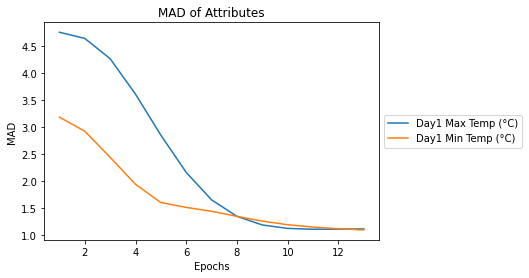

In [0]:
lb = fullyConnectedRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size + len(set_label_attributes) * int(set_num_days / RNN_percell_days - 1), num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
if(use_cuda):
  lb = lb.cuda()
trainFULLYCONNECTEDRNN(lb, trainingSet=trainingSet, validationSet=validationSet, batch_size=45, learning_rate=0.0009, num_epochs=13, master_path = master_path, ID = 'April 03')

In [0]:
train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=len(trainingSet), 
                                            num_workers=1, shuffle=True)
print(get_final_accuracy_dev_FULLYCONNECTEDRNN(lb, train_loader, nn.MSELoss()))

(array([0.34095064, 0.21846435]), 0.2797074954296161, 8.773443222045898)


In [0]:
val_loader = torch.utils.data.DataLoader(validationSet, batch_size=len(validationSet), 
                                            num_workers=1, shuffle=True)
print(get_final_accuracy_FULLYCONNECTEDRNN(lb, val_loader, nn.MSELoss()))

(array([3.34736903, 3.29059379]), 3.3189814125291712, 18.73697280883789)


Training Started...
Epoch 1: Train err: 3.0046367641997143, Train loss: 14.497500244452029 |Validation err: 3.2557369610004034, Validation loss: 19.105329195658367
Epoch 2: Train err: 2.8660186762193707, Train loss: 13.360924273121114 |Validation err: 3.2365963298335516, Validation loss: 18.475940439436172
Epoch 3: Train err: 2.774203520744902, Train loss: 12.54173740075559 |Validation err: 3.1290195954631628, Validation loss: 17.152933650546604
Epoch 4: Train err: 2.6889586648524353, Train loss: 11.806445267735695 |Validation err: 3.0284115757370094, Validation loss: 15.997326956854927
Epoch 5: Train err: 2.609924557772292, Train loss: 11.145626476832799 |Validation err: 2.9443142963145075, Validation loss: 14.81818543540107
Epoch 6: Train err: 2.5556166702774528, Train loss: 10.684875575863586 |Validation err: 2.899798627071846, Validation loss: 14.022755940755209
Epoch 7: Train err: 2.5030557959476183, Train loss: 10.271754449727585 |Validation err: 2.840959217492233, Validation los

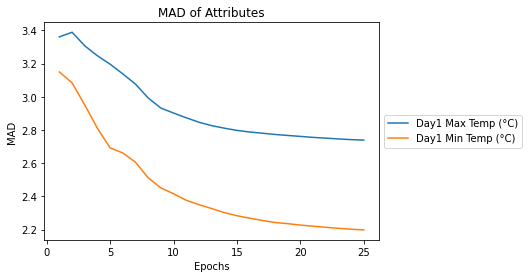

In [0]:
lb1 = fullyConnectedRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size + len(set_label_attributes) * int(set_num_days / RNN_percell_days - 1), num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
if(use_cuda):
  lb1 = lb.cuda() ### LOOOOOOOOL messed up results
trainFULLYCONNECTEDRNN_Last(lb1, trainingSet=trainingSet, validationSet=validationSet, batch_size=45, learning_rate=0.0009, num_epochs=25, master_path = master_path, ID = 'April 03 attempt 2')

Training Started...
Epoch 1: Train err: 12.119244919952134, Train loss: 212.13263988494873 |Validation err: 11.849897223686247, Validation loss: 197.28424530029298
Epoch 2: Train err: 11.79912095727112, Train loss: 202.09723211924236 |Validation err: 11.436379803701655, Validation loss: 184.46941223144532
Epoch 3: Train err: 11.04450627984244, Train loss: 179.5282253265381 |Validation err: 10.387042014942688, Validation loss: 153.9289638519287
Epoch 4: Train err: 9.513236125549023, Train loss: 136.17177918752034 |Validation err: 8.608746042818739, Validation loss: 106.80499076843262
Epoch 5: Train err: 7.518013488799161, Train loss: 84.91851971944173 |Validation err: 6.6853824134111175, Validation loss: 63.97422828674316
Epoch 6: Train err: 5.65496651592765, Train loss: 47.28321857452393 |Validation err: 5.068201364670725, Validation loss: 38.368686294555665
Epoch 7: Train err: 4.355958222438721, Train loss: 28.35903457005819 |Validation err: 4.067413589681326, Validation loss: 27.6801

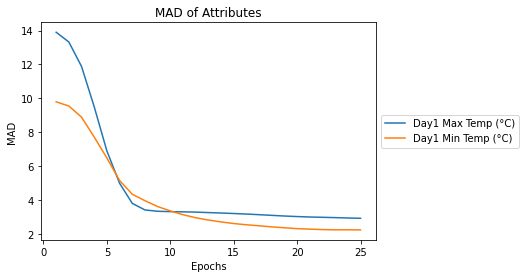

In [0]:
lb1 = fullyConnectedRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size + len(set_label_attributes) * int(set_num_days / RNN_percell_days - 1), num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
if(use_cuda):
  lb1 = lb1.cuda()
trainFULLYCONNECTEDRNN_Last(lb1, trainingSet=trainingSet, validationSet=validationSet, batch_size=75, learning_rate=0.0013, num_epochs=25, master_path = master_path, ID = 'April 03 attempt 3')

In [0]:
train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=len(trainingSet), 
                                            num_workers=1, shuffle=True)
print(get_final_accuracy_dev_FULLYCONNECTEDRNN(lb1, train_loader, nn.MSELoss()))

(array([0.37202925, 0.26736746]), 0.3196983546617916, 10.198003768920898)


In [0]:
val_loader = torch.utils.data.DataLoader(validationSet, batch_size=len(validationSet), 
                                            num_workers=1, shuffle=True)
print(get_final_accuracy_dev_FULLYCONNECTEDRNN(lb1, val_loader, nn.MSELoss()))

(array([0.39612188, 0.24930748]), 0.32271468144044324, 11.606435775756836)


Training Started...
Epoch 1: Train err: 7.773325113182344, Train loss: 106.628797152271 |Validation err: 3.6655825618148845, Validation loss: 19.820680535756626
Epoch 2: Train err: 3.2119057082682905, Train loss: 16.8276432638299 |Validation err: 3.558318481239338, Validation loss: 19.514396300682655
Epoch 3: Train err: 3.0515959645919435, Train loss: 15.335315743537798 |Validation err: 3.2424897732902815, Validation loss: 15.88945957330557
Epoch 4: Train err: 2.962293947806229, Train loss: 14.46047562115813 |Validation err: 3.051712167791382, Validation loss: 15.759298104506273
Epoch 5: Train err: 2.8501362075234637, Train loss: 13.479749633841319 |Validation err: 3.0196194816962065, Validation loss: 14.234036518977238
Epoch 6: Train err: 2.802752971553938, Train loss: 12.861849503974392 |Validation err: 3.176407991640015, Validation loss: 15.1138135103079
Epoch 7: Train err: 2.7116281280875216, Train loss: 12.109406654148886 |Validation err: 2.855878457278426, Validation loss: 13.555

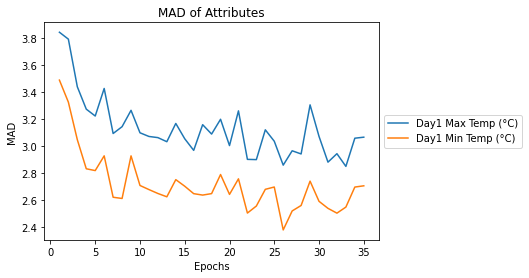

In [0]:
lb2 = fullyConnectedRNN2(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size, num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
# library 1
if(use_cuda):
  lb2 = lb2.cuda()
trainFULLYCONNECTEDRNN_Last3(lb2, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.003, num_epochs=35, master_path = master_path, ID = 'April 03 attempt 4')

In [0]:
new_best_lb_RNN = fullyConnectedRNN2(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size, num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
if(use_cuda):
  new_best_lb_RNN = new_best_lb_RNN.cuda()
new_best_lb_RNN.load_state_dict(torch.load(master_path + "Saved states/" + get_model_name(new_best_lb_RNN.name, 30, 0.003, 35, 'April 03 attempt 4')))


<All keys matched successfully>

In [0]:
master_path = '/content/gdrive/My Drive/APS360 Team/milestone 2/'
plot_training_curve(master_path + "Checkpoints/" + get_model_name('fullyConnectedRNN', 35, 0.0006, 50, None))

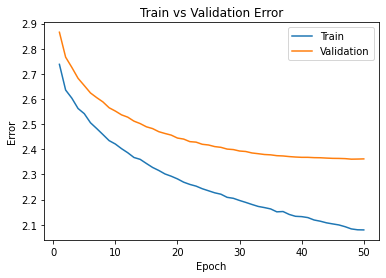

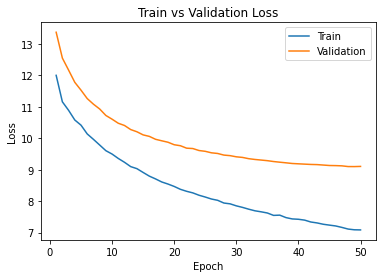

In [0]:
plot_training_curve(master_path + "Checkpoints/" + get_model_name('surrANN', 30, 0.00201, 50, None))

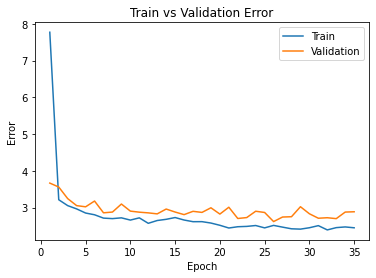

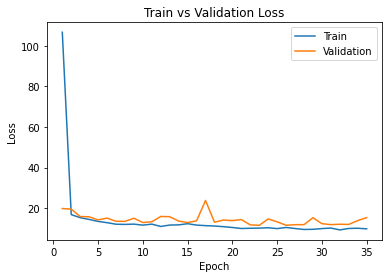

In [0]:
plot_training_curve(master_path + "Checkpoints/" + get_model_name(new_best_lb_RNN.name, 30, 0.003, 35, 'April 03 attempt 4'))

# Best fcRNN days ahead

## Library 2

### File manager

In [0]:
import pandas as pd
# Prints how many nulls there are in max and min temp
def test_null_csv_daily(dir, station, start_year, end_year, out_name =  None):
    """
      Args:
          station (string): eg. "ON_6158355"
          start_year (int): Starting year
          end_year (int)  : Ending year
          start_date (int): start_date = 0 is day 1 of starting year (Where we want the sampling to start)
          out_name (optional string) : change the name of the output file
    """
    if out_name == None:
      out_name = station + '_' + str(start_year) + '-' + str(end_year)
    master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' + dir
    src_path = master_path + 'datasets/'
    newdf = pd.read_csv(src_path + out_name + ".csv")
    print("Max temp nulls: " + str(newdf['Max Temp (°C)'].isnull().sum()))
    print("Min temp nulls: " + str(newdf['Min Temp (°C)'].isnull().sum()))
    print("Total Precip (mm) nulls: " + str(newdf['Total Precip (mm)'].isnull().sum()))
    #print("Tot precip nans: " + str(pd.isna(newdf['Total Precip (mm)']).sum()))
    

In [0]:
import pandas as pd
# Interpolates null values in min and max temp cols
def inter_nulls_csv_daily(dir, station, start_year, end_year, out_name =  None):
    """
      Args:
          station (string): eg. "ON_6158355"
          start_year (int): Starting year
          end_year (int)  : Ending year
          start_date (int): start_date = 0 is day 1 of starting year (Where we want the sampling to start)
          out_name (optional string) : change the name of the output file
    """
    if out_name == None:
      out_name = station + '_' + str(start_year) + '-' + str(end_year)
    master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' + dir
    src_path = master_path + 'datasets/'
    newdf = pd.read_csv(src_path + out_name + ".csv")
    newdf['Max Temp (°C)'] = newdf['Max Temp (°C)'].interpolate()
    newdf['Min Temp (°C)']= newdf['Min Temp (°C)'].interpolate()
    newdf['Total Precip (mm)']= newdf['Total Precip (mm)'].interpolate()
    
    newdf.to_csv( src_path +  out_name + ".csv")

In [0]:
#Raw csv downloaded must be place in /raw folder
#Merged csv will be stored at /datasets folder
# Also interpolates the null max and min temp
def make_csv_daily(dir, station, start_year, end_year, out_name =  None):
  """
    Args:
        station (string): eg. "ON_6158355"
        start_year (int): Starting year
        end_year (int)  : Ending year
        start_date (int): start_date = 0 is day 1 of starting year (Where we want the sampling to start)
        out_name (optional string) : change the name of the output file
    """
  if out_name == None:
    out_name = station + '_' + str(start_year) + '-' + str(end_year)
  master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' + dir
  src_path = master_path
  dest_path = master_path + 'datasets/'
  fout = open(dest_path + out_name + ".csv","w+")
  in_base = "en_climate_daily_" + station + '_' #eg: 'en_climate_daily_ON_6158355_'
  in_end = '_P1D.csv'
  # first file:
  for line in open(src_path + in_base + str(start_year) + in_end):
      fout.write(line)
  # now the rest:    
  for num in range(start_year + 1, end_year + 1):
      f = open(src_path + in_base + str(num) + in_end)
      f.__next__() # skip the header
      for line in f:
          fout.write(line)
      f.close() # not really needed
  fout.close()
  inter_nulls_csv_daily(dir, station, start_year, end_year, out_name)

In [0]:
def getDayAttrLabels(days_ahead, set_label_attributes):
  dayAttrLabels ={}
  i=0
  for day in range(1,days_ahead+1):
     for attr in set_label_attributes:
       dayAttrLabels[i] = 'Day{} {}'.format(day,attr)
       i+=1
  return dayAttrLabels
      

### Set creators

In [0]:
###Hyper parameters of data sets

####### Set #######
set_start_day = 0
set_num_days = 8
set_days_ahead = 5 #predict 5 days ahead
set_data_attributes = ['Max Temp (°C)', 'Min Temp (°C)']#,'Total Precip (mm)']
set_label_attributes = ['Max Temp (°C)', 'Min Temp (°C)']
#set_attributes = ['Max Temp (°C)', 'Min Temp (°C)']

stationSrc = "ON_6158355"
dirSrc =  "data/Target A/target/"
dirSurr = "data/Target A/surr/"
stationSurr = ["ON_615S001", "ON_6158751", "ON_615HMAK"]

start_season_day = 0
num_seasons = 12

####### Training Set #######
start_year_train = 2008
end_year_train = 2013 
# Must be the same as training because of season syncing
start_date_train = set_start_day 
end_date_train = None

####### Validation Set #######
start_year_val = 2014
end_year_val = 2014
# Must be the same as training because of season syncing
start_date_val = set_start_day 
end_date_val = None

####### Testing Set #######
start_year_test = 2007
end_year_test = 2007
# Must be the same as training because of season syncing
start_date_test = set_start_day 
end_date_test = None

####### Global variables #######
set_num_stations = 1 + len(stationSurr)
glob_dayAttr_labels = getDayAttrLabels(set_days_ahead, set_label_attributes) #make labels for day-attribute combinations
#glob_inp_size = set_num_stations * len(set_data_attributes)
RNN_percell_days = 1
glob_inp_size = set_num_stations * len(set_data_attributes)*RNN_percell_days
glob_out_size = len(set_label_attributes)*set_days_ahead
master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/'

In [0]:
import pandas as pd
import numpy as np
import math
from torch.utils.data import Dataset, DataLoader
class WeatherSurroundingDataset(Dataset):
    """Weather dataset."""

    def __init__(self, dirSrc, dirSurr, stationSrc, stationSurr, start_year, end_year, days_ahead =1, start_date = 0, end_date = None, num_days = 7, data_attributes = ['Max Temp (°C)', 'Min Temp (°C)'], label_attributes = ['Max Temp (°C)', 'Min Temp (°C)'], make_csv = False, out_name = None):
        """
        Args:
            dirSrc (string) =  "data/Target A/target/" relative directory of target station
            dirSurr (string) = "data/Target A/surr/" relative directory of surrounding stations
            stationSrc (string): eg. "ON_6158355"
            stationSurr (list of strings)
            start_year (int): Starting year
            end_year (int)  : Ending year
            days_ahead (int): number of days to be predicted
            start_date (int): start_date = 0 is day 1 of starting year (Where we want the sampling to start)
            end_date (optional int) : end_date = 7 is day 8 of starting year(min = 7 because of LABEL!). If provided changes the end date from last day of last year.
            num_days (optional int) : num_days is the interval of days before the label.
            make_csv (optional bool): If true it will call make_csv_daily function to create the csv from /raw datasets into /datasets
            out_name (optional string) : change the name of the output file which it reads from
        """
        self.data_attributes = data_attributes
        self.label_attributes = label_attributes
        self.days_ahead = days_ahead 
        self.num_days = num_days
        if(out_name == None):
          self.out_name = stationSrc + '_' + str(start_year) + '-' + str(end_year)
        else:
          self.out_name = out_name
        master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' +  dirSrc
        dest_path = master_path + 'datasets/'
        if (make_csv):
          make_csv_daily(dirSrc, stationSrc, start_year, end_year, out_name = out_name)

        self.src_csv = pd.read_csv(dest_path + self.out_name +'.csv')

        self.sur_csvs = []

        master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' +  dirSurr
        dest_path = master_path + 'datasets/'
        for station_surr in stationSurr:
          file_name = station_surr + '_' + str(start_year) + '-' + str(end_year)
          if (make_csv):
            make_csv_daily(dirSurr, station_surr, start_year, end_year, out_name = file_name)
          print(dest_path + file_name +'.csv')
          self.sur_csvs.append(pd.read_csv(dest_path + file_name +'.csv'))

        self.start_date = start_date
        if( end_date == None):
          self.end_date = len(self.src_csv) - 1
        else:
          self.end_date = end_date

        # Just making sure files are of the same size
        for i, cur_sur_csv in enumerate(self.sur_csvs):
          if(len(self.src_csv) != len(cur_sur_csv)):
            if(len(self.src_csv) > len(cur_sur_csv)):
              assert(0) # Surrounding stations don't have sufficient days to fill the dataset
            print("Caution: Traget station has {trg_days} days while surr station idx {idx} has {sur_days} days".format(len(self.src_csv), i, len(cur_sur_csv)))

    def __len__(self):
        return self.end_date - self.start_date +1 - self.num_days - self.days_ahead if self.end_date - self.start_date +1 - self.num_days - self.days_ahead >= 0 else 0

    def __getitem__(self, idx):
        data = self.src_csv.loc[ idx + self.start_date : idx + self.start_date + self.num_days - 1 , self.data_attributes ]
        
        for cur_csv in self.sur_csvs:
          new_data = cur_csv.loc[ idx + self.start_date : idx + self.start_date + self.num_days - 1 , self.data_attributes ]
          data = np.concatenate([data, new_data], axis= 1)

        start_days_ahead =  idx + self.start_date + self.num_days
        end_days_ahead = start_days_ahead + self.days_ahead - 1  
        
        #label = self.src_csv.loc[ idx + self.start_date + self.num_days, ['Max Temp (°C)', 'Min Temp (°C)'] ]
        
        label = self.src_csv.loc[start_days_ahead:end_days_ahead, self.label_attributes ] 
        label = np.asarray(label)
        for i in range(int(self.num_days / RNN_percell_days) - 1):
            i += 1 # Sorry for this nasty code
            new_label = self.src_csv.loc[idx + self.start_date + RNN_percell_days * i, self.label_attributes ]
            new_label = np.asarray(new_label)
            label = np.concatenate([label, new_label], axis= None)

        label = np.asarray(label).flatten()
        label = label.astype('float')

        data = data.flatten()

        #print('Data: {}'.format(data))
        #print('Data shape: {}'.format(data.shape))
        #print('Labels shape: {}'.format(label.shape))
        #print('Labels: {}'.format(label[:2]))
        sample = [data, label]

        return sample

    def giveSeasonalSets(self, start_season_day = 0, num_seasons = 4):
        """num_seasons > 1 or meaningless and unknown behaviour"""
        seasonalSets = [None] * num_seasons

        #seasonIntervals = math.ceil(365.25 / num_seasons)
        seasonIntervals = math.floor((self.end_date - self.start_date) / (math.floor((self.end_date - self.start_date + 1) / 365) * num_seasons))

        if(start_season_day > seasonIntervals):
          start_season_day = start_season_day % seasonIntervals
          print("Truncated start_season_day to {}. Accepts values between 0 ~ {}".format(start_season_day, seasonIntervals-1))
        if(start_season_day > 0):
          seasonalSets[-1] = SeasonalDataset(self, 0, start_season_day - 1)
        curLastDay = seasonIntervals + start_season_day - 1
        seasonalSets[0] = SeasonalDataset(self, start_season_day - self.num_days, curLastDay) # start date can include days from previous season to predict current season days

        curStartDay = curLastDay + 1 
        curLastDay = seasonIntervals + curStartDay - 1
        i = 1
        while(curLastDay < self.end_date): # Do not add the last interval
          #print("giveSeasonalSets: " + str(i) + " " + str(curStartDay) + " " + str(curLastDay))
          if(seasonalSets[i] == None ):
            seasonalSets[i] = SeasonalDataset(self, curStartDay - self.num_days, curLastDay)
          else:
            seasonalSets[i] = seasonalSets[i] + SeasonalDataset(self, curStartDay - self.num_days, curLastDay)
          curStartDay = curLastDay + 1
          curLastDay = seasonIntervals + curStartDay - 1
          i += 1
          i %= num_seasons

        # Now add the last set
        curLastDay = self.end_date
        if(seasonalSets[i] == None ):
            seasonalSets[i] = SeasonalDataset(self, curStartDay - self.num_days, curLastDay)
        else:
            seasonalSets[i] = seasonalSets[i] + SeasonalDataset(self, curStartDay - self.num_days, curLastDay)

        return seasonalSets


class SeasonalDataset(WeatherSurroundingDataset):
    """Seasonal dataset. Inherited from WSDataset. Only used in helper function -giveSeasonalSets-"""

    def __init__(self, weathersurroundingDataset, start_date, end_date):
        """
        Args:
            weathersurroundingDataset: Must previously loaded all the years and stations in a WeatherSurroundingDataset
        """
        self.data_attributes = weathersurroundingDataset.data_attributes
        self.label_attributes = weathersurroundingDataset.label_attributes
        self.days_ahead = weathersurroundingDataset.days_ahead
        self.num_days = weathersurroundingDataset.num_days
        self.out_name = weathersurroundingDataset.out_name
        self.src_csv = weathersurroundingDataset.src_csv
        self.sur_csvs = weathersurroundingDataset.sur_csvs
        self.start_date = start_date if start_date >= 0 else 0
        self.end_date = end_date

In [0]:
# start_year_train = 2008
# end_year_train = 2013 #changed from 2019 because in our proposal we said 07-16 is train
# start_date_train = 0
# end_date_train = None
# num_days_train = set_num_days
# stationSrc = "ON_6158355"
# dirSrc =  "data/Target A/target/"
# dirSurr = "data/Target A/surr/"
trainingSet = WeatherSurroundingDataset(dirSrc, dirSurr, stationSrc, stationSurr, start_year_train, end_year_train, set_days_ahead, start_date_train, end_date_train, num_days=set_num_days, data_attributes = set_data_attributes, label_attributes = set_label_attributes, make_csv = False)

/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615S001_2008-2013.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_6158751_2008-2013.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615HMAK_2008-2013.csv


In [0]:
train_seasonal_sets = trainingSet.giveSeasonalSets(start_season_day= start_season_day, num_seasons= num_seasons)

In [0]:
# start_year_val = 2014
# end_year_val = 2014
# start_date_val = 0
# end_date_val = None
# num_days_val = set_num_days
# station stays the same
validationSet = WeatherSurroundingDataset(dirSrc, dirSurr, stationSrc, stationSurr, start_year_val, end_year_val, set_days_ahead, start_date_train, end_date_train, num_days=set_num_days, data_attributes = set_data_attributes, label_attributes = set_label_attributes, make_csv = False)

/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615S001_2014-2014.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_6158751_2014-2014.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615HMAK_2014-2014.csv


In [0]:
val_seasonal_sets = validationSet.giveSeasonalSets(start_season_day= start_season_day, num_seasons= num_seasons)

In [0]:
#
#
#
#
testingSet = WeatherSurroundingDataset(dirSrc, dirSurr, stationSrc, stationSurr, start_year_test, end_year_test, set_days_ahead, start_date_train, end_date_train, num_days=set_num_days, data_attributes = set_data_attributes, label_attributes = set_label_attributes, make_csv = False)

/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615S001_2007-2007.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_6158751_2007-2007.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615HMAK_2007-2007.csv


In [0]:
test_seasonal_sets = testingSet.giveSeasonalSets(start_season_day= start_season_day, num_seasons= num_seasons)

## MODEL

In [0]:
import os 
from torch.utils.data.sampler import SubsetRandomSampler 
from torchvision import datasets, models, transforms 
import torch.optim as optim
import numpy as np 
import matplotlib.pyplot as plt
import time 
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim 
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms 

### Helper functions

In [0]:
use_cuda = True

In [0]:
def get_model_name(name, batch_size, learning_rate, epoch, ID = None):
    if(ID == None):
      path = "{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                              batch_size,
                                              learning_rate,
                                              epoch)
    else:
      path = "{0}_bs{1}_lr{2}_epoch{3}_{4}".format(name,
                                              batch_size,
                                              learning_rate,
                                              epoch,
                                              ID)
    return path

In [0]:
def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

In [0]:
def plot_dayAttr_curve(path, att_list):
    """ Plots given attributes for all days_ahead

    Args:
        path: The base path of the csv files produced during training
        att_list: names of attributes you want to compare
    """
    import matplotlib.pyplot as plt
    
    plt.title("Attribute Error vs Days Ahead")
    n = set_days_ahead
    import matplotlib.pyplot as plt

    for i in range(len(att_list)): #for each attribute
      att_err=[]
      att=att_list[i]
      for day in range(1, n+1): #for each day
        temp_err = np.loadtxt("{p}_val_err_Day{d}_{att}.csv".format(p=path, d=day, att=att))
        att_err.append(temp_err)
      plt.plot(range(1,n+1), att_err, label=att)

    plt.xlabel("Days Ahead")
    plt.ylabel("MAD")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [0]:
#tester
#master_path = "/content/gdrive/My Drive/APS360 Team/milestone 3/"
#p = master_path + "Checkpoints/weatherSurrRNN_bs30_lr0.01_epoch1"
#plot_dayAttr_curve(p,set_label_attributes)


In [0]:
def savePrintDayAtrib(model_path, m_day_err, printbool =True):
  '''save into csv or print day-attribute combos
  '''
  #print(m_day_err)
  num_epochs =[]
  for i in range(len(m_day_err)): #for each attribute
  
    transp =[]
    for epoch in range(len(m_day_err[0])):
      transp.append(m_day_err[i][epoch])
      if i==0:
        num_epochs.append(epoch + 1)
    #for th last epoch, save values
    day=glob_dayAttr_labels[i].split(maxsplit=1)[0]
    att_name = glob_dayAttr_labels[i].split(maxsplit=1)[1]
    np.savetxt("{p}_val_err_{x}_{attribute}.csv".format(p=model_path, x = day, attribute = att_name), m_day_err[i])
    
    if(printbool):
      #label2 = 'Attribute {}'.format(i)
      label2 = '{}'.format(glob_dayAttr_labels[i])
      plt.plot(num_epochs,transp, label = label2)
      plt.xlabel('Epochs')
      plt.ylabel('MAD')
      plt.title('MAD of Attributes')
      plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

      #plt.legend()




### Architecture

In [0]:
class fullyConnectedRNN(nn.Module):
    """ Input is no longer default value
        To be able to change hyperparameters easily please manually input the values everytime """
    """ Copy Paste:"""                """VV any number VV"""
    #fullyConnectedRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size + len(set_label_attributes) * int(set_num_days / RNN_percell_days - 1), num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
    def __init__(self, hidden_size, input_size, output_size, num_RNNS, n_layers = 1): #,dropout=DROPOUT
        super(fullyConnectedRNN, self).__init__()
        self.name = "fullyConnectedRNN"
        self.hidden_size = hidden_size
        self.num_RNNS = num_RNNS
        self.n_layers = n_layers
        self.rnn = nn.RNN(input_size, hidden_size, n_layers, batch_first=True) # there is RNN, GRU, LSTM
        self.fc1 = nn.Linear(hidden_size * num_RNNS, hidden_size * 2)
        self.fc2 = nn.Linear(hidden_size * 2,  int(hidden_size * 0.75))
        self.fc3 = nn.Linear(int(hidden_size * 0.75),  output_size)

    def forward(self, inp,  hidden = None):
        if(hidden == None):
          h0 = torch.zeros(self.n_layers, inp.size(0), self.hidden_size)
          if(use_cuda):
            h0 = h0.cuda()
          out, h_last = self.rnn(inp, h0)
        else:
          out, h_last = self.rnn(inp, hidden)
        out = out.reshape(out.shape[0], out.shape[1] * out.shape[2])
        out = self.fc1(out)
        out = F.leaky_relu(out) 
        out = self.fc2(out)
        out = F.leaky_relu(out)
        out = self.fc3(out)
        return out, h_last

### Training

In [0]:
#this can do multiple attributes and multiple days, and keeps error for each day_attribute total absolute deviation
def compute_error(outputs, labels):
  '''
day_attrib_err = List of total aboslerror calculated for each label in order

ex: 
[min1, max1, min2, max2] => [err(min1), err(max1), err(min2), err(max2)]

ex output:
[11, 1, 2, 3]
Interpretation: Day 1 minimum temperature has total error of 11... Day2 max temp has total error of 1

  '''
  #day_attrib_err = {}
  day_attrib_err = np.zeros(len(labels[0]))
  err =0.0
  number_items =0
  for i in range(len(labels[0])): #for each day_attribute combo
    day_attrib_err[i] = 0
    for j, out in enumerate(outputs, 0): #for all outputs (Throughout the batch)
      day_attrib_err[i] = day_attrib_err[i] + abs(labels[j][i] - out[i])
      err += abs(labels[j][i] - out[i])
      
  number_items = len(labels[0])*len(outputs) #total number of comparisons 
  return day_attrib_err, err, number_items
    


In [0]:
#this can do multiple attributes and multiple days, and keeps error for each day_attribute total absolute deviation
def compute_dev_error(outputs, labels):
  '''
day_attrib_err = List of total aboslerror calculated for each label in order

ex: 
[min1, max1, min2, max2] => [err(min1), err(max1), err(min2), err(max2)]

ex output:
[11, 1, 2, 3]
Interpretation: Day 1 minimum temperature has total error of 11... Day2 max temp has total error of 1

  '''
  #day_attrib_err = {}
  day_attrib_err = np.zeros(len(labels[0]))
  err =0.0
  number_items =0
  for i in range(len(labels[0])): #for each day_attribute combo
    day_attrib_err[i] = 0.0
    for j, out in enumerate(outputs, 0): #for all outputs (Throughout the batch)
      day_attrib_err[i] += (abs(labels[j][i] - out[i]) > 3)
      err += (abs(labels[j][i] - out[i]) > 3)
      
  number_items = len(labels[0])*len(outputs) #total number of comparisons 
  return day_attrib_err, err, number_items

In [0]:
def get_accuracy_FULLYCONNECTEDRNN(net, loader, criterion):

    total_loss = 0.0
    total_err = 0.0
    number_items = 0

    for i, data in enumerate(loader, 0):
      inputs, labels = data
      inputs = inputs.view(inputs.shape[0], int(inputs.shape[1]/glob_inp_size), glob_inp_size)
      #############################################
      #To Enable GPU Usage
      if use_cuda and torch.cuda.is_available():
        inputs = inputs.cuda()
        labels = labels.cuda()
      #############################################
      outputs, _ = net(inputs.float())
      loss = criterion(outputs, labels.float()) 
      total_loss += loss.item()
      
      #cur_err, cur_num = compute_error(outputs, labels)
      cur_days_ahead_err, cur_err, cur_num = compute_error(outputs, labels)
      
      if i==0: #need to intialize
        tot_days_ahead_err=cur_days_ahead_err
      else:
        tot_days_ahead_err += cur_days_ahead_err
      total_err += cur_err
      number_items += cur_num
      
    mean_days_ahead_err = tot_days_ahead_err / number_items * glob_out_size
    #print('get acc: mean_days_ahead_err: ', mean_days_ahead_err)
    err = float(total_err) / number_items
    loss = float(total_loss) / (i + 1)
    return mean_days_ahead_err, err, loss
    #return err, loss

In [0]:
def get_final_accuracy_FULLYCONNECTEDRNN(net, loader, criterion):

    total_loss = 0.0
    total_err = 0.0
    number_items = 0

    for i, data in enumerate(loader, 0):
      inputs, labels = data
      inputs = inputs.view(inputs.shape[0], int(inputs.shape[1]/glob_inp_size), glob_inp_size)
      #############################################
      #To Enable GPU Usage
      if use_cuda and torch.cuda.is_available():
        inputs = inputs.cuda()
        labels = labels.cuda()
      #############################################
      outputs, _ = net(inputs.float())
      loss = criterion(outputs[:, :glob_out_size], labels[:, :glob_out_size].float()) 
      total_loss += loss.item()
      
      #cur_err, cur_num = compute_error(outputs, labels)
      cur_days_ahead_err, cur_err, cur_num = compute_error(outputs[:, :glob_out_size], labels[:, :glob_out_size])
      
      if i==0: #need to intialize
        tot_days_ahead_err=cur_days_ahead_err
      else:
        tot_days_ahead_err += cur_days_ahead_err
      total_err += cur_err
      number_items += cur_num
      
    mean_days_ahead_err = tot_days_ahead_err / number_items * glob_out_size
    #print('get acc: mean_days_ahead_err: ', mean_days_ahead_err)
    err = float(total_err) / number_items
    loss = float(total_loss) / (i + 1)
    return mean_days_ahead_err, err, loss
    #return err, loss

In [0]:
def get_final_accuracy_dev_FULLYCONNECTEDRNN(net, loader, criterion):

    total_loss = 0.0
    total_err = 0.0
    number_items = 0

    for i, data in enumerate(loader, 0):
      inputs, labels = data
      inputs = inputs.view(inputs.shape[0], int(inputs.shape[1]/glob_inp_size), glob_inp_size)
      #############################################
      #To Enable GPU Usage
      if use_cuda and torch.cuda.is_available():
        inputs = inputs.cuda()
        labels = labels.cuda()
      #############################################
      outputs, _ = net(inputs.float())
      loss = criterion(outputs[:, :glob_out_size], labels[:, :glob_out_size].float()) 
      total_loss += loss.item()
      
      #cur_err, cur_num = compute_error(outputs, labels)
      cur_days_ahead_err, cur_err, cur_num = compute_dev_error(outputs[:, :glob_out_size], labels[:, :glob_out_size])
      
      if i==0: #need to intialize
        tot_days_ahead_err=cur_days_ahead_err
      else:
        tot_days_ahead_err += cur_days_ahead_err
      total_err += cur_err
      number_items += cur_num
      
    mean_days_ahead_err = tot_days_ahead_err / number_items * glob_out_size
    #print('get acc: mean_days_ahead_err: ', mean_days_ahead_err)
    err = float(total_err) / number_items
    loss = float(total_loss) / (i + 1)
    return mean_days_ahead_err, err, loss
    #return err, loss

In [0]:
def trainFULLYCONNECTEDRNN(net, trainingSet, validationSet, batch_size, num_epochs, learning_rate, master_path, ID = None, do_save = True):
    torch.manual_seed(777)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)

    train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=batch_size, 
                                            num_workers=1, shuffle=False)
    val_loader = torch.utils.data.DataLoader(validationSet, batch_size=batch_size, 
                                            num_workers=1, shuffle=False)

    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    mean_day_attr_err = np.zeros([len(trainingSet[0][1]), num_epochs])
    #mean_day_attr_err = {}
    ########################################################################
    start_time = time.time()
    print ("Training Started...")
    h_last = torch.zeros(net.n_layers, batch_size, net.hidden_size)
    for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_train_err = 0.0
        number_items = 0
        for i, data in enumerate(train_loader, 0): # Itterate through each batch
            #print("Training", i, "out of", len(train_loader))
            inputs, labels = data
            if(inputs.shape[0] != batch_size):
              continue
            inputs = inputs.view(inputs.shape[0], int(inputs.shape[1]/glob_inp_size), glob_inp_size)
            
            
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              inputs = inputs.cuda()
              labels = labels.cuda()
              h_last = h_last.cuda()
            #############################################
            
              
            outputs, h_last = net(inputs.float(), h_last)             # forward pass
            loss = criterion(outputs, labels.float()) # compute the total loss
            loss.backward(retain_graph=True)                           # backward pass (compute parameter updates)
            optimizer.step()                          # make the updates for each parameter
            optimizer.zero_grad()                     # a clean up step for PyTorch

            # Calculate the statistics
            total_train_loss += loss.item()
            day_attr_dict, cur_err, cur_num = compute_error(outputs, labels) 
            total_train_err += cur_err
            number_items += cur_num
             
          
        train_err[epoch] = float(total_train_err) / number_items
        train_loss[epoch] = float(total_train_loss) / (i+1)

        mean_day_attr_err[:, epoch] ,val_err[epoch], val_loss[epoch] = get_accuracy_FULLYCONNECTEDRNN(net, val_loader, criterion) 
        #mean_day_attr_err[:, epoch] = [ [mean errors for epoch 0 for attribute 1, mean errors for epoch1 for attribute 1,...] [mean erros for attribute 2 for epoch 0, ..] ]

        
        # Save the state of model at current epoch
        if(do_save):
          torch.save(net.state_dict(), master_path + "Saved states/" + get_model_name(net.name, batch_size, learning_rate, epoch + 1, ID))
        
        print(("Epoch {}: Train err: {}, Train loss: {} |"
              + "Validation err: {}, Validation loss: {}"
                ).format(
                    epoch + 1,
                    train_err[epoch],
                    train_loss[epoch],
                    val_err[epoch],
                    val_loss[epoch]))
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    # Write the train/test loss/err into CSV file for plotting later
    model_path = master_path + "Checkpoints/" + get_model_name(net.name, batch_size, learning_rate, epoch + 1, ID)
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)
    savePrintDayAtrib(model_path, mean_day_attr_err[:glob_out_size, :], printbool=True) #print and save attributes
    

In [0]:
def trainFULLYCONNECTEDRNN_Last(net, trainingSet, validationSet, batch_size, num_epochs, learning_rate, master_path, ID = None, do_save = True):
    torch.manual_seed(777)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)

    train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=batch_size, 
                                            num_workers=1, shuffle=False)
    val_loader = torch.utils.data.DataLoader(validationSet, batch_size=batch_size, 
                                            num_workers=1, shuffle=False)

    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    mean_day_attr_err = np.zeros([glob_out_size, num_epochs])
    #mean_day_attr_err = {}
    ########################################################################
    start_time = time.time()
    print ("Training Started...")
    h_last = torch.zeros(net.n_layers, batch_size, net.hidden_size)
    for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_train_err = 0.0
        number_items = 0
        for i, data in enumerate(train_loader, 0): # Itterate through each batch
            #print("Training", i, "out of", len(train_loader))
            inputs, labels = data
            if(inputs.shape[0] != batch_size):
              continue
            inputs = inputs.view(inputs.shape[0], int(inputs.shape[1]/glob_inp_size), glob_inp_size)
            
            
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              inputs = inputs.cuda()
              labels = labels.cuda()
              h_last = h_last.cuda()
            #############################################
            
              
            outputs, h_last = net(inputs.float(), h_last)             # forward pass
            loss = criterion(outputs[:, :glob_out_size], labels[:, :glob_out_size].float()) # compute the total loss
            loss.backward(retain_graph=True)                           # backward pass (compute parameter updates)
            optimizer.step()                          # make the updates for each parameter
            optimizer.zero_grad()                     # a clean up step for PyTorch

            # Calculate the statistics
            total_train_loss += loss.item()
            day_attr_dict, cur_err, cur_num = compute_error(outputs[:, :glob_out_size], labels[:, :glob_out_size]) 
            total_train_err += cur_err
            number_items += cur_num
             
          
        train_err[epoch] = float(total_train_err) / number_items
        train_loss[epoch] = float(total_train_loss) / (i+1)

        mean_day_attr_err[:, epoch] ,val_err[epoch], val_loss[epoch] = get_final_accuracy_FULLYCONNECTEDRNN(net, val_loader, criterion) 
        #mean_day_attr_err[:, epoch] = [ [mean errors for epoch 0 for attribute 1, mean errors for epoch1 for attribute 1,...] [mean erros for attribute 2 for epoch 0, ..] ]

        
        # Save the state of model at current epoch
        if(do_save):
          torch.save(net.state_dict(), master_path + "Saved states/" + get_model_name(net.name, batch_size, learning_rate, epoch + 1, ID))
        
        print(("Epoch {}: Train err: {}, Train loss: {} |"
              + "Validation err: {}, Validation loss: {}"
                ).format(
                    epoch + 1,
                    train_err[epoch],
                    train_loss[epoch],
                    val_err[epoch],
                    val_loss[epoch]))
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    # Write the train/test loss/err into CSV file for plotting later
    model_path = master_path + "Checkpoints/" + get_model_name(net.name, batch_size, learning_rate, epoch + 1, ID)
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)
    savePrintDayAtrib(model_path, mean_day_attr_err[:glob_out_size, :], printbool=True) #print and save attributes

## Training grounds

Training Started...
Epoch 1: Train err: 12.098721627938914, Train loss: 213.6264091803103 |Validation err: 11.95088546224561, Validation loss: 200.8225712776184
Epoch 2: Train err: 11.374003844677787, Train loss: 191.77797321397432 |Validation err: 10.560374650981267, Validation loss: 161.42832970619202
Epoch 3: Train err: 9.081494986905842, Train loss: 129.4595832435452 |Validation err: 7.739963116164549, Validation loss: 92.82214331626892
Epoch 4: Train err: 6.433133596433949, Train loss: 67.5780605394013 |Validation err: 5.638292377172951, Validation loss: 50.65317344665527
Epoch 5: Train err: 4.831529751305421, Train loss: 37.398144897149535 |Validation err: 4.553596077540551, Validation loss: 34.04124069213867
Epoch 6: Train err: 4.012780084562092, Train loss: 25.59155055454799 |Validation err: 4.016836453216752, Validation loss: 27.462750554084778
Epoch 7: Train err: 3.6024776109984997, Train loss: 20.84241974110506 |Validation err: 3.7558549034639657, Validation loss: 24.5154514

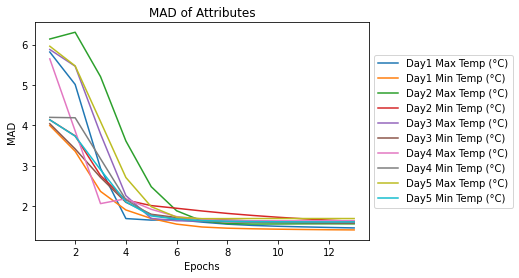

In [0]:
lb = fullyConnectedRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size + len(set_label_attributes) * int(set_num_days / RNN_percell_days - 1), num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
if(use_cuda):
  lb = lb.cuda()
trainFULLYCONNECTEDRNN(lb, trainingSet=trainingSet, validationSet=validationSet, batch_size=45, learning_rate=0.0009, num_epochs=13, master_path = master_path, ID = 'April 03_ bestfcRNN p1')

In [0]:
train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=len(trainingSet), 
                                            num_workers=1, shuffle=True)
print(get_final_accuracy_dev_FULLYCONNECTEDRNN(lb, train_loader, nn.MSELoss()))

(array([0.47223497, 0.43552088, 0.51629188, 0.4850849 , 0.51996329,
       0.48187242, 0.52914181, 0.50252409, 0.53923818, 0.5061955 ]), 0.49880679210647083, 20.948814392089844)


In [0]:
val_loader = torch.utils.data.DataLoader(validationSet, batch_size=len(validationSet), 
                                            num_workers=1, shuffle=True)
print(get_final_accuracy_dev_FULLYCONNECTEDRNN(lb, val_loader, nn.MSELoss()))

(array([0.48295455, 0.44886364, 0.51988636, 0.47159091, 0.52840909,
       0.51136364, 0.55397727, 0.54545455, 0.55965909, 0.51704545]), 0.5139204545454545, 23.693391799926758)


In [0]:
new_best_lb_RNN = fullyConnectedRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size + len(set_label_attributes) * int(set_num_days / RNN_percell_days - 1), num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
if(use_cuda):
  new_best_lb_RNN = new_best_lb_RNN.cuda()
new_best_lb_RNN.load_state_dict(torch.load(master_path + "Saved states/" + get_model_name(new_best_lb_RNN.name, 45, 0.0009, 13, 'April 03_ bestfcRNN p1')))

<All keys matched successfully>

Training Started...
Epoch 1: Train err: 3.589498974991238, Train loss: 20.278691390204052 |Validation err: 3.7659945559687906, Validation loss: 22.42936034636064
Epoch 2: Train err: 3.5470275083358893, Train loss: 19.826218105497816 |Validation err: 3.756363863401594, Validation loss: 22.288247975436125
Epoch 3: Train err: 3.523806759695874, Train loss: 19.57503905372014 |Validation err: 3.748046409821871, Validation loss: 22.156253641301934
Epoch 4: Train err: 3.5031035581957863, Train loss: 19.35593542976985 |Validation err: 3.740355893653451, Validation loss: 22.047630960291084
Epoch 5: Train err: 3.4849329970963003, Train loss: 19.166961609371125 |Validation err: 3.733639367378288, Validation loss: 21.957422950051047
Epoch 6: Train err: 3.468770240673363, Train loss: 19.00214297430856 |Validation err: 3.7276507472347773, Validation loss: 21.879305839538574
Epoch 7: Train err: 3.454609151699634, Train loss: 18.861070981101385 |Validation err: 3.722638626897947, Validation loss: 21.8

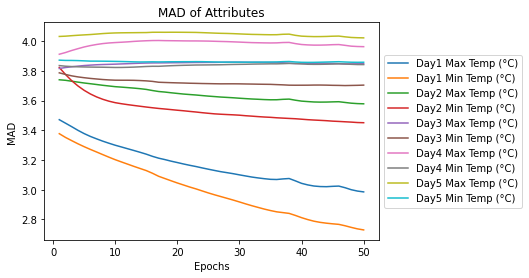

In [0]:
trainFULLYCONNECTEDRNN_Last(new_best_lb_RNN, trainingSet=trainingSet, validationSet=validationSet, batch_size=35, learning_rate=0.0006, num_epochs=50, master_path = master_path, ID='April 03_ bestfcRNN p2')

In [0]:
new_best_lb_RNN = fullyConnectedRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size + len(set_label_attributes) * int(set_num_days / RNN_percell_days - 1), num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
if(use_cuda):
  new_best_lb_RNN = new_best_lb_RNN.cuda()
new_best_lb_RNN.load_state_dict(torch.load(master_path + "Saved states/" + get_model_name(new_best_lb_RNN.name, 35, 0.0006, 50, 'April 03_ bestfcRNN p2')))

<All keys matched successfully>

In [0]:
#train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=len(trainingSet), num_workers=1, shuffle=True)
print(get_final_accuracy_FULLYCONNECTEDRNN(new_best_lb_RNN, train_loader, nn.MSELoss()))

(array([2.91997682, 2.39390519, 3.39241685, 2.96042135, 3.60655127,
       3.162207  , 3.72492317, 3.27377764, 3.80777561, 3.36768519]), 3.2609640087511886, 17.333572387695312)


In [0]:
#val_loader = torch.utils.data.DataLoader(validationSet, batch_size=len(validationSet), num_workers=1, shuffle=True)
print(get_final_accuracy_FULLYCONNECTEDRNN(new_best_lb_RNN, val_loader, nn.MSELoss()))

(array([2.98500185, 2.72915549, 3.57777376, 3.45052749, 3.84723011,
       3.7035417 , 3.96226823, 3.84169022, 4.02160335, 3.85747538]), 3.597626757597987, 21.058847427368164)


In [0]:
train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=len(trainingSet), num_workers=1, shuffle=True)
print(get_final_accuracy_dev_FULLYCONNECTEDRNN(new_best_lb_RNN, train_loader, nn.MSELoss()))

(array([0.39284075, 0.2987609 , 0.46764571, 0.40477283, 0.48829738,
       0.43873336, 0.51399725, 0.46122074, 0.53097751, 0.4745296 ]), 0.4471776044056907, 17.33357048034668)


In [0]:
val_loader = torch.utils.data.DataLoader(validationSet, batch_size=len(validationSet), num_workers=1, shuffle=True)
print(get_final_accuracy_dev_FULLYCONNECTEDRNN(new_best_lb_RNN, val_loader, nn.MSELoss()))

(array([0.42045455, 0.35511364, 0.50568182, 0.46306818, 0.53125   ,
       0.49147727, 0.54545455, 0.52556818, 0.55681818, 0.52272727]), 0.49176136363636364, 21.05884552001953)


In [0]:
train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=len(trainingSet), num_workers=1, shuffle=True)
print(get_final_accuracy_dev_FULLYCONNECTEDRNN(new_best_lb_RNN, train_loader, nn.MSELoss()))

(array([0.17530978, 0.093162  , 0.24965581, 0.17026159, 0.26571822,
       0.21018816, 0.27810922, 0.22579165, 0.28636989, 0.23359339]), 0.21881597062872876, 17.333572387695312)


In [0]:
val_loader = torch.utils.data.DataLoader(validationSet, batch_size=len(validationSet), num_workers=1, shuffle=True)
print(get_final_accuracy_dev_FULLYCONNECTEDRNN(new_best_lb_RNN, val_loader, nn.MSELoss()))

(array([0.20170455, 0.14772727, 0.25      , 0.23579545, 0.29261364,
       0.27840909, 0.30681818, 0.28977273, 0.31534091, 0.27840909]), 0.2596590909090909, 21.05884552001953)


In [0]:
test_loader = torch.utils.data.DataLoader(testingSet, batch_size=len(testingSet), 
                                            num_workers=1, shuffle=True)
get_final_accuracy_FULLYCONNECTEDRNN(new_best_lb_RNN, test_loader, nn.MSELoss())

(array([3.72897781, 3.01221333, 4.09152646, 3.50949967, 4.22881909,
        3.68785215, 4.40718702, 3.73915053, 4.47618213, 3.85313143]),
 3.8734539618823502,
 23.98846435546875)

In [0]:
test_loader = torch.utils.data.DataLoader(testingSet, batch_size=len(testingSet), 
                                            num_workers=1, shuffle=True)
get_final_accuracy_dev_FULLYCONNECTEDRNN(new_best_lb_RNN, test_loader, nn.MSELoss())

(array([0.50852273, 0.4375    , 0.56534091, 0.50568182, 0.5625    ,
        0.52840909, 0.57102273, 0.52272727, 0.59375   , 0.53693182]),
 0.5332386363636363,
 23.98846435546875)

In [0]:
test_loader = torch.utils.data.DataLoader(testingSet, batch_size=len(testingSet), 
                                            num_workers=1, shuffle=True)
get_final_accuracy_dev_FULLYCONNECTEDRNN(new_best_lb_RNN, test_loader, nn.MSELoss())

(array([0.30397727, 0.19318182, 0.34375   , 0.25284091, 0.35227273,
        0.27272727, 0.34943182, 0.29261364, 0.375     , 0.29261364]),
 0.3028409090909091,
 23.98846435546875)

In [0]:
model_path = master_path + "Checkpoints/" + get_model_name(new_best_lb_RNN.name, 35, 0.0006, 50, 'April 03_ bestfcRNN p2')
for i, curSet in enumerate(train_seasonal_sets):
  val_loader = torch.utils.data.DataLoader(curSet, batch_size=len(curSet), num_workers=1, shuffle=False)
  errs ,err, loss =get_final_accuracy_FULLYCONNECTEDRNN(new_best_lb_RNN, val_loader, nn.MSELoss())
  np.savetxt("{p}_month{m}_val_errs.csv".format(p=model_path, m = i + 1), errs)
  np.savetxt("{p}_month{m}_val_meanerr.csv".format(p=model_path, m = i + 1), [err])
  np.savetxt("{p}_month{m}_val_mse.csv".format(p=model_path, m = i + 1), [loss])

# Demo



In [0]:
####### Must first run Library and Model in M2 surrANN section
dirSrc =  "data/Target A/target/"
dirSurr = "data/Target A/surr/"
master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/'
use_cuda = True

**Create dataset**

In [0]:
set_start_day = 0     #starts with the first day in the year
end_date_test = None  #will use the whole data
set_num_days = 3      #uses past 3 days as input
set_days_ahead = 1    #predict 1 days ahead
set_data_attributes = ['Max Temp (°C)', 'Min Temp (°C)']
set_label_attributes = ['Max Temp (°C)', 'Min Temp (°C)']

stationSrc = "ON_6158355"                                 #target station
stationSurr = ["ON_615S001", "ON_6158751", "ON_615HMAK"]  #surrounding station

start_year_test = 2007 #test dataset built from 2007 data
end_year_test = 2007
testingSet = WeatherSurroundingDataset(dirSrc, dirSurr, stationSrc, stationSurr, start_year_test, end_year_test, set_days_ahead, set_start_day, end_date_train, num_days=set_num_days, data_attributes = set_data_attributes, label_attributes = set_label_attributes, make_csv = False)

/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615S001_2007-2007.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_6158751_2007-2007.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615HMAK_2007-2007.csv


**Divide dataset into months**

In [0]:
start_season_day = 0
num_seasons = 12
# Creates a list of 12 datasets each consistent of the data in a month
test_seasonal_sets = testingSet.giveSeasonalSets(start_season_day= start_season_day, num_seasons= num_seasons)

In [0]:
start_season_day = 0
num_seasons = 12
# Creates a list of 12 datasets each consistent of the data in a month
test_seasonal_sets = testingSet.giveSeasonalSets(start_season_day= start_season_day, num_seasons= num_seasons)

**Load Model**

In [0]:
weather_ann = sur_ann()
if(use_cuda):
  weather_ann = weather_ann.cuda()
weather_ann.load_state_dict(torch.load(master_path + "Saved states/" + get_model_name(weather_ann.name, 30, 0.00201, 33, ID= None)))

<All keys matched successfully>

**Pick a random month and apply the model**

In [0]:
import random
month = random.randint(0,11)
print("Month {m} selected".format(m = month + 1))
test_loader = torch.utils.data.DataLoader(test_seasonal_sets[month], len(test_seasonal_sets[month]), 
                                            num_workers=1, shuffle=False)
dataiter = iter(test_loader)
data, labels = dataiter.next()
if(use_cuda):
  data = data.cuda()
prediction = weather_ann(data.float())

Month 11 selected


In [0]:
import random
month = random.randint(0,11)
print("Month {m} selected".format(m = month + 1))
val_loader = torch.utils.data.DataLoader(val_seasonal_sets[month], len(val_seasonal_sets[month]), 
                                            num_workers=1, shuffle=False)
dataiter = iter(val_loader)
data, labels = dataiter.next()
if(use_cuda):
  data = data.cuda()
prediction = weather_ann(data.float())

Month 9 selected


In [0]:
print("       Day    Prediction      Reality         Deviation        Accurate(O)/OK(-)/Wrong(X)")
for i, curPred in enumerate(prediction):
    print("Max temp :" + str(i + 1) + "       " + str(float(math.floor(prediction[i][0]* 100)/100.0)) + "          " + str(float(labels[i][0])) + "              " + str(float(math.floor((prediction[i][0] - labels[i][0])* 100)/100.0)) + "              " + ("O" if  abs(float(math.floor((prediction[i][0] - labels[i][0])* 100)/100.0)) < 3 else "X" if abs(float(math.floor((prediction[i][0] - labels[i][0])* 100)/100.0)) > 5 else "-"))
    print("Min temp :" + str(i + 1) + "       " + str(float(math.floor(prediction[i][1]* 100)/100.0)) + "          " + str(float(labels[i][1])) + "              " + str(float(math.floor((prediction[i][1] - labels[i][1])* 100)/100.0)) + "              " + ("O" if  abs(float(math.floor((prediction[i][1] - labels[i][1])* 100)/100.0)) < 3 else "X" if abs(float(math.floor((prediction[i][1] - labels[i][1])* 100)/100.0)) > 5 else "-"))
    print("--------------------------------------------------------------------------------------------------------")

       Day    Prediction      Reality         Deviation        Accurate(O)/OK(-)/Wrong(X)
Max temp :1       23.45          22.0              1.45              O
Min temp :1       13.97          13.7              0.27              O
--------------------------------------------------------------------------------------------------------
Max temp :2       23.79          27.6              -3.81              -
Min temp :2       14.66          18.7              -4.04              -
--------------------------------------------------------------------------------------------------------
Max temp :3       27.17          29.6              -2.43              O
Min temp :3       17.45          21.1              -3.65              -
--------------------------------------------------------------------------------------------------------
Max temp :4       27.38          27.7              -0.32              O
Min temp :4       17.11          20.0              -2.89              O
---------------------

In [0]:
print("       Day    Prediction      Reality         Deviation        Accurate(O)/OK(-)/Wrong(X)")
for i, curPred in enumerate(prediction):
    print("Max temp :" + str(i + 1) + "       " + str(float(math.floor(prediction[i][0]* 100)/100.0)) + "          " + str(float(labels[i][0])) + "              " + str(float(math.floor((prediction[i][0] - labels[i][0])* 100)/100.0)) + "              " + ("O" if  abs(float(math.floor((prediction[i][0] - labels[i][0])* 100)/100.0)) < 3 else "X" if abs(float(math.floor((prediction[i][0] - labels[i][0])* 100)/100.0)) > 5 else "-"))
    print("Min temp :" + str(i + 1) + "       " + str(float(math.floor(prediction[i][1]* 100)/100.0)) + "          " + str(float(labels[i][1])) + "              " + str(float(math.floor((prediction[i][1] - labels[i][1])* 100)/100.0)) + "              " + ("O" if  abs(float(math.floor((prediction[i][1] - labels[i][1])* 100)/100.0)) < 3 else "X" if abs(float(math.floor((prediction[i][1] - labels[i][1])* 100)/100.0)) > 5 else "-"))
    print("--------------------------------------------------------------------------------------------------------")

       Day    Prediction      Reality         Deviation        Accurate(O)/OK(-)/Wrong(X)
Max temp :1       -5.15          0.3              -5.45              X
Min temp :1       -12.12          -7.2              -4.92              -
--------------------------------------------------------------------------------------------------------
Max temp :2       1.93          1.4              0.53              O
Min temp :2       -3.45          -1.7              -1.75              O
--------------------------------------------------------------------------------------------------------
Max temp :3       0.52          2.4              -1.88              O
Min temp :3       -5.23          -15.8              10.57              X
--------------------------------------------------------------------------------------------------------
Max temp :4       -9.47          -15.8              6.33              X
Min temp :4       -17.7          -22.2              4.5              -
------------------------

**Compare prediction with reality**

In [0]:
print("       Day    Prediction      Reality         Deviation        Accurate(O)/OK(-)/Wrong(X)")
for i, curPred in enumerate(prediction):
    print("Max temp :" + str(i + 1) + "       " + str(float(math.floor(prediction[i][0]* 100)/100.0)) + "          " + str(float(labels[i][0])) + "              " + str(float(math.floor((prediction[i][0] - labels[i][0])* 100)/100.0)) + "              " + ("O" if  abs(float(math.floor((prediction[i][0] - labels[i][0])* 100)/100.0)) < 3 else "X" if abs(float(math.floor((prediction[i][0] - labels[i][0])* 100)/100.0)) > 5 else "-"))
    print("Min temp :" + str(i + 1) + "       " + str(float(math.floor(prediction[i][1]* 100)/100.0)) + "          " + str(float(labels[i][1])) + "              " + str(float(math.floor((prediction[i][1] - labels[i][1])* 100)/100.0)) + "              " + ("O" if  abs(float(math.floor((prediction[i][1] - labels[i][1])* 100)/100.0)) < 3 else "X" if abs(float(math.floor((prediction[i][1] - labels[i][1])* 100)/100.0)) > 5 else "-"))

       Day    Prediction      Reality         Deviation        Accurate(O)/OK(-)/Wrong(X)
Max temp :1       11.76          9.8              1.96              O
Min temp :1       4.12          2.0              2.12              O
Max temp :2       9.36          14.1              -4.74              -
Min temp :2       1.77          1.5              0.27              O
Max temp :3       14.27          15.1              -0.83              O
Min temp :3       4.59          6.2              -1.61              O
Max temp :4       15.39          16.6              -1.21              O
Min temp :4       5.9          8.0              -2.1              O
Max temp :5       16.46          10.5              5.96              X
Min temp :5       7.25          3.1              4.15              -
Max temp :6       12.6          10.1              2.5              O
Min temp :6       4.1          2.1              2.0              O
Max temp :7       12.84          12.8              0.04              O
Mi

# Graveyard of codes

c######################################################################
c######################################################################
a##########OOOOOOO#####################################OOOOOOO##########
a##########OOOOOOO#####################################OOOOOOO##########
a##########OOOOOOO#####################################OOOOOOO##########
a##########OOOOOOO#####################################OOOOOOO##########
c#######################################################################
c###############################^^^^^^^^^^^^^^##############################
c################################^^^^^^^^^^^###############################
c#################################^^^^^^^^^##############################













In [0]:
import pandas as pd
import numpy as np

start_date = 0
num_days = 7
station = "ON_6158355"
out_name = station + '_' + str(start_year) + '-' + str(end_year)
master_path = '/content/gdrive/My Drive/APS360 Team/milestone 1/'
dest_path = master_path + 'datasets/'
landmarks_frame = pd.read_csv(dest_path + out_name +'.csv')

n = 65
img_name = landmarks_frame.iloc[ start_date : start_date + num_days, [9, 11] ]
img_name = np.asarray(img_name)
landmarks = landmarks_frame.iloc[ start_date + num_days + 1, [9, 11] ]
landmarks = np.asarray(landmarks)
#landmarks = landmarks.astype('float').reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:2]))

Image name: [[10.1  2.6]
 [ 6.4  0.7]
 [ 8.1  2.4]
 [10.1  4.8]
 [11.9  7.7]
 [10.   4.1]
 [ 4.8  3.3]]
Landmarks shape: (2,)
First 4 Landmarks: [2.5 -3.7]


In [0]:
len(landmarks_frame)

4748

In [0]:
import pandas as pd
import numpy as np
start_year = 2007
end_year = 2019
start_date = 0
num_days = 7
station = "ON_6158355"
out_name = station + '_' + str(start_year) + '-' + str(end_year)
master_path = '/content/gdrive/My Drive/APS360 Team/milestone 1/'
dest_path = master_path + 'datasets/'
cur_csv = pd.read_csv(dest_path + out_name +'.csv')

n = 65
data = cur_csv.loc[ :6 , ['Max Temp (°C)', 'Min Temp (°C)'] ]
data = np.asarray(data)
data = data.astype('float')
label = cur_csv.loc[ 6, ['Max Temp (°C)', 'Min Temp (°C)'] ]
label = np.asarray(label)
label = label.astype('float')

data = data.flatten()
#data = np.expand_dims(data, axis=0)
#data = data.reshape((2,7))
label = np.asarray(label)
data = np.asarray(data)

print('Image name: {}'.format(data))
print('Image shape: {}'.format(data.shape))
print('Landmarks shape: {}'.format(label.shape))
print('First 4 Landmarks: {}'.format(label[:2]))

sample = [data, label]
sample

Image name: [10.1  2.6  6.4  0.7  8.1  2.4 10.1  4.8 11.9  7.7 10.   4.1  4.8  3.3]
Image shape: (14,)
Landmarks shape: (2,)
First 4 Landmarks: [4.8 3.3]


[array([10.1,  2.6,  6.4,  0.7,  8.1,  2.4, 10.1,  4.8, 11.9,  7.7, 10. ,
         4.1,  4.8,  3.3]), array([4.8, 3.3])]

In [0]:
"""num_seasons > 1 or meaningless and unknown behaviour"""
num_seasons = 4
seasonalSets = [None] * num_seasons
start_season_day = 0 # Index format (starts form 0)

#seasonIntervals = math.ceil(365.25 / num_seasons)
seasonIntervals = math.floor((trainingSet.end_date - trainingSet.start_date) / (math.floor((trainingSet.end_date - trainingSet.start_date + 1) / 365) * num_seasons))

if(start_season_day > seasonIntervals):
  start_season_day = start_season_day % seasonIntervals
  print("Truncated start_season_day to {}. Accepts values between 0 ~ {}".format(start_season_day, seasonIntervals-1))
if(start_season_day > 0):
  seasonalSets[-1] = SeasonalDataset(trainingSet, 0, start_season_day - 1)
curLastDay = seasonIntervals + start_season_day - 1
seasonalSets[0] = SeasonalDataset(trainingSet, start_season_day - trainingSet.num_days, curLastDay) # start date can include days from previous season to predict current season days

curStartDay = curLastDay + 1 
curLastDay = seasonIntervals + curStartDay - 1
i = 1
while(curLastDay < trainingSet.end_date): # Do not add the last interval
  print("seasonSetMaker " + str(i) + " " + str(curStartDay) + " " + str(curLastDay))
  if(seasonalSets[i] == None ):
    seasonalSets[i] = SeasonalDataset(trainingSet, curStartDay - trainingSet.num_days, curLastDay)
  else:
    seasonalSets[i] = seasonalSets[i] + SeasonalDataset(trainingSet, curStartDay - trainingSet.num_days, curLastDay)
  curStartDay = curLastDay + 1
  curLastDay = seasonIntervals + curStartDay - 1
  i += 1
  i %= num_seasons

# Now add the last set
curLastDay = trainingSet.end_date
if(seasonalSets[i] == None ):
    seasonalSets[i] = SeasonalDataset(trainingSet, curStartDay - trainingSet.num_days, curLastDay)
else:
    seasonalSets[i] = seasonalSets[i] + SeasonalDataset(trainingSet, curStartDay - trainingSet.num_days, curLastDay)

seasonSetMaker 1 91 181
seasonSetMaker 2 182 272
seasonSetMaker 3 273 363
seasonSetMaker 0 364 454
seasonSetMaker 1 455 545
seasonSetMaker 2 546 636
seasonSetMaker 3 637 727
seasonSetMaker 0 728 818
seasonSetMaker 1 819 909
seasonSetMaker 2 910 1000
seasonSetMaker 3 1001 1091
seasonSetMaker 0 1092 1182
seasonSetMaker 1 1183 1273
seasonSetMaker 2 1274 1364
seasonSetMaker 3 1365 1455
seasonSetMaker 0 1456 1546
seasonSetMaker 1 1547 1637
seasonSetMaker 2 1638 1728
seasonSetMaker 3 1729 1819
seasonSetMaker 0 1820 1910
seasonSetMaker 1 1911 2001
seasonSetMaker 2 2002 2092
seasonSetMaker 3 2093 2183


In [0]:
a = np.zeros([20, 5])
b = np.zeros(5)
b = np.asarray([1,2,3,4,5])

a[5] = b
print(a)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 2. 3. 4. 5.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [0]:
out_test = torch.tensor([[1,2,3, 4],[6,7, 8,6]])
out_test.size()

torch.Size([2, 4])

In [0]:
out_test = torch.tensor([[1,2,3, 4],[6,7, 8,6]])
lab_test = torch.tensor([[-1, 2, 3, 4],[-3, 4, 5, 5]])
#out_test = torch.tensor([[1,2],[6,7]])
#lab_test = torch.tensor([[-1, 2],[-3, 4]])
f1, g1, h1 = compute_error(out_test, lab_test)
print(np.array(f1), g1, h1)

[11.  3.  3.  1.] tensor(18.) 8


In [0]:
lab_test.size()[0]

2

In [0]:
for i in f1:
  print(f1[i])

tensor(11)
tensor(3)


In [0]:
import numpy as np
arr = {}
arr[0] = f1/2
print(arr)

{0: array([5.5, 1.5])}


In [0]:
out_test = torch.tensor([[1,2,3, 4],[6,7, 8,6]])
lab_test = torch.tensor([[-1, 2, 3, 4],[-3, 4, 5, 5]])
#out_test = torch.tensor([[1,2],[6,7]])
#lab_test = torch.tensor([[-1, 2],[-3, 4]])
d1, e1, i1 = compute_error(out_test,lab_test)
print('e1: {}, i1: {}'.format(e1,i1))
print('d1:', d1)
og_e1, og_i1 = og_compute_error(out_test,lab_test)
print(og_e1, og_i1)

NameError: ignored

In [0]:
def printDayAtrib(m_day_err):
  #print(m_day_err)
  num_epochs =[]
  for i in range(len(m_day_err[0])): #for each attribute
  
    transp =[]
    for key in m_day_err:
      transp.append(m_day_err[key][i])
      if i==0:
        num_epochs.append(key)
    label2 = 'Attribute {}'.format(i)
    plt.plot(num_epochs,transp, label = label2)
    plt.xlabel('Epochs')
    plt.ylabel('MAD')
    plt.title('MAD of Attributes')
    plt.legend()




{0: [9.23330785, 7.20091235, 9.87155452, 7.73358334], 1: [8.1536098, 5.57053259, 9.46816432, 5.86635183], 2: [6, 4, 5, 6]}


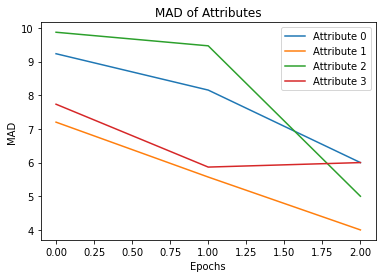

In [0]:
m1={0: [9.23330785, 7.20091235, 9.87155452, 7.73358334], 1: [8.1536098 , 5.57053259, 9.46816432, 5.86635183], 2: [6,4,5,6]}
printDayAtrib(m1)

In [0]:
# Error defined as mean difference of prediction and reallity
#this version only works with input and labels of length 2 (ex: max, min) and one day ahead
'''
def compute_error(outputs, labels):
  err = 0.0
  number_items = 0
  for j, out in enumerate(outputs, 0):
      err += abs(labels[j][0] - out[0])
      err += abs(labels[j][1] - out[1])
      number_items += 2

  return err, number_items
'''

'\ndef compute_error(outputs, labels):\n  err = 0.0\n  number_items = 0\n  for j, out in enumerate(outputs, 0):\n      err += abs(labels[j][0] - out[0])\n      err += abs(labels[j][1] - out[1])\n      number_items += 2\n\n  return err, number_items\n'

In [0]:
#this version works for lots of attributes, and multiple days ahead (improvemtn from previous copute error) but doesnt have days ahead
''''
def compute_error_old(outputs, labels):
  err = 0.0
  number_items = 0
  for j, out in enumerate(outputs, 0): #for each output array
    #print('#j',j)

    for i in range(len(out)): #for each attribute predicted *days_ahead 
      #print('i_{} labels: {} - out {}'.format(i, labels[j][i], out[i]))

     
      temp_err = abs(labels[j][i] - out[i])
      err += temp_err
     
    number_items += len(out)
      

  return err, number_items
  '''

"'\ndef compute_error_old(outputs, labels):\n  err = 0.0\n  number_items = 0\n  for j, out in enumerate(outputs, 0): #for each output array\n    #print('#j',j)\n\n    for i in range(len(out)): #for each attribute predicted *days_ahead \n      #print('i_{} labels: {} - out {}'.format(i, labels[j][i], out[i]))\n\n     \n      temp_err = abs(labels[j][i] - out[i])\n      err += temp_err\n     \n    number_items += len(out)\n      \n\n  return err, number_items\n  "

In [0]:
# # Error defined as prediction being off more than 5°C
# def compute_error(outputs, labels):
#   err = 0.0
#   number_items = 0
#   for j, out in enumerate(outputs, 0):
#       err += (abs(labels[j][0] - out[0]) > 5)
#       err += (abs(labels[j][1] - out[1]) > 5)
#       number_items += 2

#   return err, number_items